In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from numpy import tan, arctan, sqrt, cos, sin, arccos
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.style
import matplotlib as mpl
#mpl.style.use('classic')
import corner

In [2]:
def solve(f, E0, e, h):
    from numpy import cos
    lastE = E0
    nextE = lastE + 10* h  # "different than lastX so loop starts OK
    number=0
    while (abs(lastE - nextE) > h) and number < 1001:  # this is how you terminate the loop 
        newY = f(nextE,e,E0) # just for debug... see what happens
        #print "f(", nextE, ") = ", newY     # print out progress... again just debug
        lastE = nextE
        nextE = lastE - newY / (1.-e*cos(lastE))  # update estimate using N-R
        number=number+1
        if number >= 1000:
            nextE = float('NaN')
    return nextE

def eccentricity_anomaly(E,e,M):
    return E - (e*sin(E)) - M

# Import data:

In [3]:
dat_in = np.loadtxt(open('/Users/loganpearce/Dropbox/UTexas_research/OLPE_project/Orbit_fitting/GSC6214_ofti_output_2018_07_09/GSC6214_accepted',"rb"),delimiter='   ',ndmin=2)


a,T,to,e,i_deg,w_deg,O_deg,m1,dist=dat_in[:,0],dat_in[:,1],dat_in[:,2],dat_in[:,3],dat_in[:,4],dat_in[:,5],dat_in[:,6],dat_in[:,7],dat_in[:,8]
c,A,dice = dat_in[:,9],dat_in[:,10],dat_in[:,11]
i,w,O = np.radians(i_deg),np.radians(w_deg),np.radians(O_deg)
print a.shape
dates = np.array([2008.46,2009.41,2010.40,2011.42,2014.58,2016.46,2017.49])

d=np.mean(dist)
a_au=a*d
chi_min = np.where(c==np.min(c))
print chi_min
print c[chi_min]
print A[chi_min]
print d
print np.min(a_au)

(97851,)
(array([13966]),)
[8.52281067]
[1.]
108.80656782899644
123.68930291795365


In [5]:
q = np.loadtxt(open("/Users/loganpearce/Dropbox/UTexas_research/OLPE_project/Orbit_fitting/GSC6214_ofti_output_2018_07_09/GSC6214_accepted_periastron","rb"),delimiter='   ',ndmin=2)
periast=q[:,0]
print periast
periastron = periast[~np.isnan(periast)]
print np.shape(periast),np.shape(periastron)

[166.88964935 249.60416515  64.23101016 ... 347.80921934  60.32771744
 173.53558991]
(97851,) (97849,)


## This ^ is dumb!  peri = (1-e)*a

In [4]:
periastron = (1.-e)*a_au
print periastron
print np.shape(periastron),np.shape(a_au)

[166.88964935 249.60416515  64.23101016 ... 347.80921934  60.32771744
 173.53558991]
(97851,) (97851,)


In [5]:
# Periastron calc below gave some nans.  Remove those orbits from the sample.
dat = dat_in
print dat_in.shape
print dat.shape

a,T,to,e,i_deg,w_deg,O_deg,m1,dist=dat[:,0],dat[:,1],\
    dat[:,2],dat[:,3],dat[:,4],\
    dat[:,5],dat[:,6],dat[:,7],\
    dat[:,8]
c,A,dice = dat[:,9],dat[:,10],dat[:,11]
i,w,O = np.radians(i_deg),np.radians(w_deg),np.radians(O_deg)
print a.shape


(97851, 12)
(97851, 12)
(97851,)


In [6]:
#### Finding the orbit with the minimum chi^2 #####
min_chi=np.where(c==np.min(c))
print c.shape
print dat.shape
print np.min(c)
print np.where(c==np.min(c))
dat_min=dat[min_chi]
print dat_min

print dat_min
d=np.mean(dist)
a_au=a*d
print a_au[np.where(A==np.max(A))]
print c[np.where(A==np.max(A))]

(97851,)
(97851, 12)
8.52281067222
(array([13966]),)
[[1.39374314e+00 1.92612799e+03 7.42376707e+02 7.97056085e-01
  1.22235890e+02 1.45957737e+02 1.62883700e+02 9.38797483e-01
  1.08758863e+02 8.52281067e+00 1.00000000e+00 1.85081925e-01]]
[[1.39374314e+00 1.92612799e+03 7.42376707e+02 7.97056085e-01
  1.22235890e+02 1.45957737e+02 1.62883700e+02 9.38797483e-01
  1.08758863e+02 8.52281067e+00 1.00000000e+00 1.85081925e-01]]
[151.64840783]
[8.52281067]


# Histograms:

123.68930291795365
151.6484078337327
392.14904495606805 407301.04615487234 638.2014150367205
123.68930291795365


<IPython.core.display.Javascript object>


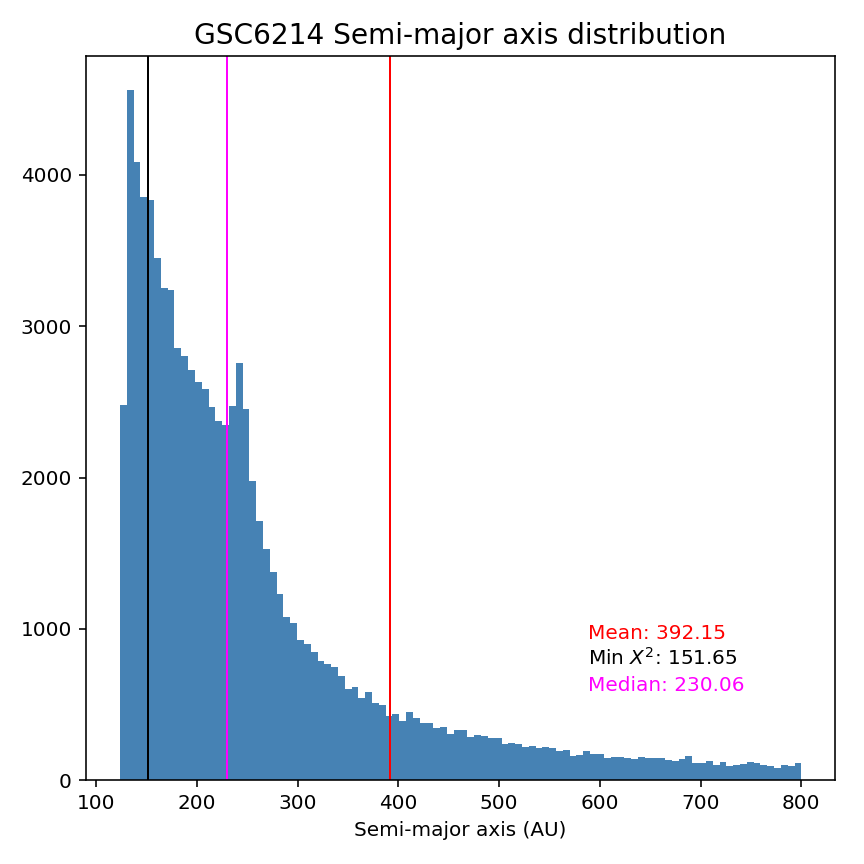

In [7]:
d=np.mean(dist)
a_au=a*d
print np.min(a_au)
a_mean = np.mean(a_au)
a_median = np.median(a_au)
a_var = np.var(a_au)
a_std=np.sqrt(a_var)
print a_au[np.where(c==np.min(c))][0]
print a_mean,a_var,a_std
print min(a_au)
from scipy.stats import norm

# Remove semi-major axis greater than some AU:
vv = np.where(a_au>800)
vv=vv[0]
a_au_cut = np.delete(a_au,vv,axis=0)

x_ax = np.linspace(0,0+2*a_mean,a.shape[0])
pdf = norm.pdf(x_ax, a_mean, a_std)

%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot(x_ax, pdf,label="my fit",color='blue')
plt.hist(a_au_cut,bins=100, color='steelblue')
plt.axvline(x=a_mean, linewidth=1,color='red')
plt.axvline(x=a_median, linewidth=1,color='magenta')
plt.axvline(x=a_au[np.where(c==np.min(c))], linewidth=1,color='black')
#plt.xlim(0,800)
#plt.ylim(175,176)
plt.title("GSC6214 Semi-major axis distribution",fontsize=14)
plt.xlabel("Semi-major axis (AU)")
#plt.annotate('The first 200 orbits accepted using each method', xy=(7.8, 0.015), xytext=(7.8, 0.015))
#plt.ylabel("Angle (degrees)")
plt.annotate('Mean: {0}'.format(np.round(a_mean,decimals=2)), xy=(.68, 0.26), xycoords='figure fraction',color="red")
plt.annotate('Min $X^2$: {0}'.format(np.round(a_au[np.where(c==np.min(c))][0],decimals=2)), xy=(.68, 0.23), \
             xycoords='figure fraction')
plt.annotate('Median: {0}'.format(np.round(a_median,decimals=2)), xy=(.68, 0.2), xycoords='figure fraction',\
             color="magenta")
#plt.legend()
plt.tight_layout()
plt.show()
#plt.savefig("GSC6214_semimajoraxis.jpg", format='jpg', dpi=300)

In [8]:
print np.min(a_au)
print np.max(a_au)
largerthan1000 = np.where(a_au>=1000)
largerthan5000 = np.where(a_au>=5000)
print (np.float(largerthan1000[0].shape[0])/np.float(a_au.shape[0]))*100.
print (np.float(largerthan5000[0].shape[0])/np.float(a_au.shape[0]))*100.

123.68930291795365
58045.26002309236
6.96364881299
0.182931191301


In [9]:
print np.max(e)
largerthanpoint95 = np.where(e>=0.95)
print largerthanpoint95[0].shape
print (np.float(largerthanpoint95[0].shape[0])/np.float(e.shape[0]))*100.
print np.mean(e)+np.std(e)*2

0.992879755005
(273,)
0.278995615783
1.1229950432973181


0.6124914154053899


<IPython.core.display.Javascript object>


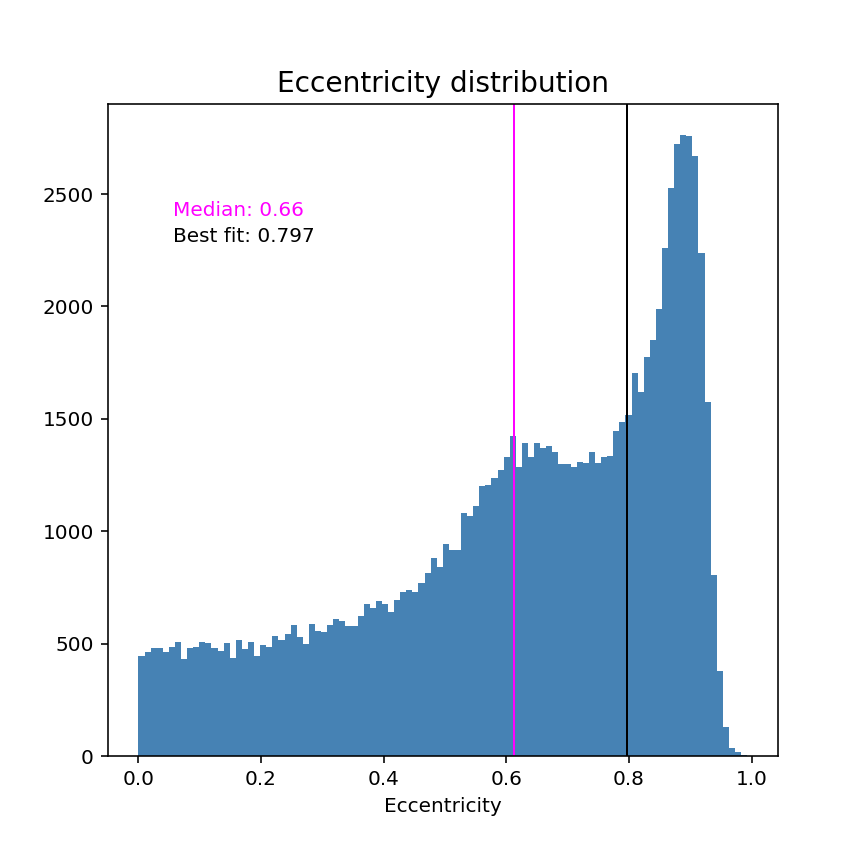

In [10]:
print np.mean(e)
%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot(x_ax, pdf,label="my fit",color='blue')
plt.hist(e,bins=100, color='steelblue')
plt.axvline(x=np.mean(e), linewidth=1,color='magenta')
#plt.axvline(x=np.median(e), linewidth=1,color='magenta')
plt.axvline(x=e[np.where(c==np.min(c))], linewidth=1,color='black')
#plt.xlim(0,2000)
#plt.ylim(175,176)
plt.title("Eccentricity distribution",fontsize=14)
plt.xlabel("Eccentricity")
#plt.annotate('The first 200 orbits accepted using each method', xy=(7.8, 0.015), xytext=(7.8, 0.015))
#plt.ylabel("Angle (degrees)")
plt.annotate('Median: {0}'.format(np.round(np.median(e),decimals=2)), xy=(.2, 0.75), xycoords='figure fraction',\
             color="magenta")
plt.annotate('Best fit: {0}'.format(np.round(e[np.where(c==np.min(c))][0],decimals=3)), xy=(.2, 0.72), \
             xycoords='figure fraction')
#plt.annotate('Median: {0}'.format(np.round(np.median(e),decimals=4)), xy=(0.5, 140), xytext=(0.5, 140),\
# color="magenta")
#plt.legend()

plt.show()
#plt.savefig("GSC6214_eccentricity.jpg", format='jpg', dpi=300)

In [11]:
print np.max(i_deg)
#print stats.mode(i_deg)
largerthan175 = np.where(i_deg>=175.)
print (np.float(largerthan175[0].shape[0])/np.float(i_deg.shape[0]))*100.
print np.std(i_deg)
print np.mean(i_deg)+np.std(i_deg)*2,np.mean(i_deg)-np.std(i_deg)*2

179.161263855
0.116503663734
15.040554274420336
145.61684627992832 85.45462918224699


<IPython.core.display.Javascript object>


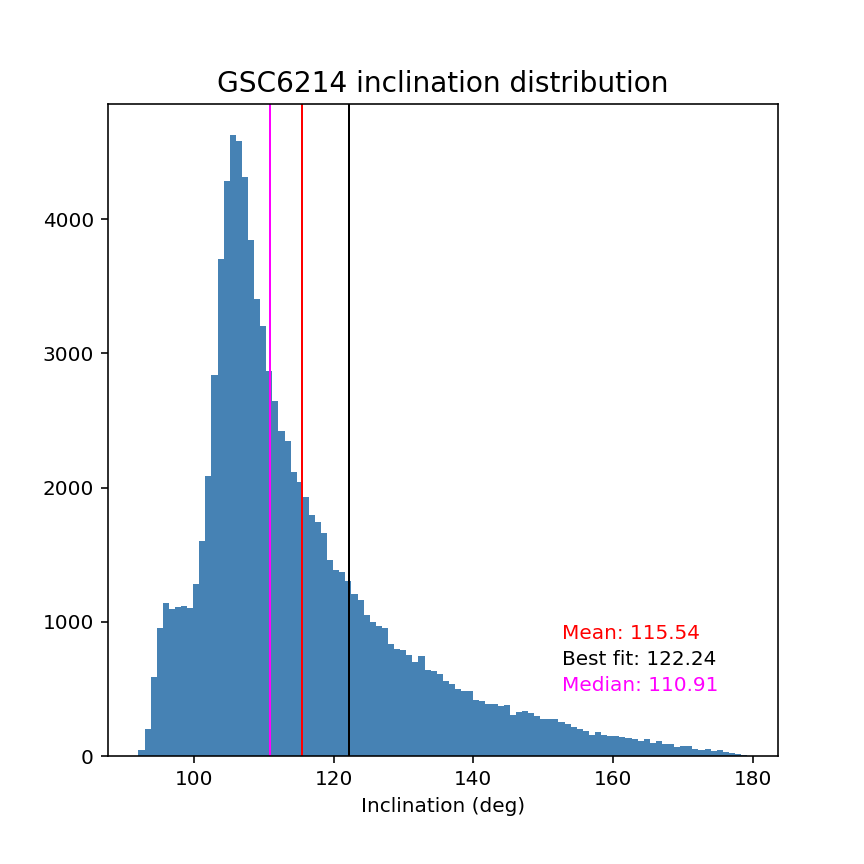

In [12]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot(x_ax, pdf,label="my fit",color='blue')
plt.hist(i_deg,bins=100,color='steelblue')
plt.axvline(x=np.mean(i_deg), linewidth=1,color='red')
plt.axvline(x=np.median(i_deg), linewidth=1,color='magenta')
plt.axvline(x=i_deg[np.where(c==np.min(c))], linewidth=1,color='black')
#plt.xlim(0,2000)
#plt.ylim(175,176)
plt.title("GSC6214 inclination distribution",fontsize=14)
plt.xlabel("Inclination (deg)")
#plt.annotate('The first 200 orbits accepted using each method', xy=(7.8, 0.015), xytext=(7.8, 0.015))
#plt.ylabel("Angle (degrees)")
plt.annotate('Mean: {0}'.format(np.round(np.mean(i_deg),decimals=2)), xy=(.65, 0.26), xycoords='figure fraction',color="red")
plt.annotate('Best fit: {0}'.format(np.round(i_deg[np.where(c==np.min(c))][0],decimals=2)), xy=(.65, 0.23), xycoords='figure fraction')
plt.annotate('Median: {0}'.format(np.round(np.median(i_deg),decimals=2)), xy=(.65, 0.2), xycoords='figure fraction',color="magenta")
#plt.legend()

plt.show()
#plt.savefig("GSC6214_inclination.jpg", format='jpg', dpi=300)

0.847220302564 0.0500640190803


<IPython.core.display.Javascript object>


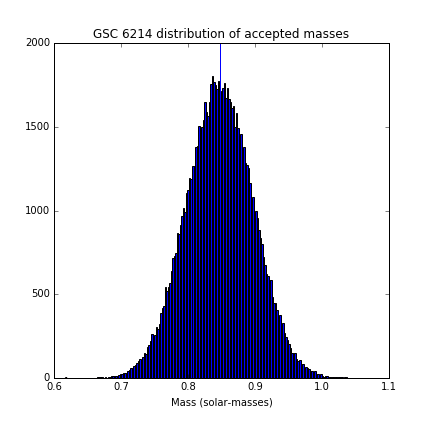

In [14]:
### Stellar Mass and distance distribution of accepted orbits:
m=m1
m_mean = np.mean(m)
m_var = np.var(m)
m_std = np.sqrt(m_var)
m_str=str(m_mean)
m_round = np.round(m_mean,decimals=3)
m_std_round = np.round(m_std,decimals=3)

print m_mean,m_std

from scipy.stats import norm
x_ax = np.linspace(0,0+2*m_mean,m.shape[0])
pdf = (norm.pdf(x_ax, m_mean, m_std))*26

%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot(x_ax, pdf,label="my fit",color='red')
plt.hist(m1,bins=200)
plt.axvline(x=m_mean, linewidth=1, color='blue')
plt.title("GSC 6214 distribution of accepted masses")
plt.xlabel("Mass (solar-masses)")
plt.annotate('Mean: {0}'.format(m_round), xy=(0.2, 100), xytext=(0.2, 100))
plt.annotate('Stdev: {0}'.format(m_std_round), xy=(0.2, 50), xytext=(0.2, 50))
#plt.ylabel("Angle (degrees)")
#plt.legend()

plt.show()


In [13]:
print m_mean,m_std
dist_mean = np.mean(dist)
dist_var = np.var(dist)
dist_std = np.sqrt(dist_var)
dist_str=str(dist_mean)
print dist_mean,dist_std
dist_round = np.round(dist_mean,decimals=3)
dist_std_round = np.round(dist_std,decimals=3)

'{0}'.format(dist_str)

from scipy.stats import norm
x_dist_ax = np.linspace(75,225,dist.shape[0])
pdf1 = norm.pdf(x_dist_ax, dist_mean, dist_std)*3500


%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot(x_dist_ax, pdf1,label="my fit",color='red')
plt.hist(dist,bins=200)
plt.axvline(x=dist_mean, linewidth=1, color='blue')
plt.title("GSC 6214 distribution of accepted distances")
plt.xlabel("Distance (pc)")
plt.annotate('Mean: {0}'.format(dist_round), xy=(80, 100), xytext=(80, 100))
plt.annotate('Stdev: {0}'.format(dist_std_round), xy=(80, 50), xytext=(80, 50))
#plt.ylabel("Angle (degrees)")
#plt.legend()

plt.show()


NameError: name 'm_mean' is not defined

In [14]:
print np.min(c)

8.52281067222


(1, 111)
(111,)
7429.057619603372
[0.62477786]
[126.52099613]


<IPython.core.display.Javascript object>


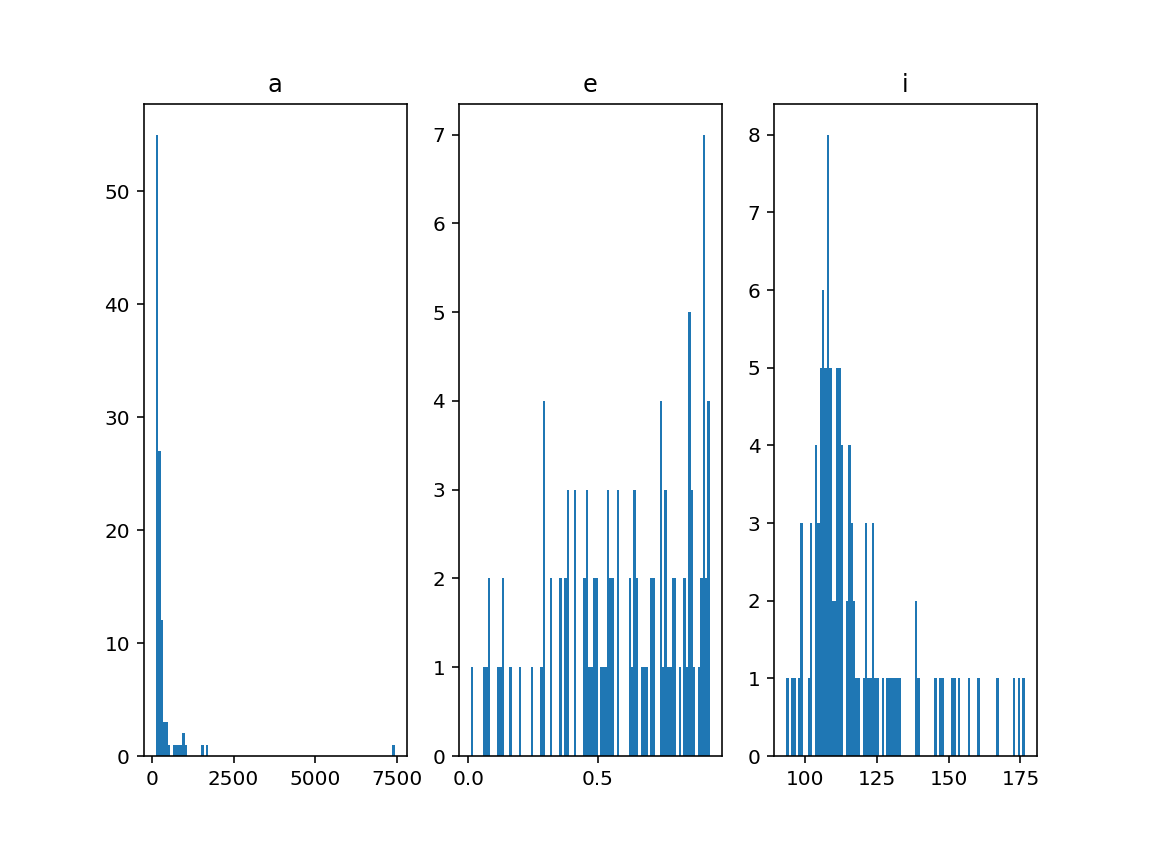

In [15]:
# what about the best fitting orbits?
print np.shape(np.where(c<=8.63))
best_a = a_au[np.where(c<=8.63)[0]]
best_e = e[np.where(c<=8.63)[0]]
best_i = i_deg[np.where(c<=8.63)[0]]
print np.shape(best_a)
print np.max(best_a)
print best_e[np.where(best_a==np.max(best_a))[0]]
print best_a[np.where(best_e==np.max(best_e))[0]]

%matplotlib notebook
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.subplot(131)
plt.hist(best_a,bins=100)
plt.title('a')
plt.subplot(132)
plt.hist(best_e,bins=100)
plt.title('e')
plt.subplot(133)
plt.hist(best_i,bins=100)
plt.title('i')
plt.show()

In [16]:
print np.where(np.isnan(periast))
periastron = periast[~np.isnan(periast)]
print np.min(periastron)
print np.where(periastron <=10.)
pp = np.where(periastron==np.nanmin(periastron))
print pp
print dat[pp]
print np.max(periastron)
lessthanten=np.where(periastron<=10.)
print lessthanten[0].shape
print 'Percentage of accepted orbits less than 10 AU:'
print (np.float(lessthanten[0].shape[0])/np.float(periastron.shape[0]))*100.
print 'chi^2 of closest periastron orbit:',c[pp]
print 'largest chi^2 of accepted orbits:',c[np.where(c==np.max(c))],'smallest chi^2 of accepted orbits:',c[np.where(c==np.min(c))]
print np.std(periastron)
print np.median(periastron)
print ''
#print np.sort(A[lessthanten[0]])
lessthanfive=np.where(periastron<=5.)
#print lessthanfive[0]
#print np.sort(A[lessthanfive[0]])
print (np.float(lessthanfive[0].shape[0])/np.float(periastron.shape[0]))*100.
print np.min(c[lessthanten[0]])
lessthanthirty=np.where(periastron<=30.)
#print lessthanfive[0]
#print np.sort(A[lessthanfive[0]])
print (np.float(lessthanthirty[0].shape[0])/np.float(periastron.shape[0]))*100.
print np.where(c[lessthanthirty[0]]<=8.2)[0].shape
print np.where(c[lessthanten[0]]<=8.3)[0].shape

(array([ 2519, 89967]),)
2.5551566006248776
(array([   66,   129,   163, ..., 97629, 97694, 97839]),)
(array([25080]),)
[[2.72721899e+00 5.78743204e+03 1.70123086e+03 1.70446901e-01
  1.05375381e+02 1.70152824e+02 3.11329091e-01 7.97947242e-01
  1.09629807e+02 9.76156876e+00 5.38278580e-01 2.33250983e-01]]
4872.374324675577
(1860,)
Percentage of accepted orbits less than 10 AU:
1.9008881031
chi^2 of closest periastron orbit: [9.76156876]
largest chi^2 of accepted orbits: [33.61245537] smallest chi^2 of accepted orbits: [8.52281067]
335.8020658919954
87.1050697501812

0.0143077599158
8.58049786843
21.4268924567
(0,)
(0,)


In [17]:
lessthanfifteen=np.where(periastron<=15.)
print (np.float(lessthanfifteen[0].shape[0])/np.float(periastron.shape[0]))*100.
c,A,dice = dat[:,9],dat[:,10],dat[:,11]
print lessthanfifteen[0].shape
print A[lessthanfifteen[0]]
probs = A[lessthanfifteen[0]]
print max(probs)
maxprobslessthanfifteen = np.where(A==max(probs))
print dat[maxprobslessthanfifteen[0]]
print a_au[maxprobslessthanfifteen[0]]
print periastron[maxprobslessthanfifteen[0]]
print ''
lessthantwenty=np.where(periastron<=20.)
print (np.float(lessthantwenty[0].shape[0])/np.float(periastron.shape[0]))*100.
print lessthantwenty[0].shape
print A[lessthantwenty[0]]
highprob = np.where(A[lessthanfifteen[0]]>=0.95)
print highprob[0].shape

7.36134247667
(7203,)
[0.45226313 0.13880726 0.73141626 ... 0.32673084 0.01112093 0.05930018]
0.971568407724
[[ 1.51083305e+00  2.23741252e+03  7.74894740e+02  4.83740830e-01
   1.11353265e+02  1.81256313e+02 -1.81225007e+02  8.69824664e-01
   1.08083186e+02  8.58049787e+00  9.71568408e-01  6.80535633e-01]]
[164.38855845]
[9.88118073]

12.4855644922
(12217,)
[0.03235432 0.22582937 0.14863407 ... 0.26880633 0.01112093 0.05930018]
(2,)


In [18]:
# 95% limits on ecc:
sort_e = np.sort(e)
print np.int_(np.shape(e)[0]*0.975)
# 95% CI on e - upper bound:
print 'Upper bound:',sort_e[np.int_(np.shape(e)[0]*0.975)]
# Lower bound:
print 'Lower bound:',sort_e[np.shape(sort_e)[0]-np.int_(np.shape(e)[0]*0.975)]
print 'Fraction larger than e=0.95',np.float(np.shape(np.where(sort_e>=0.95)[0])[0])/np.float(np.shape(sort_e)[0])

95404
Upper bound: 0.926141619447
Lower bound: 0.0522617743213
Fraction larger than e=0.95 0.00278995615783


<IPython.core.display.Javascript object>


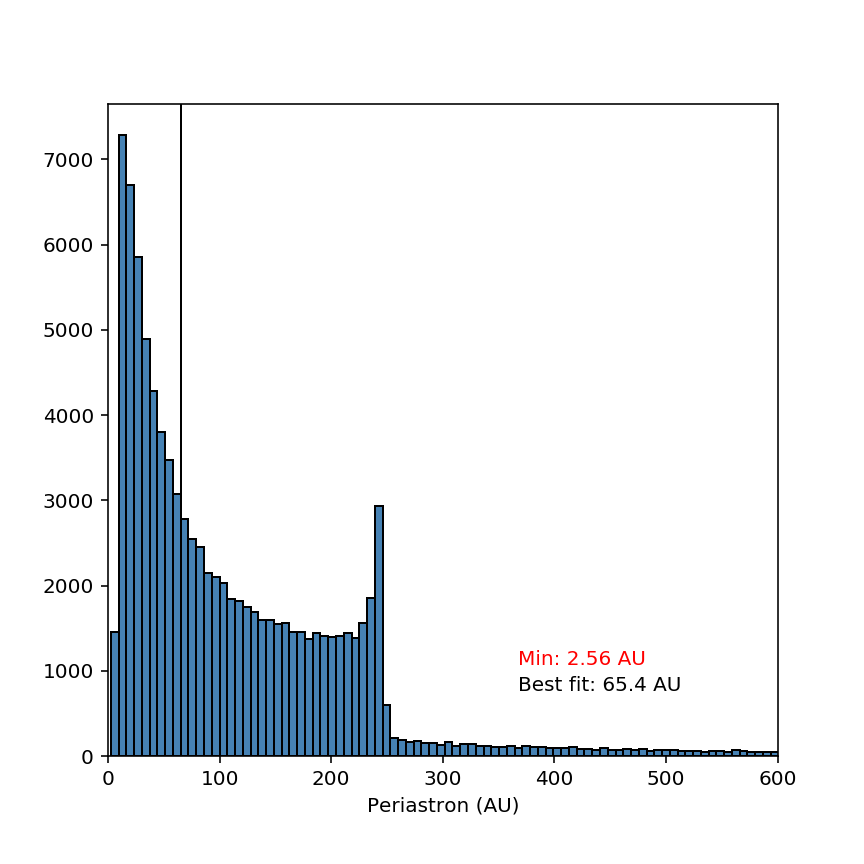

In [19]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot(x_ax, pdf,label="my fit",color='blue')
plt.hist(periastron,bins=700,edgecolor='black',color='steelblue')
#plt.axvline(x=np.min(periastron), linewidth=1,color='red')
#plt.axvline(x=np.median(periastron), linewidth=1,color='magenta')
plt.axvline(x=periastron[np.where(c==np.min(c))], linewidth=1,color='black')
plt.xlim(0,600)
#plt.ylim(175,176)
#plt.title("Periastron distribution")
plt.xlabel("Periastron (AU)")
#plt.annotate('The first 200 orbits accepted using each method', xy=(7.8, 0.015), xytext=(7.8, 0.015))
#plt.ylabel("Angle (degrees)")
plt.annotate('Min: {0} AU'.format(np.round(np.min(periastron),decimals=2)), xy=(.6, 0.23), xycoords='figure fraction',color="red")
plt.annotate('Best fit: {0} AU'.format(np.round(periastron[np.where(c==np.min(c))][0],decimals=2)), xy=(.6, 0.2), xycoords='figure fraction')
#plt.annotate('Median: {0} AU'.format(np.round(np.median(periastron),decimals=2)), xy=(380, 1300), xytext=(380, 1300),color="magenta")
#plt.legend()

plt.show()
#plt.savefig("GSC6214_periastron.jpg", format='jpg', dpi=300)

In [20]:
eeeee = np.where(e==np.max(e))
print e[eeeee[0]]
print periastron[eeeee[0]]
print a_au[eeeee[0]]


[0.99287976]
[246.3567325]
[58045.26002309]


#### Families of orbits?

<IPython.core.display.Javascript object>


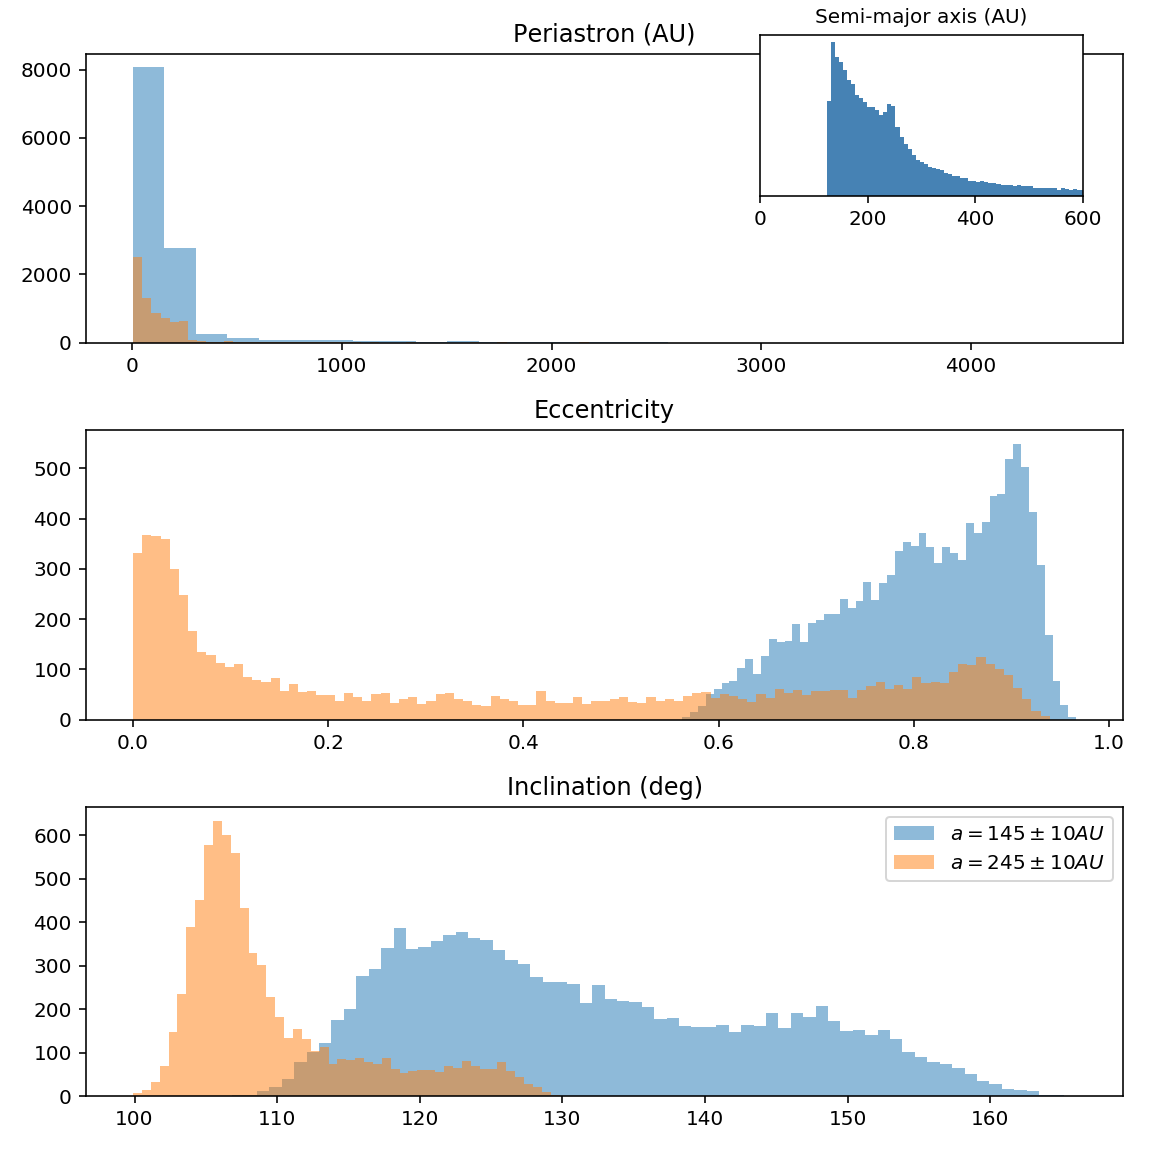

In [21]:
# There are two peaks at a=145 AU and a=245 AU.  Does that correspond to the two families seen in periastron and ecc?
aa1 = np.where((a_au>=135.)&(a_au<=155.))[0]
ee1 = e[aa1]
pp1 = periastron[aa1]
ii1 = i_deg[aa1]
aa2 = np.where((a_au>=235.)&(a_au<=255.))[0]
ee2 = e[aa2]
pp2 = periastron[aa2]
ii2 = i_deg[aa2]

%matplotlib notebook
fig = plt.figure(figsize=(8.0, 8.0))
ax1 = plt.gca()

plt.subplot(311)
plt.hist(pp1,bins=30,edgecolor='None',alpha=0.5)
plt.hist(pp2,bins=100,alpha=0.5,edgecolor='None')
plt.title('Periastron (AU)')
plt.subplot(312)
plt.hist(ee1,bins=50,alpha=0.5,edgecolor='None')
plt.hist(ee2,bins=100,alpha=0.5,edgecolor='None')
plt.title('Eccentricity')
plt.subplot(313)
plt.hist(ii1,bins=70,alpha=0.5,edgecolor='None',label='$a = 145 \pm 10 AU$')
plt.hist(ii2,bins=50,alpha=0.5,edgecolor='None',label='$a = 245 \pm 10 AU$')
plt.title('Inclination (deg)')
plt.legend()
plt.tight_layout()

ax2 = fig.add_axes([0.66,0.83,0.28,0.14])
ax2.tick_params(labelsize=10)
ax2.hist(a_au_cut,bins=90,edgecolor='None', color='steelblue')
ax2.set_xlim(0,600)
ax2.get_yaxis().set_ticks([])
ax2.set_title('Semi-major axis (AU)',fontsize=10)

plt.show()
#plt.savefig("two_families.jpg", format='jpg', dpi=300)

# Plotting orbits:

In [14]:
# The orbit which gave the minimum chi^2 value:
print dat_min

[[1.39374314e+00 1.92612799e+03 7.42376707e+02 7.97056085e-01
  1.22235890e+02 1.45957737e+02 1.62883700e+02 9.38797483e-01
  1.08758863e+02 8.52281067e+00 1.00000000e+00 1.85081925e-01]]


In [15]:
# Randomly select 100 orbits from the list of accepted orbits:
integer = range(0,a.shape[0])
rand = np.random.choice(integer,replace=False,size=100)
print rand
dat_rand = dat[rand]
print dat_rand.shape


[89435   952 22645 20680 17497 96205 58051 22120 11998   282 90888 95200
 20704 62944 62521 22718 23168 49684 26319 94664 88502 26602 16063 91301
 63752 33735 51118 55013 16288 88423 63218  9420 76515 40244 37832 82646
 81671 50948 72615 23483 24562 49155 92662 17228 85459 84746 62626   504
 80339 65784 91500 78790 15711 30757 22605 64490  1470 65865 63933 75777
 18376 55474 77059 49894 76937 11909 34896 36429 70300 40075 35263  4516
 59484 71434 12629 45360 27185 27877 23007 25651 22169  1410 23846 80667
 28876   755 31354 16423 45932  7858 49728 64090 74461 14063 61015 83643
 18646 22499 19751 72869]
(100, 12)


In [16]:
a3,T3,to3,e3,i3,w3,O3,c3,A3,dice3= dat_rand[:,0],dat_rand[:,1],dat_rand[:,2],dat_rand[:,3],\
    dat_rand[:,4],dat_rand[:,5],dat_rand[:,6],dat_rand[:,9],dat_rand[:,10],dat_rand[:,11]
i3,w3,O3=np.radians(i3),np.radians(w3),np.radians(O3)
print a3.shape,a3


(100,) [ 1.62558534  2.31458189  2.25281479  5.38924782  1.37891066  1.31188642
  1.60582896  7.47697219  3.54537771  1.3855034  11.62248092  1.59694809
  1.81641917  3.44504231  2.8354793   1.46459208  3.29671663  2.4437057
  1.1958679  10.1247997   1.25473478  3.53526001  2.68844624  1.18354042
  1.7721537   7.01215289  2.73251338  2.85937618  1.74675778  1.50621386
  1.5786824   1.96415435 12.76693438  2.91924012  1.23786223  2.19297953
  7.29072953  1.24969815  5.16029186  2.92817271  1.66299678  1.66302003
 11.56179152  6.4955489   8.04980493  1.47277134  2.8735366   1.36334232
  2.11434874  1.42109091  4.21441064  2.32789465  1.59538418  1.57478601
  6.25313157  4.21540531  1.859662    1.650273    3.20975643  1.54013968
  1.95712012  3.45285667  1.64888272  8.17416754  2.20996163  1.27300646
  1.49228454  3.80354951  1.93769466  1.62077615  8.4820168   2.28937202
  4.51468518  6.73465743  2.80286168  1.4166868   1.8064369   2.63089237
  2.27180293  1.34395418  1.32913742  2.28369

In [17]:
#sets the extent of the color plot to cover 3/4ths of the min period's period:
period_min=np.min(T)
print period_min
color_extent = period_min
vmax = np.round(color_extent,decimals = -3)
print color_extent
print vmax
print a3[96:101]


1383.64805967
1383.64805967
1000.0
[1.23515973 1.32344134 5.48727852 2.03861442]


In [18]:
# Min chi^2 orbit:
print dat_min
a2,T2,to2,e2,i2,w2,O2= dat_min[0,0],dat_min[0,1],dat_min[0,2],dat_min[0,3],dat_min[0,4],dat_min[0,5],dat_min[0,6]
i2,w2,O2=np.radians(i2),np.radians(w2),np.radians(O2)

# Min periastron orbit:
peri_min = dat[pp][0]
print peri_min
a4,T4,to4,e4,i4,w4,O4= peri_min[0],peri_min[1],peri_min[2],peri_min[3],peri_min[4],peri_min[5],peri_min[6]
i4,w4,O4=np.radians(i4),np.radians(w4),np.radians(O4)


[[1.39374314e+00 1.92612799e+03 7.42376707e+02 7.97056085e-01
  1.22235890e+02 1.45957737e+02 1.62883700e+02 9.38797483e-01
  1.08758863e+02 8.52281067e+00 1.00000000e+00 1.85081925e-01]]


NameError: name 'pp' is not defined

<IPython.core.display.Javascript object>


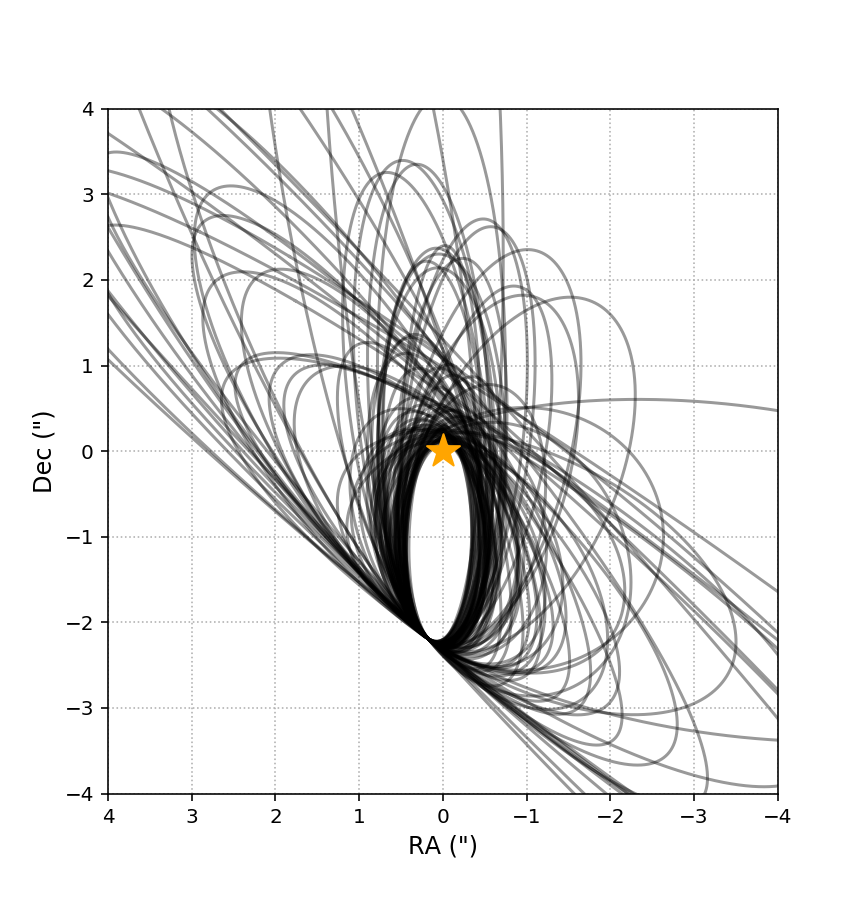

In [19]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.3)
ticksize = 10
labelsize = 12
plt.scatter(0,0,color='orange',marker='*',s=300,zorder=10)
plt.ylabel('Dec (")',fontsize=labelsize)
plt.xlabel('RA (")',fontsize=labelsize)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.gca().invert_xaxis()
plt.gca().tick_params(labelsize=ticksize)
plt.xticks([-4,-3,-2,-1,0,1,2,3,4],fontsize=ticksize)
#plt.title("GSC 6214-210 b")
majorLocator   = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)
plt.grid(ls=':')

num=0
for a1,T1,to1,e1,i1,w1,O1 in zip(a3,T3,to3,e3,i3,w3,O3):
    X = np.array([])
    Y = np.array([])
    t = np.linspace(to1,T1+to1,3000)
    n = (2.*np.pi)/T1
    M = n*(t-to1)
    E = np.array([])
  
    for M1 in M:
        nextE = solve(eccentricity_anomaly, M1, e1, 0.0001)  
        E = np.append(E, nextE)
        
    A = a1*((cos(O1)*cos(w1))-(sin(O1)*sin(w1)*cos(i1)))
    B = a1*((sin(O1)*cos(w1))+(cos(O1)*sin(w1)*cos(i1)))
    F = a1*((-cos(O1)*sin(w1))-(sin(O1)*cos(w1)*cos(i1)))
    G = a1*((-sin(O1)*sin(w1))+(cos(O1)*cos(w1)*cos(i1)))
    xe = cos(E)-e1
    ye = sqrt(1-e1**2)*sin(E)
    
    X1 = A*xe + F*ye
    X = np.append(X, X1)
    Y1 = B*xe + G*ye
    Y = np.append(Y,Y1)
    plt.plot(Y,X,color='black',alpha=0.4)
'''    
X = np.array([])
Y = np.array([])
t = np.linspace(to4,T4+to4,3000)
n = (2.*np.pi)/T4
M = n*(t-to4)
E = np.array([])
for M4 in M:
    nextE = solve(eccentricity_anomaly, M4, e4, 0.0001)  
    E = np.append(E, nextE)
        
A = a4*((cos(O4)*cos(w4))-(sin(O4)*sin(w4)*cos(i4)))
B = a4*((sin(O4)*cos(w4))+(cos(O4)*sin(w4)*cos(i4)))
F = a4*((-cos(O4)*sin(w4))-(sin(O4)*cos(w4)*cos(i4)))
G = a4*((-sin(O4)*sin(w4))+(cos(O4)*cos(w4)*cos(i4)))
xe = cos(E)-e4
ye = sqrt(1-e4**2)*sin(E)
X1 = A*xe + F*ye
X = np.append(X, X1)
Y1 = B*xe + G*ye
Y = np.append(Y,Y1)
#plt.plot(Y,X,color='blue') 

X = np.array([])
Y = np.array([])
t = np.linspace(to2,T2+to2,3000)
n = (2.*np.pi)/T2
M = n*(t-to2)
E = np.array([])
for M2 in M:
    nextE = solve(eccentricity_anomaly, M2, e2, 0.0001)  
    E = np.append(E, nextE)
        
A = a2*((cos(O2)*cos(w2))-(sin(O2)*sin(w2)*cos(i2)))
B = a2*((sin(O2)*cos(w2))+(cos(O2)*sin(w2)*cos(i2)))
F = a2*((-cos(O2)*sin(w2))-(sin(O2)*cos(w2)*cos(i2)))
G = a2*((-sin(O2)*sin(w2))+(cos(O2)*cos(w2)*cos(i2)))
xe = cos(E)-e2
ye = sqrt(1-e2**2)*sin(E)
X1 = A*xe + F*ye
X = np.append(X, X1)
Y1 = B*xe + G*ye
Y = np.append(Y,Y1)
#plt.plot(Y,X,color='red') '''
#plt.annotate('100 Randomly \nSelected Orbits',fontsize='15', xy=(.15, 0.175), xycoords='figure fraction')
plt.show()
#plt.savefig("GSC6214_acceptedorbits_black.pdf", format='pdf')

<IPython.core.display.Javascript object>


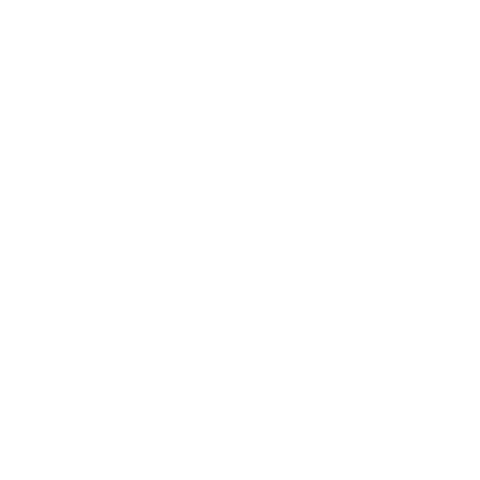

/Users/loganpearce/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


KeyboardInterrupt: 

In [25]:
#  Plotting the randomly selected orbits with color bar:
import matplotlib as mpl
############ Making colorbar ####################
cmap = mpl.cm.gist_rainbow
norm = mpl.colors.Normalize(vmin=2000, vmax=2000+vmax)

%matplotlib notebook
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
fig = plt.figure(figsize=(6.0, 6.0))
ax1 = plt.gca()
plt.scatter(0,0,color='orange',marker='*',s=200)
plt.ylabel('Dec (")')
plt.xlabel('RA (")')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.gca().invert_xaxis()
plt.title("GSC6214")
majorLocator   = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)
ax1.grid()

for a1,T1,to1,e1,i1,w1,O1 in zip(a3,T3,to3,e3,i3,w3,O3):
    ## Rainbow track:
    E = np.array([])
    times = np.linspace(dates[0],dates[0]+color_extent,5000)
    n = (2.*np.pi)/T1
    for time in times:
        M = n*(time-to1)
        nextE = solve(eccentricity_anomaly,M,e1,0.001)
        E = np.append(E, nextE)
    r2 = a1*(1.-e1*cos(E))
    f1 = sqrt(1.+e1)*sin(E/2.)
    f2 = sqrt(1.-e1)*cos(E/2.)
    f = 2.*np.arctan2(f1,f2)
    X = r2*((cos(O1)*cos(w1+f))-(sin(O1)*sin(w1+f)*cos(i1)))
    Y = r2*((sin(O1)*cos(w1+f))+(cos(O1)*sin(w1+f)*cos(i1)))
    cm = plt.get_cmap('gist_rainbow')
    no_points = len(Y)
    ax1.set_color_cycle([cm(1.*ii/(no_points-1)) 
                         for ii in range(no_points-1)])
    for ii in range(no_points-1):
        bar = ax1.plot(Y[ii:ii+2],X[ii:ii+2])
    ## Black portion of track:
    EE = np.array([])
    tt = np.linspace(dates[0]+color_extent,dates[0]+T1,5000)
    nn = (2.*np.pi)/T1
    for tts in tt:
        MM = nn*(tts-to1)
        nextE = solve(eccentricity_anomaly,MM,e1,0.001)
        EE = np.append(EE, nextE)
    rr2 = a1*(1.-e1*cos(EE))
    ff1 = sqrt(1.+e1)*sin(EE/2.)
    ff2 = sqrt(1.-e1)*cos(EE/2.)
    ff = 2.*np.arctan2(ff1,ff2)
    XX = rr2*((cos(O1)*cos(w1+ff))-(sin(O1)*sin(w1+ff)*cos(i1)))
    YY = rr2*((sin(O1)*cos(w1+ff))+(cos(O1)*sin(w1+ff)*cos(i1)))
    plt.plot(YY,XX,color='black')
    

X = np.array([])
Y = np.array([])
t = np.linspace(to4,T4+to4,3000)
n = (2.*np.pi)/T4
M = n*(t-to4)
E = np.array([])
for M4 in M:
    nextE = solve(eccentricity_anomaly, M4, e4, 0.0001)  
    E = np.append(E, nextE)
        
A = a4*((cos(O4)*cos(w4))-(sin(O4)*sin(w4)*cos(i4)))
B = a4*((sin(O4)*cos(w4))+(cos(O4)*sin(w4)*cos(i4)))
F = a4*((-cos(O4)*sin(w4))-(sin(O4)*cos(w4)*cos(i4)))
G = a4*((-sin(O4)*sin(w4))+(cos(O4)*cos(w4)*cos(i4)))
xe = cos(E)-e4
ye = sqrt(1-e4**2)*sin(E)
X1 = A*xe + F*ye
X = np.append(X, X1)
Y1 = B*xe + G*ye
Y = np.append(Y,Y1)
plt.plot(Y,X,color='blue') 

X = np.array([])
Y = np.array([])
t = np.linspace(to2,T2+to2,3000)
n = (2.*np.pi)/T2
M = n*(t-to2)
E = np.array([])
for M2 in M:
    nextE = solve(eccentricity_anomaly, M2, e2, 0.0001)  
    E = np.append(E, nextE)
        
A = a2*((cos(O2)*cos(w2))-(sin(O2)*sin(w2)*cos(i2)))
B = a2*((sin(O2)*cos(w2))+(cos(O2)*sin(w2)*cos(i2)))
F = a2*((-cos(O2)*sin(w2))-(sin(O2)*cos(w2)*cos(i2)))
G = a2*((-sin(O2)*sin(w2))+(cos(O2)*cos(w2)*cos(i2)))
xe = cos(E)-e2
ye = sqrt(1-e2**2)*sin(E)
X1 = A*xe + F*ye
X = np.append(X, X1)
Y1 = B*xe + G*ye
Y = np.append(Y,Y1)
plt.plot(Y,X,color='red') 
    
ax2 = fig.add_axes([0.2,0.17,0.03,0.2])
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
ax2.tick_params(labelsize=10)
plt.show()
#plt.savefig("GSC6214_acceptedorbits.jpg", format='jpg', dpi=300)

[0.16804122 0.16957068 0.16974952 0.17258249 0.17425527 0.17499427
 0.17730488] [-2195.4933142  -2195.54759861 -2194.84482093 -2195.75704867
 -2190.76354318 -2191.30057904 -2189.78620845]


<IPython.core.display.Javascript object>


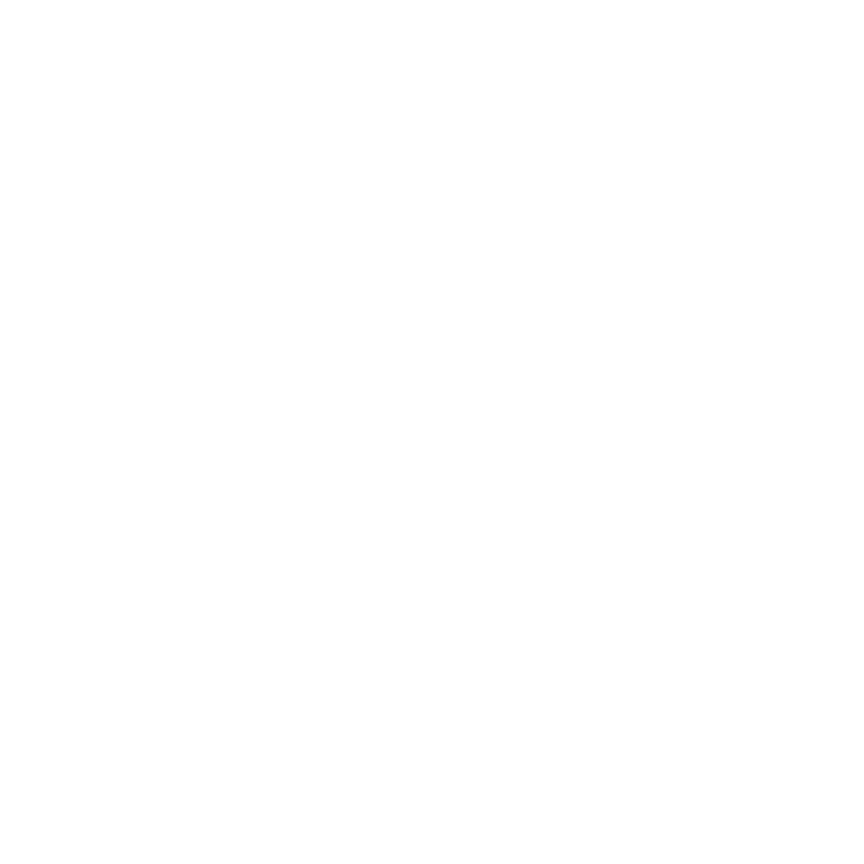

NameError: name 'to4' is not defined

In [20]:
############# Plotting the data with the orbits in RA/Dec
# Separations in mas:
r_obs =np.array([2201.9147901,2202.08616411,2201.39925705,2202.52894002,2197.68282571,2198.27687573,2196.95258458]) 
rerr = np.array([1.0853014,1.17447652,1.39876877,1.11721957,0.80050533,1.09849454,1.12455927])     

# Position angles in deg:
PA_obs = np.array([175.62316267,175.58359152,175.57754213,175.50589572,175.4522177,175.43412701,175.37091439])
terr = np.array([0.02730734,0.03016649,0.03634694,0.02608293,0.0195441,0.02608261,0.0270567])

# Obs dates:
dates = np.array([2008.46,2009.41,2010.40,2011.42,2014.58,2016.46,2017.49])

# Stellar mass in solar masses:
m_star, m_star_err = 0.6,0.1

# Stellar distance in parsecs:
d_star,d_star_err = 145.0,14.0

#Convert to RA/Dec:
PA_obs_rad = np.radians(PA_obs)
terr_rad = np.radians(terr)
dec = r_obs*np.cos(PA_obs_rad)
dec_err = r_obs*np.cos(terr_rad)
dec_err = dec_err/1000.
ra = r_obs*np.sin(PA_obs_rad)
ra=ra/1000.
ra_err = r_obs*np.sin(terr_rad)
ra_err=ra_err/1000.
print ra, dec

%matplotlib notebook
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.scatter(0,0,color='orange',marker='*',s=200)
plt.ylabel('Dec (")')
plt.xlabel('RA (")')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.gca().invert_xaxis()
#plt.title("GSC 6214-210 b")
majorLocator   = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)
plt.grid()

num=0
for a1,T1,to1,e1,i1,w1,O1 in zip(a3,T3,to3,e3,i3,w3,O3):
    X = np.array([])
    Y = np.array([])
    t = np.linspace(to1,T1+to1,3000)
    n = (2.*np.pi)/T1
    M = n*(t-to1)
    E = np.array([])
  
    for M1 in M:
        nextE = solve(eccentricity_anomaly, M1, e1, 0.0001)  
        E = np.append(E, nextE)
        
    A = a1*((cos(O1)*cos(w1))-(sin(O1)*sin(w1)*cos(i1)))
    B = a1*((sin(O1)*cos(w1))+(cos(O1)*sin(w1)*cos(i1)))
    F = a1*((-cos(O1)*sin(w1))-(sin(O1)*cos(w1)*cos(i1)))
    G = a1*((-sin(O1)*sin(w1))+(cos(O1)*cos(w1)*cos(i1)))
    xe = cos(E)-e1
    ye = sqrt(1-e1**2)*sin(E)
    
    X1 = A*xe + F*ye
    X = np.append(X, X1)
    Y1 = B*xe + G*ye
    Y = np.append(Y,Y1)
    plt.plot(Y,X,color='skyblue',alpha=0.5)
    
X = np.array([])
Y = np.array([])
t = np.linspace(to4,T4+to4,3000)
n = (2.*np.pi)/T4
M = n*(t-to4)
E = np.array([])
for M4 in M:
    nextE = solve(eccentricity_anomaly, M4, e4, 0.0001)  
    E = np.append(E, nextE)
        
A = a4*((cos(O4)*cos(w4))-(sin(O4)*sin(w4)*cos(i4)))
B = a4*((sin(O4)*cos(w4))+(cos(O4)*sin(w4)*cos(i4)))
F = a4*((-cos(O4)*sin(w4))-(sin(O4)*cos(w4)*cos(i4)))
G = a4*((-sin(O4)*sin(w4))+(cos(O4)*cos(w4)*cos(i4)))
xe = cos(E)-e4
ye = sqrt(1-e4**2)*sin(E)
X1 = A*xe + F*ye
X = np.append(X, X1)
Y1 = B*xe + G*ye
Y = np.append(Y,Y1)
plt.plot(Y,X,color='blue') 

X = np.array([])
Y = np.array([])
t = np.linspace(to2,T2+to2,3000)
n = (2.*np.pi)/T2
M = n*(t-to2)
E = np.array([])
for M2 in M:
    nextE = solve(eccentricity_anomaly, M2, e2, 0.0001)  
    E = np.append(E, nextE)
        
A = a2*((cos(O2)*cos(w2))-(sin(O2)*sin(w2)*cos(i2)))
B = a2*((sin(O2)*cos(w2))+(cos(O2)*sin(w2)*cos(i2)))
F = a2*((-cos(O2)*sin(w2))-(sin(O2)*cos(w2)*cos(i2)))
G = a2*((-sin(O2)*sin(w2))+(cos(O2)*cos(w2)*cos(i2)))
xe = cos(E)-e2
ye = sqrt(1-e2**2)*sin(E)
X1 = A*xe + F*ye
X = np.append(X, X1)
Y1 = B*xe + G*ye
Y = np.append(Y,Y1)
plt.plot(Y,X,color='red') 

plt.scatter(ra,dec,zorder=10,color='black')
#plt.errorbar(ra, dec, xerr=ra_err,yerr=dec_err, ls='none',
#            color='black',elinewidth='2',capthick='2',zorder=10)

plt.show()
plt.savefig("GSC6214_acceptedorbits_black_radec.jpg", format='jpg', dpi=300)

<IPython.core.display.Javascript object>


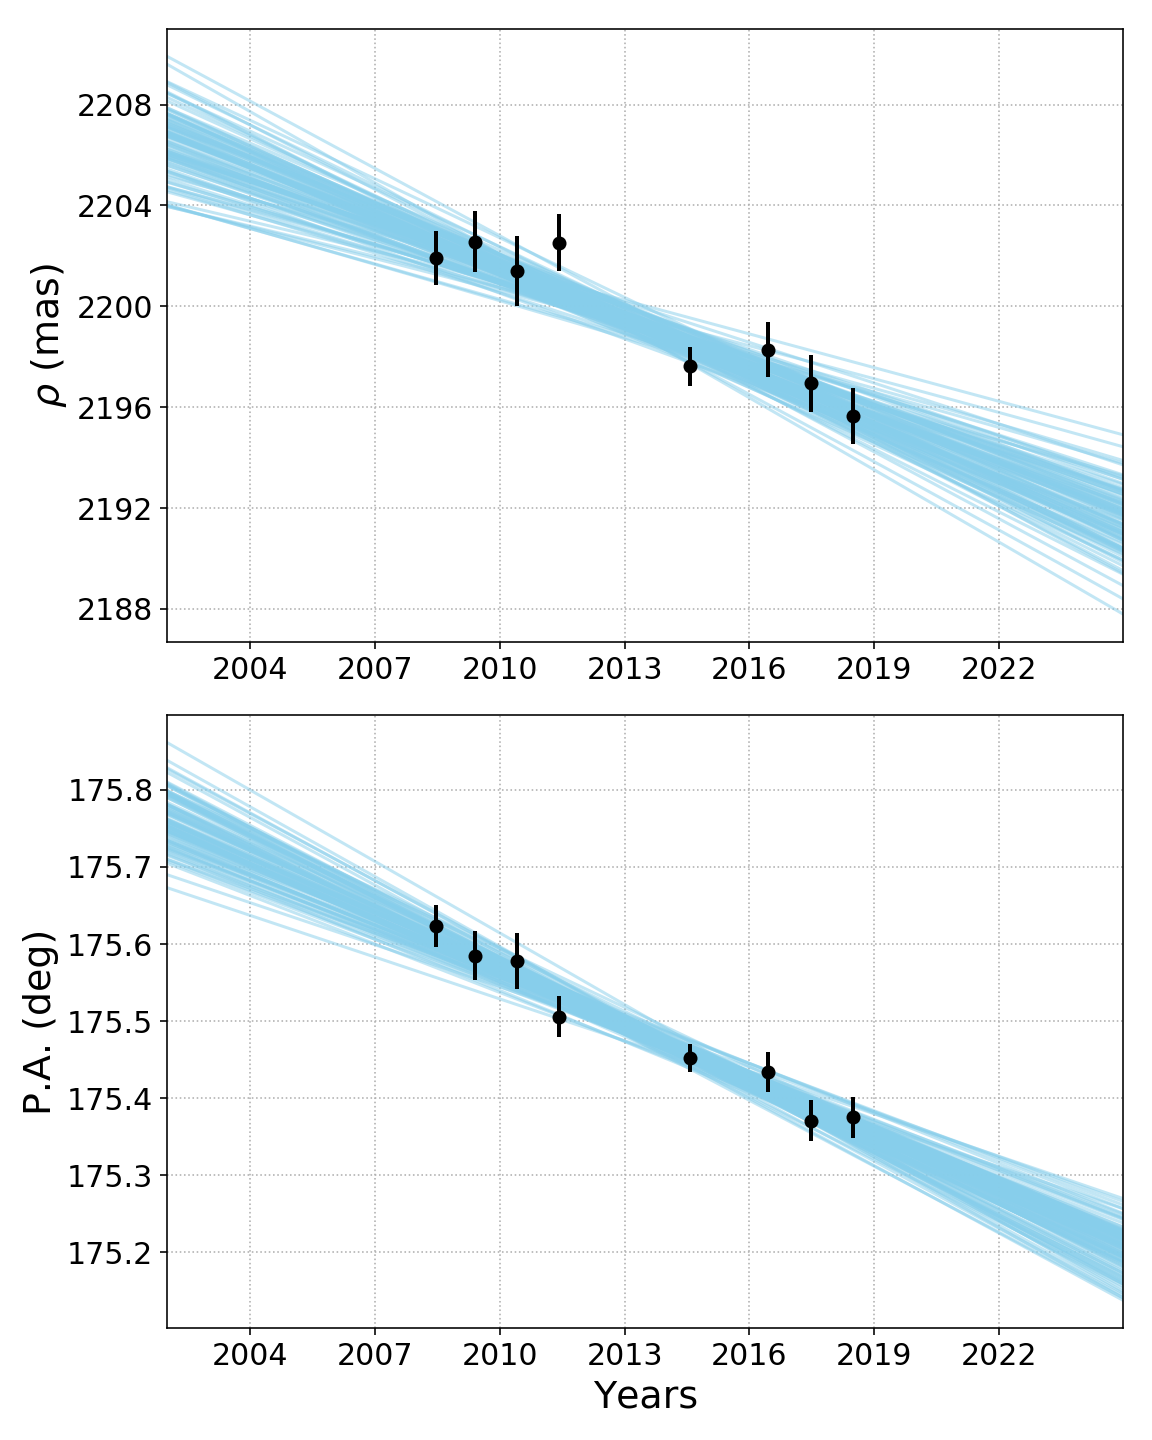

In [21]:
####### Plotting sep and PA of orbit separately ##################
# Separations in mas:
r_obs =np.array([2201.91150372,2202.56466876,2201.39925705,2202.52894002,2197.6284341,2198.27687573,\
                 2196.95258458,2195.64485754]) 
rerr = np.array([1.08541823,1.21073089,1.39876877,1.11721957,0.77317673,1.09849454,1.12455927,1.12121351])     

# Position angles in deg:
PA_obs = np.array([175.62368157,175.58511963,175.57754213,175.50589572,175.45215281,175.43412701,175.37091439,\
                   175.37510795])
terr = np.array([0.02731156,0.03116833,0.03634694,0.02608293,0.01865126,0.02608261,0.0270567,0.02702907])

# Obs dates:
dates = np.array([2008.46,2009.41,2010.40,2011.42,2014.58,2016.46,2017.49,2018.495])


# Stellar mass in solar masses:
m_star, m_star_err = 0.8,0.1

# Stellar distance in parsecs:
d_star,d_star_err = 108.8,0.5


a3,T3,to3,e3,i3,w3,O3,c3,A3,dice3= dat_rand[:,0],dat_rand[:,1],dat_rand[:,2],dat_rand[:,3],\
    dat_rand[:,4],dat_rand[:,5],dat_rand[:,6],dat_rand[:,9],dat_rand[:,10],dat_rand[:,11]
i3,w3,O3=np.radians(i3),np.radians(w3),np.radians(O3)
# Min chi^2 orbit:
a2,T2,to2,e2,i2,w2,O2= dat_min[0,0],dat_min[0,1],dat_min[0,2],dat_min[0,3],dat_min[0,4],dat_min[0,5],dat_min[0,6]
i2,w2,O2=np.radians(i2),np.radians(w2),np.radians(O2)
# Min periastron orbit:
#peri_min = dat[pp][0]
#a4,T4,to4,e4,i4,w4,O4= peri_min[0],peri_min[1],peri_min[2],peri_min[3],peri_min[4],peri_min[5],peri_min[6]
#i4,w4,O4=np.radians(i4),np.radians(w4),np.radians(O4)
# Convert to mas:
a3=a3*1000

tmin,tmax = 2002,2025
t = np.linspace(tmin,tmax,4000)
#date_str = np.array(['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
#date_ticks = np.array([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
date_ticks = np.arange(2002,tmax,3)
#anglestring = np.array(['175.1','175.2','175.3','175.4','175.5','175.6','175.7'])
#angleticks = np.array([175.1,175.2,175.3,175.4,175.5,175.6,175.7])
angleticks = np.arange(175.0,175.8,0.1)
#angleticks = np.arange(0,360,1)
#sepstring = np.array(['2196','2198','2200','2202','2204'])
#septicks = np.array([2196,2198,2200,2202,2204])
#septicks = np.arange(2188,2220,4)
septicks = np.arange(0,2212,4)
ticksize = 15
labelsize = 19

%matplotlib notebook
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
#plt.title("Separation")
plt.xticks(date_ticks,fontsize=ticksize)
plt.yticks(septicks,fontsize=ticksize)
plt.xlim(tmin,tmax)
plt.ylabel(r'$\rho$ (mas)',fontsize=labelsize)
#plt.xlabel('Years',fontsize=14)
majorLocator   = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)

#Plotting orbits
for a1,T1,to1,e1,i1,w1,O1 in zip(a3,T3,to3,e3,i3,w3,O3):
    X = np.array([])
    Y = np.array([])
    n = (2.*np.pi)/T1
    M = n*(t-to1)
    E = np.array([])
    for M1 in M:
        nextE = solve(eccentricity_anomaly, M1, e1, 0.001)  
        E = np.append(E, nextE)
    A = a1*((cos(O1)*cos(w1))-(sin(O1)*sin(w1)*cos(i1)))
    B = a1*((sin(O1)*cos(w1))+(cos(O1)*sin(w1)*cos(i1)))
    F = a1*((-cos(O1)*sin(w1))-(sin(O1)*cos(w1)*cos(i1)))
    G = a1*((-sin(O1)*sin(w1))+(cos(O1)*cos(w1)*cos(i1)))
    xe = cos(E)-e1
    ye = sqrt(1-e1**2)*sin(E)
    
    X1 = A*xe + F*ye
    X = np.append(X, X1)
    Y1 = B*xe + G*ye
    Y = np.append(Y,Y1)
    r=np.sqrt((X**2)+(Y**2))
    plt.plot(t,r,color='skyblue',alpha=0.5)
    
plt.scatter(dates,r_obs,color='black',marker='o',zorder=10)
#plt.plot(t3,r_min,color='red')
#plt.plot(t3,r_peri,color='midnightblue')
plt.errorbar(dates, r_obs, yerr=rerr, ls='none',
            color='black',elinewidth=2,capthick=2,zorder=10)
ax=plt.gca()
ax.tick_params(labelsize=ticksize)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8,prune="both"))
plt.grid(linestyle=':')

plt.subplot(2, 1, 2)
#plt.title("Position Angle")
plt.xticks(date_ticks,fontsize=ticksize)
plt.yticks(angleticks,fontsize=ticksize)
plt.xlim(tmin,tmax)
plt.ylabel(r'P.A. (deg)',fontsize=labelsize)
plt.xlabel('Years',fontsize=labelsize)
majorLocator   = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)
#Plotting orbits
for a1,T1,to1,e1,i1,w1,O1 in zip(a3,T3,to3,e3,i3,w3,O3):
    X = np.array([])
    Y = np.array([])
    n = (2.*np.pi)/T1
    M = n*(t-to1)
    E = np.array([])
    for M1 in M:
        nextE = solve(eccentricity_anomaly, M1, e1, 0.001)  
        E = np.append(E, nextE)
    A = a1*((cos(O1)*cos(w1))-(sin(O1)*sin(w1)*cos(i1)))
    B = a1*((sin(O1)*cos(w1))+(cos(O1)*sin(w1)*cos(i1)))
    F = a1*((-cos(O1)*sin(w1))-(sin(O1)*cos(w1)*cos(i1)))
    G = a1*((-sin(O1)*sin(w1))+(cos(O1)*cos(w1)*cos(i1)))
    xe = cos(E)-e1
    ye = sqrt(1.-e1**2.)*sin(E)
    X1 = A*xe + F*ye
    X = np.append(X, X1)
    Y1 = B*xe + G*ye
    Y = np.append(Y,Y1)
    theta=np.arctan2(X,-Y)
    theta=(np.degrees(theta)+270.)%360
    plt.plot(t,theta,color='skyblue',alpha=0.5)
    
#plt.plot(t3,theta_min,color='red')
#plt.plot(t3,theta_peri,color='midnightblue')
plt.scatter(dates,PA_obs,color='black',marker='o',zorder=10)
plt.errorbar(dates, PA_obs, yerr=terr, ls='none',
            color='black',elinewidth=2,capthick=2,zorder=10)
ax=plt.gca()
ax.tick_params(labelsize=ticksize)
ax.xaxis.set_major_locator(ticker.MaxNLocator(8,prune="both"))

plt.grid(linestyle=':')
plt.tight_layout()
plt.show()
#plt.savefig("GSC6214_acceptedorbits_extended.pdf", format='pdf')

## Plotting the best fitting orbits

In [36]:
sort_c = np.sort(c)
#print sort_c[0:100]
iindex = np.array([])
for i in sort_c[0:100]:
    iindex= np.append(iindex,np.where(c==i)[0])
#print np.int_(iindex)
dat_highprob = dat[np.int_(iindex)]
a6,T6,to6,e6,i6,w6,O6,c6,A6,dice6= dat_highprob[:,0],dat_highprob[:,1],dat_highprob[:,2],dat_highprob[:,3],\
    dat_highprob[:,4],dat_highprob[:,5],dat_highprob[:,6],dat_highprob[:,9],dat_highprob[:,10],dat_highprob[:,11]
i6,w6,O6=np.radians(i6),np.radians(w6),np.radians(O6)

peri_highprob = periastron[np.int_(iindex)]
print np.where(peri_highprob<15)

(array([ 6, 15, 17, 21, 32, 50, 51, 52, 55, 84, 91, 94, 96]),)


In [37]:
print peri_highprob

[   30.77612155   138.32593129   220.69265781    20.6356002     46.16691743
    54.65788216    10.58132013    28.32167754   116.27971131    81.42338576
   100.14049404    15.11401008    26.4511597     21.75837414    79.75270294
    10.80996202    20.23955279     9.87460776    57.00389227    49.70255971
    77.45416773     8.5959759    232.62496136   174.12762102    52.77844027
   556.62850514   255.73893301   140.60964736   171.30567876    19.70096542
   195.54185747    84.86710073    12.42428713    89.29728516   231.48176741
   226.72793522    23.23084392   120.33020307    34.53363203    31.79390163
    57.02931641   113.74631628    70.84441661    48.32471391    32.57188104
   236.60949237    37.13463339   239.27094541   327.34460259    88.87536783
    13.53431792     8.65295051    12.82268754   210.87231496   243.41719183
    13.3052492     41.49889626    32.39249316   102.68022478   171.79613632
    23.36397605    56.60364789  1385.28671455    92.38573108    74.54022562
    71.90313

<IPython.core.display.Javascript object>


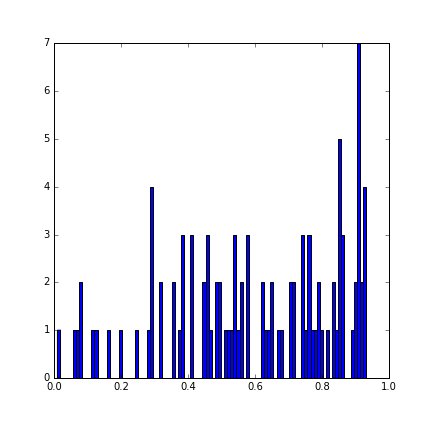

In [38]:
%matplotlib notebook
plt.hist(e6,bins=100)
plt.show()

<IPython.core.display.Javascript object>


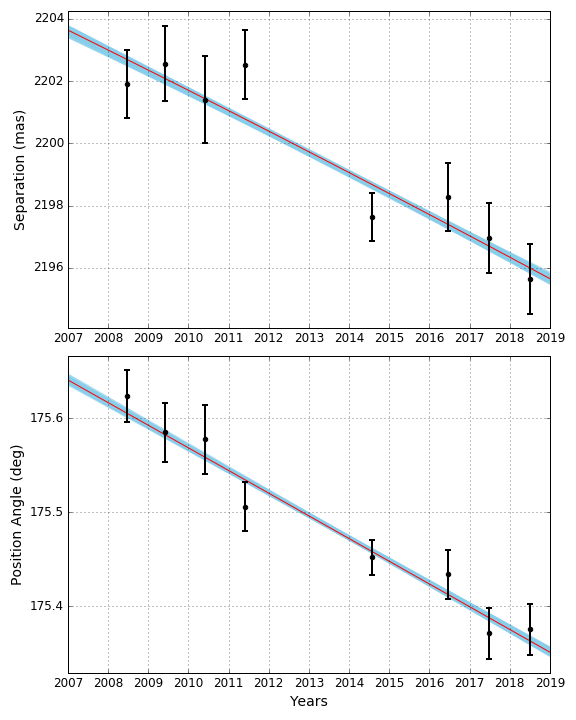

In [39]:
####### Plotting sep and PA of orbit separately ##################
# Separations in mas:
r_obs =np.array([2201.91150372,2202.56466876,2201.39925705,2202.52894002,2197.6284341,2198.27687573,2196.95258458,2195.64485754]) 
rerr = np.array([1.08541823,1.21073089,1.39876877,1.11721957,0.77317673,1.09849454,1.12455927,1.12121351])     

# Position angles in deg:
PA_obs = np.array([175.62368157,175.58511963,175.57754213,175.50589572,175.45215281,175.43412701,175.37091439,175.37510795])
terr = np.array([0.02731156,0.03116833,0.03634694,0.02608293,0.01865126,0.02608261,0.0270567,0.02702907])

# Obs dates:
dates = np.array([2008.46,2009.41,2010.40,2011.42,2014.58,2016.46,2017.49,2018.495])


# Stellar mass in solar masses:
m_star, m_star_err = 0.8,0.1

# Stellar distance in parsecs:
d_star,d_star_err = 108.8,0.5

# Min chi^2 orbit:
a2,T2,to2,e2,i2,w2,O2= dat_min[0,0],dat_min[0,1],dat_min[0,2],dat_min[0,3],dat_min[0,4],dat_min[0,5],dat_min[0,6]
i2,w2,O2=np.radians(i2),np.radians(w2),np.radians(O2)
# Min periastron orbit:
peri_min = dat[pp][0]
a4,T4,to4,e4,i4,w4,O4= peri_min[0],peri_min[1],peri_min[2],peri_min[3],peri_min[4],peri_min[5],peri_min[6]
i4,w4,O4=np.radians(i4),np.radians(w4),np.radians(O4)

# 100 best fitting orbits:
a6,T6,to6,e6,i6,w6,O6,c6,A6,dice6= dat_highprob[:,0],dat_highprob[:,1],dat_highprob[:,2],dat_highprob[:,3],\
    dat_highprob[:,4],dat_highprob[:,5],dat_highprob[:,6],dat_highprob[:,9],dat_highprob[:,10],dat_highprob[:,11]
i6,w6,O6=np.radians(i6),np.radians(w6),np.radians(O6)

# Convert to mas:
a2,a6,a4=a2*1000,a6*1000,a4*1000

date_str = np.array(['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
date_ticks = np.array([2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
anglestring = np.array(['175.1','175.2','175.3','175.4','175.5','175.6','175.7'])
angleticks = np.array([175.1,175.2,175.3,175.4,175.5,175.6,175.7])
sepstring = np.array(['2196','2198','2200','2202','2204'])
septicks = np.array([2196,2198,2200,2202,2204])

t3 = np.linspace(2007,2019,3000)


#Plotting the min chi orbit:
n2 = (2.*np.pi)/T2
M2 = n2*(t3-to2)
E2 = np.array([])
for M1 in M2:
    nextE = solve(eccentricity_anomaly, M1, e2, 0.001)  
    E2 = np.append(E2, nextE)
A2 = a2*((cos(O2)*cos(w2))-(sin(O2)*sin(w2)*cos(i2)))
B2 = a2*((sin(O2)*cos(w2))+(cos(O2)*sin(w2)*cos(i2)))
F2 = a2*((-cos(O2)*sin(w2))-(sin(O2)*cos(w2)*cos(i2)))
G2 = a2*((-sin(O2)*sin(w2))+(cos(O2)*cos(w2)*cos(i2)))
xe2 = cos(E2)-e2
ye2 = sqrt(1-e2**2)*sin(E2)   
X_min = A2*xe2 + F2*ye2
Y_min = B2*xe2 + G2*ye2
r_min=np.sqrt((X_min**2)+(Y_min**2))
theta_min=np.arctan2(X_min,-Y_min)
theta_min=(np.degrees(theta_min)+270.)%360


n4 = (2.*np.pi)/T4
M4 = n4*(t3-to4)
E4 = np.array([])
for M1 in M4:
    nextE = solve(eccentricity_anomaly, M1, e4, 0.001)  
    E4 = np.append(E4, nextE)
A4 = a4*((cos(O4)*cos(w4))-(sin(O4)*sin(w4)*cos(i4)))
B4 = a4*((sin(O4)*cos(w4))+(cos(O4)*sin(w4)*cos(i4)))
F4 = a4*((-cos(O4)*sin(w4))-(sin(O4)*cos(w4)*cos(i4)))
G4 = a4*((-sin(O4)*sin(w4))+(cos(O4)*cos(w4)*cos(i4)))
xe4 = cos(E4)-e4
ye4 = sqrt(1-e4**2)*sin(E4)   
X_peri = A4*xe4 + F4*ye4
Y_peri = B4*xe4 + G4*ye4
r_peri=np.sqrt((X_peri**2)+(Y_peri**2))
theta_peri=np.arctan2(X_peri,-Y_peri)
theta_peri=(np.degrees(theta_peri)+270.)%360

%matplotlib notebook
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
#plt.title("Separation")
plt.xticks(date_ticks, (date_str),fontsize=12)
plt.yticks(septicks, (sepstring),fontsize=12)
plt.xlim(2007,2019)
plt.ylabel('Separation (mas)',fontsize=14)
majorLocator   = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)

#Plotting orbits
for a1,T1,to1,e1,i1,w1,O1 in zip(a6,T6,to6,e6,i6,w6,O6):
    X = np.array([])
    Y = np.array([])
    t = np.linspace(2007,2019,4000)
    n = (2.*np.pi)/T1
    M = n*(t-to1)
    E = np.array([])
    for M1 in M:
        nextE = solve(eccentricity_anomaly, M1, e1, 0.001)  
        E = np.append(E, nextE)
    A = a1*((cos(O1)*cos(w1))-(sin(O1)*sin(w1)*cos(i1)))
    B = a1*((sin(O1)*cos(w1))+(cos(O1)*sin(w1)*cos(i1)))
    F = a1*((-cos(O1)*sin(w1))-(sin(O1)*cos(w1)*cos(i1)))
    G = a1*((-sin(O1)*sin(w1))+(cos(O1)*cos(w1)*cos(i1)))
    xe = cos(E)-e1
    ye = sqrt(1-e1**2)*sin(E)
    
    X1 = A*xe + F*ye
    X = np.append(X, X1)
    Y1 = B*xe + G*ye
    Y = np.append(Y,Y1)
    r=np.sqrt((X**2)+(Y**2))
    plt.plot(t,r,color='skyblue',alpha=0.5)
    
plt.scatter(dates,r_obs,color='black',marker='o',zorder=10)
plt.plot(t3,r_min,color='red')
#plt.plot(t3,r_peri,color='midnightblue')
plt.errorbar(dates, r_obs, yerr=rerr, ls='none',
            color='black',elinewidth='2',capthick='2',zorder=10)
plt.grid()

plt.subplot(2, 1, 2)
#plt.title("Position Angle")
plt.xticks(date_ticks, (date_str),fontsize=12)
plt.yticks(angleticks, (anglestring),fontsize=12)
plt.xlim(2007,2019)
plt.ylabel('Position Angle (deg)',fontsize=14)
plt.xlabel('Years',fontsize=14)
majorLocator   = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)
#Plotting orbits
for a1,T1,to1,e1,i1,w1,O1 in zip(a6,T6,to6,e6,i6,w6,O6):
    X = np.array([])
    Y = np.array([])
    t = np.linspace(2007,2019,4000)
    n = (2.*np.pi)/T1
    M = n*(t-to1)
    E = np.array([])
    for M1 in M:
        nextE = solve(eccentricity_anomaly, M1, e1, 0.001)  
        E = np.append(E, nextE)
    A = a1*((cos(O1)*cos(w1))-(sin(O1)*sin(w1)*cos(i1)))
    B = a1*((sin(O1)*cos(w1))+(cos(O1)*sin(w1)*cos(i1)))
    F = a1*((-cos(O1)*sin(w1))-(sin(O1)*cos(w1)*cos(i1)))
    G = a1*((-sin(O1)*sin(w1))+(cos(O1)*cos(w1)*cos(i1)))
    xe = cos(E)-e1
    ye = sqrt(1.-e1**2.)*sin(E)
    X1 = A*xe + F*ye
    X = np.append(X, X1)
    Y1 = B*xe + G*ye
    Y = np.append(Y,Y1)
    theta=np.arctan2(X,-Y)
    theta=(np.degrees(theta)+270.)%360
    plt.plot(t,theta,color='skyblue',alpha=0.5)
    
plt.plot(t3,theta_min,color='red')
#plt.plot(t3,theta_peri,color='midnightblue')
plt.scatter(dates,PA_obs,color='black',marker='o',zorder=10)
plt.errorbar(dates, PA_obs, yerr=terr, ls='none',
            color='black',elinewidth='2',capthick='2',zorder=10)
plt.grid()
#plt.annotate('100 Best Fitting Orbits',fontsize='15', xy=(.15, 0.15), xycoords='figure fraction')
plt.tight_layout()
plt.show()
plt.savefig("GSC6214_highprob_orbits.jpg", format='jpg', dpi=300)

<IPython.core.display.Javascript object>


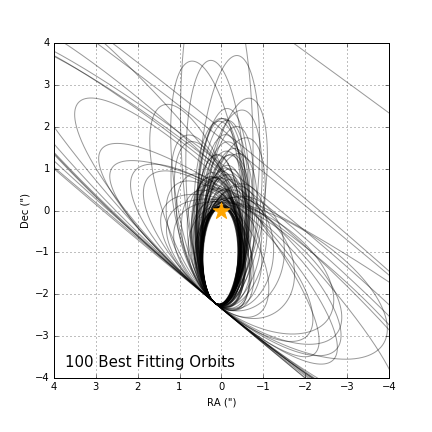

In [41]:
# 100 best fitting orbits:
a6,T6,to6,e6,i6,w6,O6,c6,A6,dice6= dat_highprob[:,0],dat_highprob[:,1],dat_highprob[:,2],dat_highprob[:,3],\
    dat_highprob[:,4],dat_highprob[:,5],dat_highprob[:,6],dat_highprob[:,9],dat_highprob[:,10],dat_highprob[:,11]
i6,w6,O6=np.radians(i6),np.radians(w6),np.radians(O6)

a4,T4,to4,e4,i4,w4,O4= peri_min[0],peri_min[1],peri_min[2],peri_min[3],peri_min[4],peri_min[5],peri_min[6]
i4,w4,O4=np.radians(i4),np.radians(w4),np.radians(O4)

# Min chi^2 orbit:
a2,T2,to2,e2,i2,w2,O2= dat_min[0,0],dat_min[0,1],dat_min[0,2],dat_min[0,3],dat_min[0,4],dat_min[0,5],dat_min[0,6]
i2,w2,O2=np.radians(i2),np.radians(w2),np.radians(O2)

%matplotlib notebook
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.scatter(0,0,color='orange',marker='*',s=300,zorder=10)
plt.ylabel('Dec (")')
plt.xlabel('RA (")')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.gca().invert_xaxis()
#plt.title("GSC 6214-210 b")
majorLocator   = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)
plt.grid()

num=0
for a1,T1,to1,e1,i1,w1,O1 in zip(a6,T6,to6,e6,i6,w6,O6):
    X = np.array([])
    Y = np.array([])
    t = np.linspace(to1,T1+to1,3000)
    n = (2.*np.pi)/T1
    M = n*(t-to1)
    E = np.array([])
  
    for M1 in M:
        nextE = solve(eccentricity_anomaly, M1, e1, 0.0001)  
        E = np.append(E, nextE)
        
    A = a1*((cos(O1)*cos(w1))-(sin(O1)*sin(w1)*cos(i1)))
    B = a1*((sin(O1)*cos(w1))+(cos(O1)*sin(w1)*cos(i1)))
    F = a1*((-cos(O1)*sin(w1))-(sin(O1)*cos(w1)*cos(i1)))
    G = a1*((-sin(O1)*sin(w1))+(cos(O1)*cos(w1)*cos(i1)))
    xe = cos(E)-e1
    ye = sqrt(1-e1**2)*sin(E)
    
    X1 = A*xe + F*ye
    X = np.append(X, X1)
    Y1 = B*xe + G*ye
    Y = np.append(Y,Y1)
    plt.plot(Y,X,color='black',alpha=0.4)
    
X = np.array([])
Y = np.array([])
t = np.linspace(to4,T4+to4,3000)
n = (2.*np.pi)/T4
M = n*(t-to4)
E = np.array([])
for M4 in M:
    nextE = solve(eccentricity_anomaly, M4, e4, 0.0001)  
    E = np.append(E, nextE)
        
A = a4*((cos(O4)*cos(w4))-(sin(O4)*sin(w4)*cos(i4)))
B = a4*((sin(O4)*cos(w4))+(cos(O4)*sin(w4)*cos(i4)))
F = a4*((-cos(O4)*sin(w4))-(sin(O4)*cos(w4)*cos(i4)))
G = a4*((-sin(O4)*sin(w4))+(cos(O4)*cos(w4)*cos(i4)))
xe = cos(E)-e4
ye = sqrt(1-e4**2)*sin(E)
X1 = A*xe + F*ye
X = np.append(X, X1)
Y1 = B*xe + G*ye
Y = np.append(Y,Y1)
#plt.plot(Y,X,color='blue') 

X = np.array([])
Y = np.array([])
t = np.linspace(to2,T2+to2,3000)
n = (2.*np.pi)/T2
M = n*(t-to2)
E = np.array([])
for M2 in M:
    nextE = solve(eccentricity_anomaly, M2, e2, 0.0001)  
    E = np.append(E, nextE)
        
A = a2*((cos(O2)*cos(w2))-(sin(O2)*sin(w2)*cos(i2)))
B = a2*((sin(O2)*cos(w2))+(cos(O2)*sin(w2)*cos(i2)))
F = a2*((-cos(O2)*sin(w2))-(sin(O2)*cos(w2)*cos(i2)))
G = a2*((-sin(O2)*sin(w2))+(cos(O2)*cos(w2)*cos(i2)))
xe = cos(E)-e2
ye = sqrt(1-e2**2)*sin(E)
X1 = A*xe + F*ye
X = np.append(X, X1)
Y1 = B*xe + G*ye
Y = np.append(Y,Y1)
#plt.plot(Y,X,color='red') 

plt.annotate('100 Best Fitting Orbits',fontsize='15', xy=(.15, 0.15), xycoords='figure fraction')

plt.show()
plt.savefig("GSC6214_highprob_black.jpg", format='jpg', dpi=300)

### Periastron less than 10 AU:

In [27]:
lessthanfifteen=np.where(periastron<=15.)
print lessthanfifteen
dat_peri = dat[lessthanfifteen]
print dat_peri.shape
a5,T5,to5,e5,i5,w5,O5= dat_peri[:,0],dat_peri[:,1],dat_peri[:,2],dat_peri[:,3],dat_peri[:,4],dat_peri[:,5],dat_peri[:,6]
i5,w5,O5=np.radians(i5),np.radians(w5),np.radians(O5)
print a5.shape

(array([    2,     7,     8, ..., 97713, 97746, 97752]),)
(7100, 12)
(7100,)


In [28]:
####### Plotting sep and PA of orbit separately ##################
# Separations in mas:
r_obs =np.array([2202.14491413,2202.0148916,2201.23614011,2200.30699661,2199.59286509,2198.56985517,2197.77428302]) 
rerr = np.array([1.00891839423,1.09844809151,1.0330286299,1.14792542847,1.12423601039,1.15006128902,0.223364010914])     

# Position angles in deg:
PA_obs = np.array([175.599999263,175.577296211,175.590600146,175.488415824,175.447627492,175.467855486,175.366369405])
terr = np.array([0.0284666169513,0.0604958866216,0.0453118468476,0.0578767176842,0.0871417828595,0.138710161426,0.0420888248308])

# Obs dates:
dates = np.array([2008.46,2009.41,2010.40,2011.42,2014.58,2016.46,2017.49])

# Stellar mass in solar masses:
m_star, m_star_err = 0.6,0.1

# Stellar distance in parsecs:
d_star,d_star_err = 145.0,14.0


r_obs = r_obs/1000.#In arcsec
rerr = rerr/1000.

date_str = np.array(['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'])
date_ticks = np.array([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])

t3 = np.linspace(2007,2018,3000)

#Plotting the min chi orbit:
a2,T2,to2,e2,i2,w2,O2= dat_min[0],dat_min[1],dat_min[2],dat_min[3],dat_min[4],dat_min[5],dat_min[6]
i2,w2,O2=np.radians(i2),np.radians(w2),np.radians(O2)
n2 = (2.*np.pi)/T2
M2 = n2*(t3-to2)
E2 = np.array([])
for M1 in M2:
    nextE = solve(eccentricity_anomaly, M1, e2, 0.001)  
    E2 = np.append(E2, nextE)
A2 = a2*((cos(O2)*cos(w2))-(sin(O2)*sin(w2)*cos(i2)))
B2 = a2*((sin(O2)*cos(w2))+(cos(O2)*sin(w2)*cos(i2)))
F2 = a2*((-cos(O2)*sin(w2))-(sin(O2)*cos(w2)*cos(i2)))
G2 = a2*((-sin(O2)*sin(w2))+(cos(O2)*cos(w2)*cos(i2)))
xe2 = cos(E2)-e2
ye2 = sqrt(1-e2**2)*sin(E2)   
X_min = A2*xe2 + F2*ye2
Y_min = B2*xe2 + G2*ye2
r_min=np.sqrt((X_min**2)+(Y_min**2))
theta_min=np.arctan2(X_min,-Y_min)
theta_min=(np.degrees(theta_min)+270.)%360

%matplotlib notebook
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.title("Separation")
plt.xticks(date_ticks, (date_str))
plt.ylabel('Separation (mas)')
majorLocator   = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)

#Plotting orbits
for a1,T1,to1,e1,i1,w1,O1 in zip(a5,T5,to5,e5,i5,w5,O5):
    X = np.array([])
    Y = np.array([])
    t = np.linspace(2007,2018,4000)
    n = (2.*np.pi)/T1
    M = n*(t-to1)
    E = np.array([])
    for M1 in M:
        nextE = solve(eccentricity_anomaly, M1, e1, 0.001)  
        E = np.append(E, nextE)
    A = a1*((cos(O1)*cos(w1))-(sin(O1)*sin(w1)*cos(i1)))
    B = a1*((sin(O1)*cos(w1))+(cos(O1)*sin(w1)*cos(i1)))
    F = a1*((-cos(O1)*sin(w1))-(sin(O1)*cos(w1)*cos(i1)))
    G = a1*((-sin(O1)*sin(w1))+(cos(O1)*cos(w1)*cos(i1)))
    xe = cos(E)-e1
    ye = sqrt(1-e1**2)*sin(E)
    
    X1 = A*xe + F*ye
    X = np.append(X, X1)
    Y1 = B*xe + G*ye
    Y = np.append(Y,Y1)
    r=np.sqrt((X**2)+(Y**2))
    plt.plot(t,r,color='skyblue')
    
plt.scatter(dates,r_obs,color='black',marker='o',zorder=10)
plt.errorbar(dates, r_obs, yerr=rerr, ls='none',
            color='black',elinewidth='2',capthick='2',zorder=10)
plt.plot(t3,r_min,color='red')
plt.grid()

plt.subplot(2, 1, 2)
plt.title("PA")
plt.xticks(date_ticks, (date_str))
plt.ylabel('PA (deg)')
majorLocator   = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)
#Plotting orbits
for a1,T1,to1,e1,i1,w1,O1 in zip(a5,T5,to5,e5,i5,w5,O5):
    X = np.array([])
    Y = np.array([])
    t = np.linspace(2007,2018,4000)
    n = (2.*np.pi)/T1
    M = n*(t-to1)
    E = np.array([])
    for M1 in M:
        nextE = solve(eccentricity_anomaly, M1, e1, 0.001)  
        E = np.append(E, nextE)
    A = a1*((cos(O1)*cos(w1))-(sin(O1)*sin(w1)*cos(i1)))
    B = a1*((sin(O1)*cos(w1))+(cos(O1)*sin(w1)*cos(i1)))
    F = a1*((-cos(O1)*sin(w1))-(sin(O1)*cos(w1)*cos(i1)))
    G = a1*((-sin(O1)*sin(w1))+(cos(O1)*cos(w1)*cos(i1)))
    xe = cos(E)-e1
    ye = sqrt(1.-e1**2.)*sin(E)
    X1 = A*xe + F*ye
    X = np.append(X, X1)
    Y1 = B*xe + G*ye
    Y = np.append(Y,Y1)
    theta=np.arctan2(X,-Y)
    theta=(np.degrees(theta)+270.)%360
    plt.plot(t,theta,color='skyblue')
plt.plot(t3,theta_min,color='red')
plt.scatter(dates,PA_obs,color='black',marker='o',zorder=10)
plt.errorbar(dates, PA_obs, yerr=terr, ls='none',
            color='black',elinewidth='2',capthick='2',zorder=10)
plt.grid()
plt.show()
#plt.savefig("GSC6214_acceptedorbits_pasep_closeperiastron.jpg", format='jpg', dpi=300)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [35]:
c,A = dat[:,9],dat[:,10]
print dat[0,:]
c2 = dat_min[0,9]
print c
probs = A[lessthanfifteen[0]]
print c[lessthanfifteen[0]]
print c2
print probs
lowchi = np.where(c<=10)
print c[lowchi]

[  1.94991580e+00   3.34307319e+03   5.79885387e+02   7.87517904e-01
   1.09378021e+02   2.39532660e+02  -1.59536980e+02   8.42371248e-01
   1.08288559e+02   1.50037782e+01   3.15476072e-02   9.24196572e-03]
[ 15.00377815  12.03163479  11.74513474 ...,  11.13391151   9.08470226
   9.24034053]
[ 11.74513474  12.52911871  14.13201678 ...,  15.91162745  13.6412722
  12.25805655]
8.09126308394
[ 0.16090586  0.10872562  0.04878283 ...,  0.02003685  0.06234919
  0.12450658]
[ 9.9358752   9.20881967  9.94112791 ...,  9.60343465  9.08470226
  9.24034053]


In [36]:

medians = np.array([np.median(a_au),np.median(T),np.median(to),np.median(e),np.median(i_deg),np.median(c)])
print medians

[  2.29240206e+02   3.77292339e+03   3.31069108e+02   6.66047473e-01
   1.11092133e+02   1.16134211e+01]


In [37]:
peri_min[0] = peri_min[0]*d

In [38]:
medians = np.array([np.median(a_au),np.median(T),np.median(to),np.median(e),np.median(i_deg),\
                    np.median(c),np.median(periastron)])
indicies = [0,1,2,3,4,9]
chimin = dat_min[0,indicies]
chimin = np.append(chimin,periastron[np.where(c==min(c))])
perimin = peri_min[indicies]
perimin = np.append(perimin,periastron[np.where(periastron==min(periastron))])

print medians.shape,chimin.shape,perimin.shape
string = np.array(['Semi-major axis (AU)','Period (yrs)','Epoch of Periastron Passage (yr)',\
                   'Eccentricity',"Inclination (deg)",'$\chi^{2}$','Periastron (AU)'])

(7,) (7,) (7,)


In [39]:
print dat_min[0]
chimin[0]=chimin[0]*d
print chimin
print perimin

[  4.39606804e+00   1.15917135e+04  -4.00710890e+03   6.21939224e-01
   1.04826873e+02   7.76214792e+01   5.01030002e+01   8.34678719e-01
   1.09700128e+02   8.09126308e+00   1.00000000e+00   1.98542406e-01]
[  4.78318168e+02   1.15917135e+04  -4.00710890e+03   6.21939224e-01
   1.04826873e+02   8.09126308e+00   1.80833338e+02]
[  1.25543060e+02   1.51370456e+03   1.14204691e+03   9.75308750e-01
   1.68094510e+02   2.15960990e+01   3.09981505e+00]


In [40]:
from tabulate import tabulate
from astropy.io import ascii
from astropy.table import Table, Column
# Latex table
# Plot orbital elements: for chi-min orbit, for closest periastron, means, std devs
# Chi-min orbit:

# Make the data table:
f = open('elements.dat', 'w')
export = Table([string, np.round(medians,decimals=2), np.round(chimin,decimals=2), \
                np.round(perimin,decimals=2)])
ascii.write(export,output=f,format='no_header')
f.close()

data = ascii.read("elements.dat", format='no_header')
Table = Table(data, names=('Element','Median', 'Best Fit', 'Minimum Periastron'))
print Table
# Write out the table in latex:
f = open('elements_table.dat', 'w')
ascii.write(Table,output=f,format='aastex')
f.close()

            Element               Median Best Fit Minimum Periastron
-------------------------------- ------- -------- ------------------
            Semi-major axis (AU)  229.24   478.32             125.54
                    Period (yrs) 3772.92 11591.71             1513.7
Epoch of Periastron Passage (yr)  331.07 -4007.11            1142.05
                    Eccentricity    0.67     0.62               0.98
               Inclination (deg)  111.09   104.83             168.09
                      $\chi^{2}$   11.61     8.09               21.6
                 Periastron (AU)   86.54   180.83                3.1


108.80590655 0.501639962138


<IPython.core.display.Javascript object>


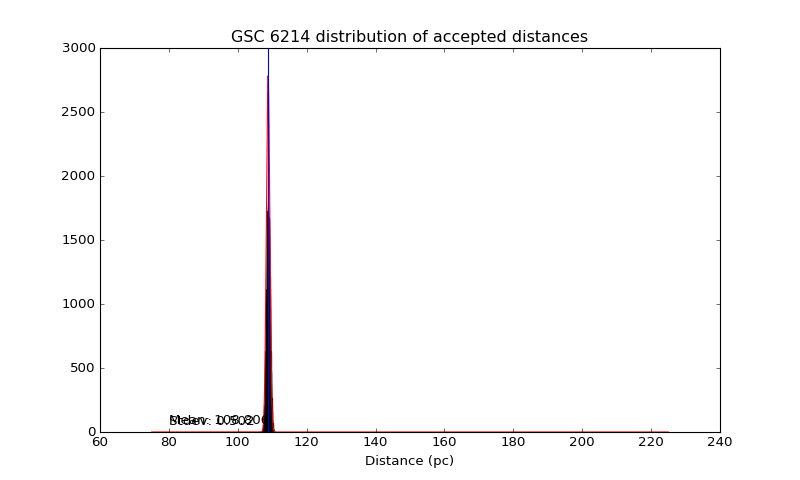

In [41]:
i_mean = np.mean(np.degrees(i))
dist_var = np.var(dist)
dist_std = np.sqrt(dist_var)
dist_str=str(dist_mean)
print dist_mean,dist_std
dist_round = np.round(dist_mean,decimals=3)
dist_std_round = np.round(dist_std,decimals=3)

'{0}'.format(dist_str)

from scipy.stats import norm
x_dist_ax = np.linspace(75,225,dist.shape[0])
pdf1 = norm.pdf(x_dist_ax, dist_mean, dist_std)*3500


%matplotlib notebook
plt.rcParams['figure.figsize'] = (10.0, 6.0)
plt.plot(x_dist_ax, pdf1,label="my fit",color='red')
plt.hist(dist,bins=200)
plt.axvline(x=dist_mean, linewidth=1, color='blue')
plt.title("GSC 6214 distribution of accepted distances")
plt.xlabel("Distance (pc)")
plt.annotate('Mean: {0}'.format(dist_round), xy=(80, 60), xytext=(80, 60))
plt.annotate('Stdev: {0}'.format(dist_std_round), xy=(80, 55), xytext=(80, 55))
#plt.ylabel("Angle (degrees)")
#plt.legend()

plt.show()

In [ ]:
#### Radial velocity distribution
d=np.mean(dist)
a_au=a*d # Convert semi-major axis to AU, using the mean distance from the distribution of results.
print a
print a_au

In [ ]:
### Radial velocities over a period:

Zdot_array = []
for a1,T1,to1,e1,i1,w1,O1 in zip(a_au,T,to,e,i,w,O)[10:20]:
    true_anom = []
    E = []
    t = np.linspace(dates[0],dates[0]+T1,5000)
    n = (2.*np.pi)/T1
    for ts in t:
        M = n*(ts-to1)
        nextE = solve(eccentricity_anomaly, M, e1, 0.001)
        E = nextE
        f1 = sqrt(1.+e1)*sin(E/2.)
        f2 = sqrt(1.-e1)*cos(E/2.)
        f = 2.*np.arctan2(f1,f2)
        true_anom.append(f)
    true_anom = np.array(true_anom)
    Zdot = ((n*a1*sin(i1))/(sqrt(1-e1**2)))*(cos(true_anom+w1)+e1*cos(w1))
    Zdot = Zdot*(1.496e8/3.154e7) #Convert from AU/yr to km/s
    Zdot_array.append(Zdot)

Zdot_array=np.array(Zdot_array)
print Zdot_array.shape
print np.max(Zdot_array[5])

In [ ]:
Zdot1=Zdot_array[0]
%matplotlib notebook
plt.title('GSC 6214-210 RV')
plt.plot(t,Zdot1)
plt.plot(t,Zdot_array[1])
plt.plot(t,Zdot_array[2])
plt.plot(t,Zdot_array[3])
plt.plot(t,Zdot_array[4])
plt.plot(t,Zdot_array[5])
plt.plot(t,Zdot_array[6])
plt.plot(t,Zdot_array[7])
plt.plot(t,Zdot_array[8])
plt.xlabel('year')
plt.ylabel('km/s')
#plt.legend()
plt.savefig('GSC_rv.jpg', format='jpg', dpi=300)

In [ ]:
true_anom = []
n = (2.*np.pi)/T
for date in dates:
    M = n*(date-to)
    nextE = [solve(eccentricity_anomaly, varM,vare, 0.001) for varM,vare in zip(M,e)]
    E = np.array(nextE)
    r1 = a*(1.-e*cos(E))
    f1 = sqrt(1.+e)*sin(E/2.)
    f2 = sqrt(1.-e)*cos(E/2.)
    f = 2.*np.arctan2(f1,f2)
    true_anom.append(f)
Zdot = ((n*a*sin(i))/(sqrt(1-e**2)))*(cos(w+true_anom)+e*cos(w))
Zdot = Zdot*(1.496e8/3.154e7) #Convert from AU/yr to km/s
print Zdot.shape
#Zdot = Zdot.transpose()
print Zdot[:,6000] # RV for the 6 observation dates of the 6000th orbit
print dat[0]
RV = Zdot[3,:]
print RV  # All the RV's for the fitted orbits on the 2011 epoch
print RV.shape

In [ ]:
%matplotlib notebook
plt.hist(RV,bins=200)
plt.show()

146.637906498


(86295,)
(86295,)


<IPython.core.display.Javascript object>


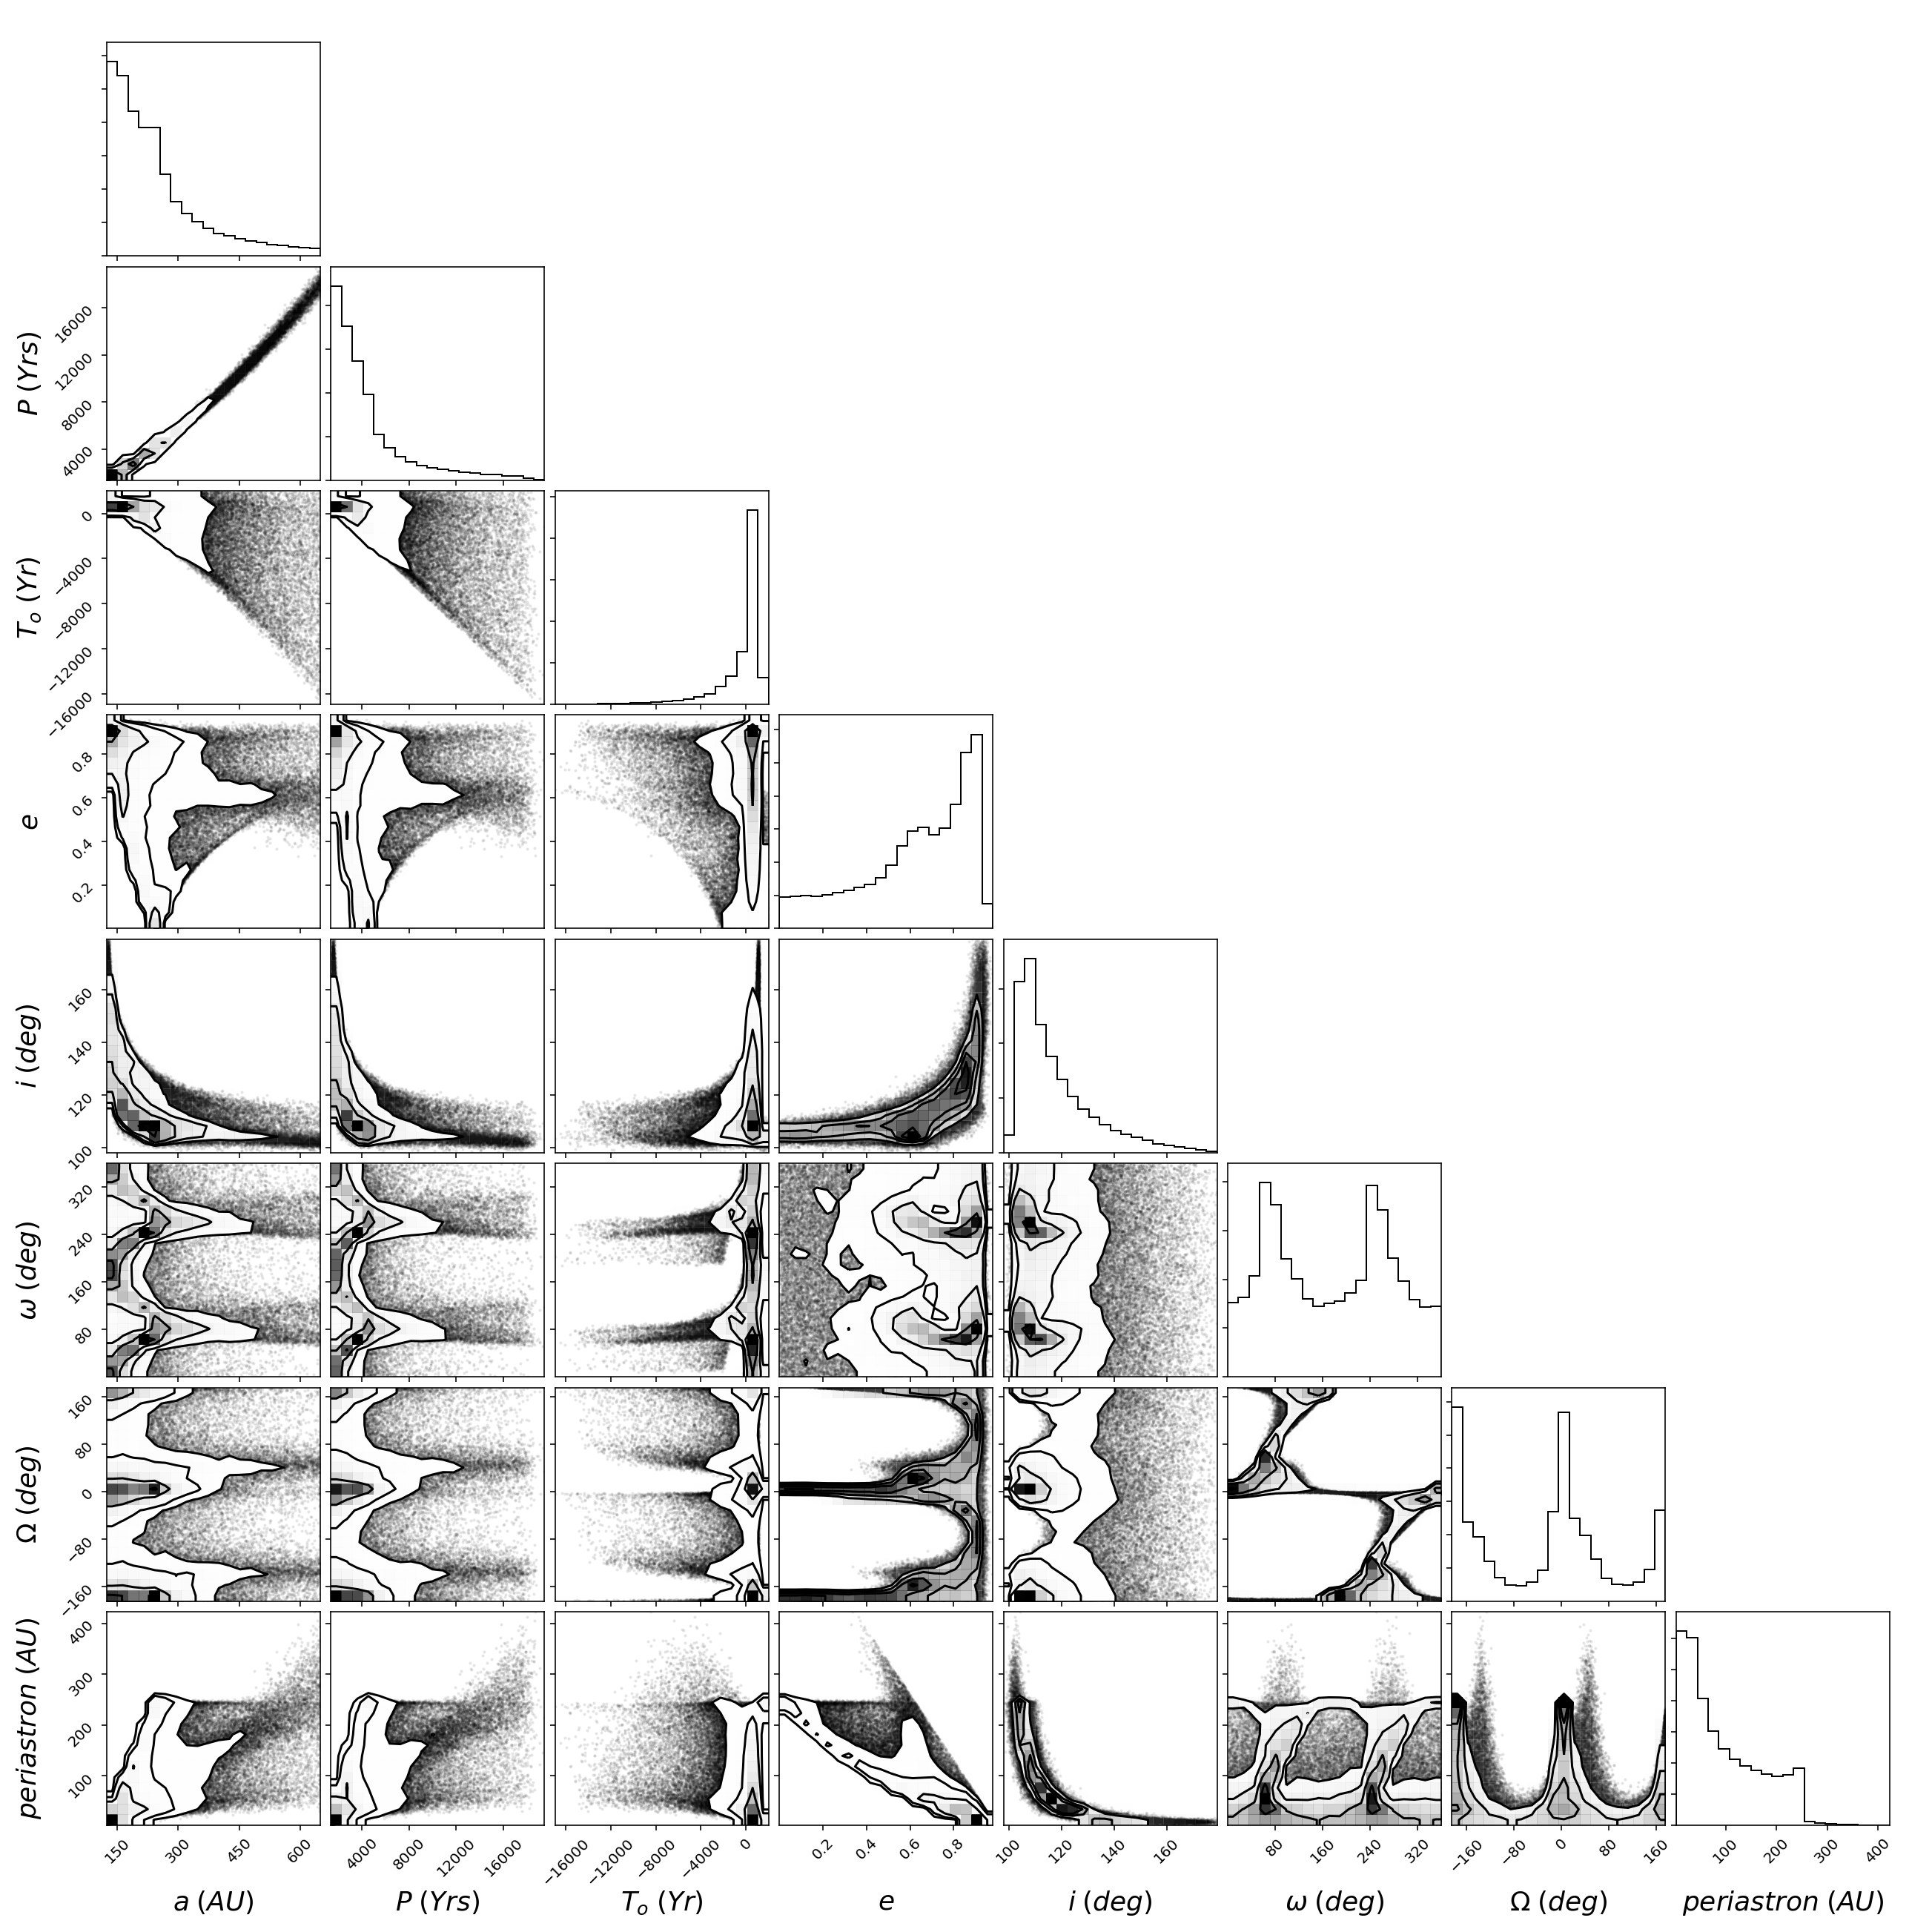

In [12]:
dat5 = dat[0:100007]
a5,T5,to5,e5,i5_deg,w5_deg,O5_deg= dat5[:,0],dat5[:,1],dat5[:,2],\
    dat5[:,3],dat5[:,4],dat5[:,5],dat5[:,6]
i5,w5,O5=np.radians(i5_deg),np.radians(w5_deg),np.radians(O5_deg)
a_au5 = a5*np.mean(dist)
# Remove semi-major axis greater than some AU:
vv = np.where(a_au5>650)
vv=vv[0]
dat5 = np.delete(dat5,vv,axis=0)
peri5 = np.delete(periastron,vv,axis=0)

# Remove to less than 100,000:
#v = np.where(dat5[:,2]<-6000)
#v = v[0]
#print dat5.shape
#print v.shape
#dat5 = np.delete(dat5,v,axis=0)
#print dat5.shape

a5,T5,to5,e5,i5_deg,w5_deg,O5_deg= dat5[:,0],dat5[:,1],dat5[:,2],\
    dat5[:,3],dat5[:,4],dat5[:,5],dat5[:,6]
i5,w5,O5=np.radians(i5_deg),np.radians(w5_deg),np.radians(O5_deg)

print a5.shape
print peri5.shape


a_au5 = a5*np.mean(dist)
# Set up the parameters of the problem.
ndim, nsamples = 8, 122
data = np.vstack([a_au5,T5,to5,e5,i5_deg,w5_deg,O5_deg,peri5])
data=data.transpose()

# Plot it.
%matplotlib notebook
plt.rcParams['figure.figsize'] = (10.0, 6.0)
figure = corner.corner(data, labels=[r"$a \; (AU)$", r"$P \; (Yrs)$", \
                                     r"$T_{o} \; (Yr)$",r"$e$",r"$i \; (deg)$", \
                                     r"$\omega \; (deg)$", r"$\Omega \; (deg)$", r"$periastron \; (AU)$"],
                       show_titles=False, plot_contours=True, label_kwargs={"fontsize": 18})
#figure.savefig("GSC_cornerplot_clipped_withperi.png", dpi=300)

### My corner plot code

In [25]:
def get_levels(c):
    Hflat = c.flatten()
    inds = np.argsort(Hflat)[::-1]
    Hflat = Hflat[inds]
    sm = np.cumsum(Hflat)
    sm /= sm[-1]
    V = np.zeros(len(levels))
    for i, v0 in enumerate(levels):
        try:
            V[i] = Hflat[sm <= v0][-1]
        except:
            V[i] = Hflat[0]
    V.sort()
    return V

In [26]:
dat5 = dat[0:100007]
a5,T5,to5,e5,i5_deg,w5_deg,O5_deg= dat5[:,0],dat5[:,1],dat5[:,2],\
    dat5[:,3],dat5[:,4],dat5[:,5],dat5[:,6]%360
i5,w5,O5=np.radians(i5_deg),np.radians(w5_deg),np.radians(O5_deg)
a_au5 = a5*np.mean(dist)
# Remove semi-major axis greater than some AU:
vv = np.where(a_au5>450)
vv=vv[0]
dat5 = np.delete(dat5,vv,axis=0)
peri5 = np.delete(periastron,vv,axis=0)

# Remove to less than 100,000:
#v = np.where(dat5[:,2]<-6000)
#v = v[0]
#print dat5.shape
#print v.shape
#dat5 = np.delete(dat5,v,axis=0)
#print dat5.shape

a5,T5,to5,e5,i5_deg,w5_deg,O5_deg= dat5[:,0],dat5[:,1],dat5[:,2],\
    dat5[:,3],dat5[:,4],dat5[:,5],dat5[:,6]%360
i5,w5,O5=np.radians(i5_deg),np.radians(w5_deg),np.radians(O5_deg)

print a5.shape
print peri5.shape


a_au5 = a5*np.mean(dist)
#O5_deg = O5_deg%180
#w5_deg = w5_deg%180
i5,w5,O5=np.radians(i5_deg),np.radians(w5_deg),np.radians(O5_deg)
a_au5 = a5*np.mean(dist)
peri5 = (1.-e5)*a_au5

(79840,)
(79840,)


In [27]:
# Adjusting Omega/omega:
ind = np.where(O5_deg>180)[0]
print O5_deg[ind],w5_deg[ind]
print w5_deg[np.where(w5_deg[ind]<180)[0]]

O5_deg[ind] = (O5_deg[ind]+180)%360
w5_deg[ind] = (w5_deg[ind]+180)%360
print O5_deg[ind],w5_deg[ind]

[193.53052955 193.71435683 325.66326604 ... 244.82849736 355.36313682
 209.82241915] [270.4836787  215.53618413 277.34335344 ... 251.59783251 296.64521269
 245.44236094]
[124.75351783 254.96762594 205.0298054  ... 224.09295695 112.9488251
 241.80170399]
[ 13.53052955  13.71435683 145.66326604 ...  64.82849736 175.36313682
  29.82241915] [ 90.4836787   35.53618413  97.34335344 ...  71.59783251 116.64521269
  65.44236094]


<IPython.core.display.Javascript object>


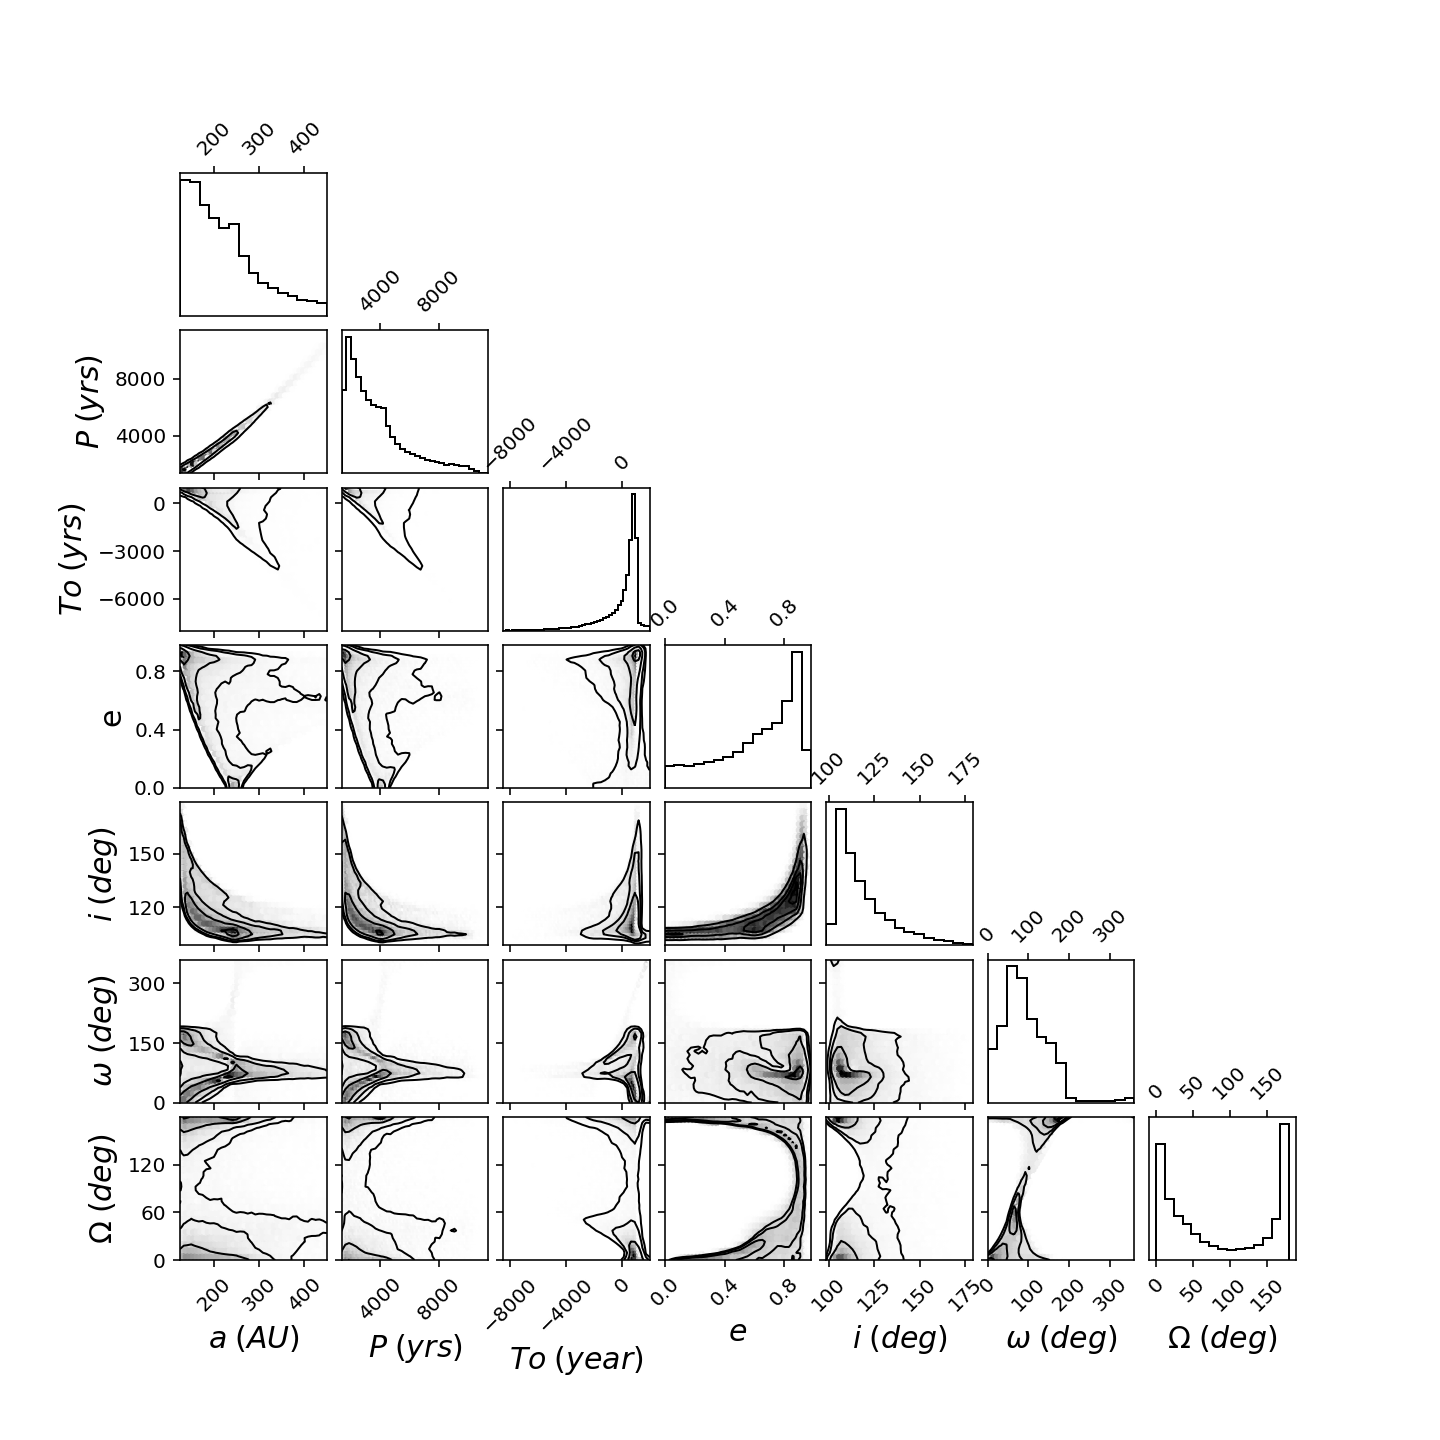

/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [10]:
from scipy.ndimage.filters import gaussian_filter
# Determine sigma levels:
levels = 1.0 - np.exp(-0.5 * np.arange(0.5, 2.1, 0.5) ** 2)
# Default color cycle:
#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
colors=['black','black','black','black']
cmap = 'binary'
tick_fs = 10
label_fs = 15
contour_lw = 1
contours = True
# Controls amount of smoothing:
sigma = 0.7

%matplotlib notebook
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

# Plot 1-d hist:
ax1 = plt.subplot2grid((7,7), (0,0))
plt.hist(a_au5,bins=15,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('a',np.round(np.mean(a_au5),decimals=2),np.round(np.std(a_au5),decimals=2), 
#                                                 np.round(np.std(a_au5),decimals=2)),fontsize='10')
########## Plot 2-d hists:
### First column:
ax2 = plt.subplot2grid((7,7), (1,0),sharex=ax1)
x,y = a_au5,T5
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax2.yaxis.set_major_locator(ticker.MaxNLocator(3,prune="upper"))
plt.ylabel(r"$P \; (yrs)$",fontsize=label_fs)
plt.tick_params(axis='x', labelleft='on',labeltop='off', labelright='off', labelbottom='off', labelsize=tick_fs)

ax3 = plt.subplot2grid((7,7), (2,0),sharex=ax1)
x,y = a_au5,to5
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax3.yaxis.set_major_locator(ticker.MaxNLocator(3,prune="upper"))
plt.ylabel(r"$To \; (yrs)$",fontsize=label_fs)
ax3.set_ylim(-8000,1000)
plt.tick_params(axis='x', labeltop='off', labelright='off', labelbottom='off',labelsize=tick_fs)

ax4 = plt.subplot2grid((7,7), (3,0),sharex=ax1)
x,y = a_au5,e5
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax4.yaxis.set_major_locator(ticker.MaxNLocator(3,prune="upper"))
plt.ylabel("e",fontsize=label_fs)
plt.tick_params(axis='x', labeltop='off', labelright='off', labelbottom='off',labelsize=tick_fs)

ax5 = plt.subplot2grid((7,7), (4,0),sharex=ax1)
x,y = a_au5,i5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax5.yaxis.set_major_locator(ticker.MaxNLocator(3,prune="upper"))
plt.ylabel(r"$i \; (deg)$",fontsize=label_fs)
plt.tick_params(axis='x', labeltop='off', labelright='off', labelbottom='off',labelsize=tick_fs)

ax6 = plt.subplot2grid((7,7), (5,0),sharex=ax1)
x,y = a_au5,w5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax6.yaxis.set_major_locator(ticker.MaxNLocator(3,prune="upper"))
plt.ylabel(r"$\omega \; (deg)$",fontsize=label_fs)
plt.tick_params(axis='x', labeltop='off', labelright='off', labelbottom='off',labelsize=tick_fs)

ax7 = plt.subplot2grid((7,7), (6,0),sharex=ax1)
x,y = a_au5,O5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
ax7.yaxis.set_major_locator(ticker.MaxNLocator(3,prune="upper"))
ax7.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xticks(rotation=45)
plt.ylabel(r"$\Omega \; (deg)$", fontsize=label_fs)
plt.xlabel(r"$a \; (AU)$",fontsize=label_fs)

#### Second column:
# 1-d hist:
ax8 = plt.subplot2grid((7,7), (1,1))
plt.hist(T5,bins=30,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('T',np.round(np.mean(T),decimals=2),np.round(np.std(T),decimals=2), 
#                                                 np.round(np.std(T),decimals=2)),fontsize='10')
# 2-d hists:
ax9 = plt.subplot2grid((7,7), (2,1),sharex=ax8,sharey=ax3)
x,y = T5,to5
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
plt.ylim(-8000,1000)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax10 = plt.subplot2grid((7,7), (3,1),sharex=ax8,sharey=ax4)
x,y = T5,e5
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax11 = plt.subplot2grid((7,7), (4,1),sharex=ax8,sharey=ax5)
x,y = T5,i5_deg
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax12 = plt.subplot2grid((7,7), (5,1),sharex=ax8,sharey=ax6)
x,y = T5,w5_deg
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax13 = plt.subplot2grid((7,7), (6,1),sharex=ax8,sharey=ax7)
x,y = T5,O5_deg
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='y',labelleft='off', labeltop='off', labelright='off')#,direction='vertical'
ax13.xaxis.set_major_locator(ticker.MaxNLocator(3,prune="upper"))
plt.xticks(rotation=45)
#plt.xlim(0,250)
plt.xlabel(r"$P \; (yrs)$",fontsize=label_fs)

##### Third column:
# 1-d hist:
ax14 = plt.subplot2grid((7,7), (2,2))
plt.hist(to5,bins=50,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('to',np.round(np.mean(to),decimals=2),np.round(np.std(to),decimals=2), 
#                                                 np.round(np.std(to),decimals=2)),fontsize='10')
# 2-d hists:
ax15 =plt.subplot2grid((7,7), (3,2),sharex=ax14,sharey=ax10)
x,y = to5,e5
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax16 =plt.subplot2grid((7,7), (4,2),sharex=ax14,sharey=ax11)
x,y = to5,i5_deg
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax17 =plt.subplot2grid((7,7), (5,2),sharex=ax14,sharey=ax12)
x,y = to5,w5_deg
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax18 =plt.subplot2grid((7,7), (6,2),sharex=ax14,sharey=ax13)
x,y = to5,O5_deg
plt.hexbin(x,y,gridsize=80,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='y',labelleft='off', labeltop='off', labelright='off')
#ax18.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
ax18.xaxis.set_major_locator(ticker.MaxNLocator(3,prune="upper"))
plt.xticks(rotation=45)
plt.ylim(-8000,1000)
plt.xlabel(r"$To \; (year)$",fontsize=label_fs)

######## Fourth column
# 1-d hist:
ax19 = plt.subplot2grid((7,7), (3,3))
plt.hist(e5,bins=15,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('e',np.round(np.mean(e),decimals=2),np.round(np.std(e),decimals=2), 
#                                                 np.round(np.std(e),decimals=2)),fontsize='10')
# 2-d hists:
ax20 = plt.subplot2grid((7,7), (4,3),sharex=ax19,sharey=ax16)
x,y = e5,i5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax21 = plt.subplot2grid((7,7), (5,3),sharex=ax19,sharey=ax17)
x,y = e5,w5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax22 = plt.subplot2grid((7,7), (6,3),sharex=ax19,sharey=ax18)
x,y = e5,O5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='y',labelleft='off', labeltop='off', labelright='off')
ax22.xaxis.set_major_locator(ticker.MaxNLocator(3,prune="upper"))
plt.xticks(rotation=45)
plt.xlabel(r"$e$",fontsize=label_fs)

########### Fifth column
# 1-d hist:
ax23 = plt.subplot2grid((7,7), (4,4))
plt.tick_params(axis='x',labelleft='off', labeltop='on', labelright='off')
plt.hist(i5_deg,bins=15,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('i',np.round(np.mean(i),decimals=2),np.round(np.std(i),decimals=2), 
#                                                 np.round(np.std(i),decimals=2)),fontsize='10')
# 2-d hists:
ax24 = plt.subplot2grid((7,7), (5,4),sharex=ax23,sharey=ax21)
x,y = i5_deg,w5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='both',labelleft='off', labeltop='off', labelright='off', labelbottom='off')

ax25 = plt.subplot2grid((7,7), (6,4),sharex=ax23,sharey=ax22)
x,y = i5_deg,O5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='y',labelleft='off', labeltop='off', labelright='off')
ax25.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xticks(rotation=45)
plt.xlabel(r"$i \; (deg)$",fontsize=label_fs)

########## 6th column
ax26 = plt.subplot2grid((7,7), (5,5))
plt.hist(w5_deg,bins=15,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='off', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='off', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('w',np.round(np.mean(w),decimals=2),np.round(np.std(w),decimals=2), 
#                                                 np.round(np.std(w),decimals=2)),fontsize='10')
# 2-d hists:
ax27 = plt.subplot2grid((7,7), (6,5),sharex=ax26,sharey=ax25)
x,y = w5_deg,O5_deg
plt.hexbin(x,y,gridsize=40,cmap=cmap,mincnt=1)
if contours==True:
    counts,xbins,ybins = np.histogram2d(x,y, bins=40, range=None, normed=False, weights=None)
    levs = get_levels(counts)
    plt.contour(gaussian_filter(counts.transpose(), sigma),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
        linewidths=contour_lw, colors=colors, levels = levs, antialiased=True, extend='both')
plt.tick_params(axis='y',labelleft='off', labeltop='off', labelright='off')
ax27.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xticks(rotation=45)
plt.xlabel(r"$\omega \; (deg)$",fontsize=label_fs)

############# 7th column
ax28 = plt.subplot2grid((7,7), (6,6))
plt.hist(O5_deg,bins=15,facecolor="None",edgecolor='black',histtype='step')
plt.tick_params(axis='both', left='off', top='on', right='off', bottom='on', \
                labelleft='off', labeltop='on', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('O',np.round(np.mean(O),decimals=2),np.round(np.std(O),decimals=2), 
#                                                 np.round(np.std(O),decimals=2)),fontsize='10')
ax28.xaxis.set_major_locator(ticker.MaxNLocator(4,prune="upper"))
plt.xticks(rotation=45)
plt.xlabel(r"$\Omega \; (deg)$",fontsize=label_fs)

plt.show()
plt.savefig("GSC6214_mycorner.png", format='png', dpi=300)

In [ ]:
# Determine sigma levels:
levels = 1.0 - np.exp(-0.5 * np.arange(0.5, 2.1, 0.5) ** 2)
# Default color cycle:
#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
colors=['black','black','black','black']
cmap = 'cubehelix_r'
cmap = 'binary'
tick_fs = 20
label_fs = 25
contour_lw = 1
contours = True
# Controls amount of smoothing:
sigma = 0.7
# Bin size fo 1d hists:
binsx=50
binsy=50
# Bin size for 2d hist:
binsxy = 40

output_name = "GSC6214_params_hists.pdf"


%matplotlib notebook
plt.figure(figsize=(30.1, 5.5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0025, hspace=0.0025)

# Upper 1-d hist:
ax1 = plt.subplot2grid((1,7), (0,0))
plt.hist(a_au,bins=binsx*200,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlim(100,450)
plt.xlabel(r"$a \; (AU)$",fontsize=label_fs)
plt.xticks([200,300,400])
#plt.title(r"${{{0}}}={{{1}}}_{{-{2}}}^{{+{3}}}$".format('a',np.round(np.mean(a_au5),decimals=2),np.round(np.std(a_au5),decimals=2), 
#           

ax2 = plt.subplot2grid((1,7), (0,1))
plt.hist(e5,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$e$",fontsize=label_fs)

ax3 = plt.subplot2grid((1,7), (0,2))
plt.hist(i5_deg,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$ i \; (deg)$",fontsize=label_fs)

ax4 = plt.subplot2grid((1,7), (0,3))
plt.hist(w5_deg,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$ \omega \; (deg)$",fontsize=label_fs)

ax4 = plt.subplot2grid((1,7), (0,4))
plt.hist(O5_deg,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$\Omega \; (deg)$",fontsize=label_fs)

ax4 = plt.subplot2grid((1,7), (0,5))
plt.hist(to5,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$T0 \; (yr)$",fontsize=label_fs)

ax4 = plt.subplot2grid((1,7), (0,6))
plt.hist(peri5,bins=binsx,edgecolor='none',alpha=0.8)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on', labelsize = tick_fs)
plt.xticks(rotation=45)
plt.xlabel(r"$a\,(1-e) \; (AU)$",fontsize=label_fs)
        
plt.tight_layout()

plt.show()
plt.savefig(output_name, format='pdf')

### Confidence intervals on parameters:

In [12]:
def ci(array,interval):
    """
    Returns a confidence interval for any distribution, regardless of shape.
    Args:
        distribution array (1d float array): array of samples comprising a pdf
        interval (float): decimal representing desired CI. example: 0.95 = 95% CI
    Return:
        median value of distribution, upper and lower ci bounds, and plus/minus values
        and mode computed as the middle of the largest histogram bin.
    Written by: Logan Pearce, 2018
    """
    import numpy as np
    sorts = np.sort(array)
    nsamples = sorts.shape[0]
    # Median
    m = np.int_(0.5*nsamples)
    median = sorts[m]
    # Mode
    n, bins = np.histogram(array, 10000, normed=True)
    max_bin = np.max(n)
    bin_inner_edge = np.where(n==max_bin)[0]
    bin_outer_edge = np.where(n==max_bin)[0]+1
    # value in the middle of the highest bin:
    mode=(bins[bin_outer_edge] - bins[bin_inner_edge])/2 + bins[bin_inner_edge]

    # Lower 
    bounds = (1-interval)/2.
    b = np.int_(bounds*nsamples)
    bottom = sorts[b]
    # Upper 
    t = np.int_((1-bounds)*nsamples)
    top = sorts[t]

    minus = median - bottom
    plus = top-median
    return median,bottom,top,minus,plus,mode[0]

In [13]:
a_ci = ci(a_au,.68)
print a_ci

(230.0550298443063, 151.92804694875764, 503.1346844983962, 78.12698289554865, 273.07965465408995, 132.37753852597982)


(230.0550298443063, 151.92804694875764, 503.1346844983962, 78.12698289554865, 273.07965465408995, 132.37753852597982) (230.0550298443063, 130.40078423800503, 1888.714675131785, 99.65424560630126, 1658.6596452874787, 132.37753852597982)


<IPython.core.display.Javascript object>


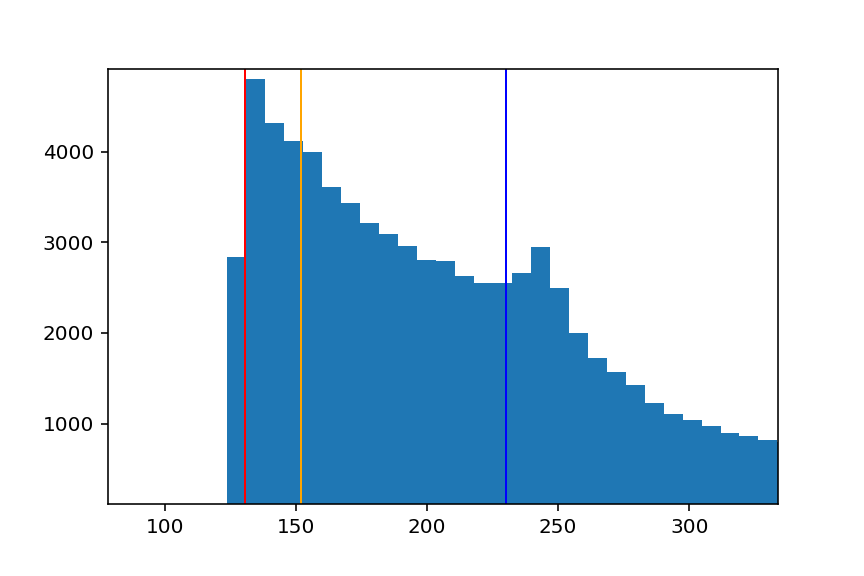

In [14]:
a_ci = ci(a_au,.68)
a_ci_95 = ci(a_au,.95)
print a_ci,a_ci_95

%matplotlib notebook
plt.hist(a_au,bins=8000)
plt.xlim(0,1500)
plt.axvline(x=a_ci[0], linewidth=1, color='blue')
plt.axvline(x=a_ci[1], linewidth=1, color='orange')
plt.axvline(x=a_ci[2], linewidth=1, color='orange')
plt.axvline(x=a_ci_95[1], linewidth=1, color='red')
plt.axvline(x=a_ci_95[2], linewidth=1, color='red')
#plt.axvline(x=a_ci_95[5], linewidth=1, color='green')
plt.show()

In [15]:
# Adjusting Omega/omega:
O_deg = O_deg%360
ind = np.where(O_deg>180)[0]
print O_deg[ind],w_deg[ind]
print w_deg[np.where(w_deg[ind]<180)[0]]

O_deg_lim,w_deg_lim = O_deg.copy(),w_deg.copy()
O_deg_lim[ind] = (O_deg[ind]+180)%360
w_deg_lim[ind] = (w_deg[ind]+180)%360
print O_deg_lim[ind],w_deg_lim[ind]

[193.53052955 193.71435683 212.41419878 ... 355.36313682 241.63018176
 209.82241915] [270.4836787  215.53618413 324.3316753  ... 296.64521269 222.04023464
 245.44236094]
[ 15.7701153  124.75351783  70.52526777 ... 129.14666348 339.82496625
 116.85870857]
[ 13.53052955  13.71435683  32.41419878 ... 175.36313682  61.63018176
  29.82241915] [ 90.4836787   35.53618413 144.3316753  ... 116.64521269  42.04023464
  65.44236094]


In [28]:
params = [a_au,e,i_deg,w_deg_lim,O_deg_lim,to,periastron]
ci_array = np.zeros([7,5])

for i in range(len(params)):
    # 68% CI:
    c = ci(params[i],0.68)
    print 'Median',c[0]
    print 'Mode',c[5]
    print '68%',c[1],c[2]
    ci_array[i,0] = c[0]
    ci_array[i,1],ci_array[i,2] = c[1],c[2]
    cc = ci(params[i],0.95)
    print '95%',cc[1],cc[2]
    ci_array[i,3],ci_array[i,4] = c[3],c[4]
    print 


Median 230.0550298443063
Mode 132.37753852597982
68% 151.92804694875764 503.1346844983962
95% 130.40078423800503 1888.714675131785

Median 0.664450918366
Mode 0.8700113587665548
68% 0.311795446004 0.875474938063
95% 0.0522577387652 0.926141619447

Median 110.907096305
Mode 104.89333751118687
68% 103.52042824 129.512405437
95% 96.0738705623 156.074074709

Median 82.9061625952
Mode 70.97491115196823
68% 43.668366900000024 147.14660363299998
95% 10.421248634999984 229.5442719312

Median 52.859198349
Mode 179.0369637770506
68% 10.875932239999997 172.13504397842007
95% 1.0395730809999577 179.148201541

Median 323.331424151
Mode 1267.8332839191653
68% -4009.23087488 943.545346044
95% -38264.6590269 1293.4497848

Median 87.1050697501812
Mode 13.999231645601014
68% 23.682253915764708 230.4978578528412
95% 10.598123221790495 1276.6966994327893



In [30]:
# From: https://github.com/aloctavodia/Doing_bayesian_data_analysis/blob/master/hpd.py
def calc_min_interval(x, alpha):
    """Internal method to determine the minimum interval of a given width
    Assumes that x is sorted numpy array.
    From: https://github.com/aloctavodia/Doing_bayesian_data_analysis/blob/master/hpd.py
    """

    n = len(x)
    cred_mass = 1.0-alpha

    interval_idx_inc = int(np.floor(cred_mass*n))
    n_intervals = n - interval_idx_inc
    interval_width = x[interval_idx_inc:] - x[:n_intervals]

    if len(interval_width) == 0:
        raise ValueError('Too few elements for interval calculation')

    min_idx = np.argmin(interval_width)
    hdi_min = x[min_idx]
    hdi_max = x[min_idx+interval_idx_inc]
    return hdi_min, hdi_max
a_sort = np.sort(a_au)
frac=0.683
print calc_min_interval(a_sort,(1-frac))
frac=0.954
print calc_min_interval(a_sort,(1-frac))

(125.47565223920617, 297.83559269489587)
(123.92114671772913, 1360.9289971779174)


In [32]:
for i in range(len(params)):
    # 68% CI:
    sorts = np.sort(params[i])
    frac=0.683
    print calc_min_interval(sorts,(1-frac))
    frac=0.954
    print calc_min_interval(sorts,(1-frac))
    print 


(125.47565223920617, 297.83559269489587)
(123.92114671772913, 1360.9289971779174)

(0.510730054343, 0.935444207022)
(0.0848178466698, 0.944430589712)

(99.8108406761, 122.410150666)
(93.6833941319, 149.440741001)

(32.03619268599999, 134.61873267800001)
(2.46257112528, 182.84229910253)

(0.0002232079999657799, 131.5359508166)
(2.06918303882, 179.987358816)

(-1171.71084004, 1191.48043451)
(-20429.7605989, 2014.19810281)

(7.2615243097918665, 157.5039773999944)
(4.403787293925847, 698.1561604735423)



# Scatterer:

## Correct scatterer orbit calculation:
### (Assumes companion periastron = scatterer apastron)

In [122]:
# Going back to assuming that new periastron for companion is apastron for scatterer:
r = periastron # initial starting circular radius in AU
r_cm = r*1.496e13
print r_cm[0]
a_au=a*d
a_cm = a_au*1.496e13
print np.shape(r),np.shape(a_au)
# G, Mstar, Mplanet, Mscatterer (in cgs):
G,M,mc = 6.67e-8,(0.85*2e33),(14.5*1.898e30)
ms = mc
ms15 = 1.5*mc
ms2 = 2*mc
ms5 = 5*mc
ms10 = 10*mc

# Initial energy of companion
Eci = -G*M*mc/(2*r_cm)
print Eci[0]
# Final energy of companion:
Ecf = -G*M*mc/(2*a_cm)
print Ecf[0]
# Change in energy:
deltaE = Ecf - Eci
print deltaE[0]
# Scatter initial energy:
Esi = -G*M*ms/(2*r_cm)
Esi15 = -G*M*ms15/(2*r_cm)
Esi2 = -G*M*ms2/(2*r_cm)
Esi5 = -G*M*ms5/(2*r_cm)
Esi10 = -G*M*ms10/(2*r_cm)
print Esi[0]
# Scatterer final energy is initial minus the energy it gave to companion:
Esf = Esi - deltaE
Esf15 = Esi15 - deltaE
Esf2 = Esi2 - deltaE
Esf5 = Esi5 - deltaE
Esf10 = Esi10 - deltaE
print Esf[0]

# Use this number to determine resulting semi-major axis of resulting orbit:
scattererA = -G*M*ms/(2*Esf) # in cm
scattererA15 = -G*M*ms15/(2*Esf15) # in cm
scattererA2 = -G*M*ms2/(2*Esf2) # in cm
scattererA5 = -G*M*ms5/(2*Esf5) # in cm
scattererA10 = -G*M*ms10/(2*Esf10) # in cm

scattererA_au = scattererA/1.496e13 #convert to AU
scattererA_au15 = scattererA15/1.496e13 #convert to AU
scattererA_au2 = scattererA2/1.496e13 #convert to AU
scattererA_au5 = scattererA5/1.496e13 #convert to AU
scattererA_au10 = scattererA10/1.496e13 #convert to AU

scattererA_mas = (scattererA_au/d)*1000 #convert to mas
scattererA_mas15 = (scattererA_au15/d)*1000 #convert to mas
scattererA_mas2 = (scattererA_au2/d)*1000 #convert to mas
scattererA_mas5 = (scattererA_au5/d)*1000 #convert to mas
scattererA_mas10 = (scattererA_au10/d)*1000 #convert to mas

scatterer_apastron = r_cm
scatterere = (scatterer_apastron/scattererA)-1.
scatterere15 = (scatterer_apastron/scattererA15)-1.
scatterere2 = (scatterer_apastron/scattererA2)-1.
scatterere5 = (scatterer_apastron/scattererA5)-1.
scatterere10 = (scatterer_apastron/scattererA10)-1.
print e[0]
print scatterere[0],scatterere15[0],scatterere2[0],scatterere5[0],scatterere10[0]

print ms/M
print scattererA_mas.shape

2496669154311121.0
(97851,) (97851,)
-6.249538879854178e+41
-3.6260997843845134e+41
2.6234390954696647e+41
-6.249538879854178e+41
-8.872977975323843e+41
0.419781226408
0.41978122640799986 0.2798541509386665 0.20989061320399993 0.08395624528159984 0.04197812264080003
0.0161888235294
(97851,)


In [123]:

# Assuming w and O are offset by pi:
scattererw,scattererO = (w+np.pi)%(2*np.pi),(O+np.pi)%(2*np.pi)

# Actual ap/periastron for new scatterer's orbit (in AU, not projected onto sky plane):
scatterer_apastron = scattererA_au*(1+scatterere)
scatterer_periastron = scattererA_au*(1-scatterere)
scatterer_apastron2 = scattererA_au2*(1+scatterere2)
scatterer_periastron2 = scattererA_au2*(1-scatterere2)
scatterer_apastron5 = scattererA_au5*(1+scatterere5)
scatterer_periastron5 = scattererA_au5*(1-scatterere5)
scatterer_apastron10 = scattererA_au10*(1+scatterere10)
scatterer_periastron10 = scattererA_au10*(1-scatterere10)

print scatterer_apastron[0],scatterer_periastron[0]

166.88964935234765 68.20241447860329


### Fraction of each orbit for which the scatterer would not be observable:

In [37]:
detectlim = (145./d)*1000 # 145 AU converted to mas
print detectlim

1332.640141980089


In [38]:
# Minimum distance for which an object of the companion's same magnitude would be detected (in mas): 
detectlim = (145./d)*1000 # 145 AU converted to mas

t = np.linspace(scattererto[0],scattererT[0]+scattererto[0],3000)
n = (2.*np.pi)/scattererT[0]
M = n*(t-scattererto[0])
E = np.array([])
  
for M1 in M:
    nextE = solve(eccentricity_anomaly, M1, scatterere[0], 0.0001)  
    E = np.append(E, nextE)
        
A = scattererA_mas[0]*((cos(scattererO[0])*cos(scattererw[0]))-(sin(scattererO[0])*sin(scattererw[0])*cos(scattereri[0])))
B = scattererA_mas[0]*((sin(scattererO[0])*cos(scattererw[0]))+(cos(scattererO[0])*sin(scattererw[0])*cos(scattereri[0])))
F = scattererA_mas[0]*((-cos(scattererO[0])*sin(scattererw[0]))-(sin(scattererO[0])*cos(scattererw[0])*cos(scattereri[0])))
G = scattererA_mas[0]*((-sin(scattererO[0])*sin(scattererw[0]))+(cos(scattererO[0])*cos(scattererw[0])*cos(scattereri[0])))
xe = cos(E)-scatterere[0]
ye = sqrt(1-scatterere[0]**2)*sin(E)
X = A*xe + F*ye
Y = B*xe + G*ye
r = np.sqrt(X**2+Y**2)
# Max separation in the sky plane (in mas):
print np.max(r)
undetectable = np.where(r<=detectlim)[0]
print undetectable.shape
percent_undetectable = float(undetectable.shape[0])/float(r.shape[0])
print percent_undetectable

NameError: name 'scattererto' is not defined

In [80]:
# This cell takes a long time to run...
# Minimum distance for which an object of the companion's same magnitude would be detected (in mas): 
percent_undetectable = np.array([])
index = np.int_(np.linspace(0,a.shape[0]-1,a.shape[0]))

for i in index:
    t = np.linspace(scattererto[i],scattererT[i]+scattererto[i],3000)
    n = (2.*np.pi)/scattererT[i]
    M = n*(t-scattererto[i])
    E = np.array([])
  
    for M1 in M:
        nextE = solve(eccentricity_anomaly, M1, scatterere[i], 0.0001)  
        E = np.append(E, nextE)
        
    A = scattererA_mas[i]*((cos(scattererO[i])*cos(scattererw[i]))-(sin(scattererO[i])*sin(scattererw[i])*cos(scattereri[i])))
    B = scattererA_mas[i]*((sin(scattererO[i])*cos(scattererw[i]))+(cos(scattererO[i])*sin(scattererw[i])*cos(scattereri[i])))
    F = scattererA_mas[i]*((-cos(scattererO[i])*sin(scattererw[i]))-(sin(scattererO[i])*cos(scattererw[i])*cos(scattereri[i])))
    G = scattererA_mas[i]*((-sin(scattererO[i])*sin(scattererw[i]))+(cos(scattererO[i])*cos(scattererw[i])*cos(scattereri[i])))
    xe = cos(E)-scatterere[i]
    ye = sqrt(1-scatterere[i]**2)*sin(E)
    X = A*xe + F*ye
    Y = B*xe + G*ye
    r = np.sqrt(X**2+Y**2)
    undetectable = np.where(r<=detectlim)[0]
    percent_und = float(undetectable.shape[0])/float(r.shape[0])
    percent_undetectable = np.append(percent_undetectable,percent_und)

print percent_undetectable.shape

NameError: name 'scattererto' is not defined

In [81]:
where = np.where(percent_undetectable==np.min(percent_undetectable))
print where[0].shape
print np.max(periastron)
print a_au[np.where(periastron==np.max(periastron))]

ValueError: zero-size array to reduction operation minimum which has no identity

In [422]:
vv = np.where(periastron>700)
vv=vv[0]
percent_undetectable2 = np.delete(percent_undetectable,vv,axis=0)
periastron2 = np.delete(periastron,vv,axis=0)

<IPython.core.display.Javascript object>


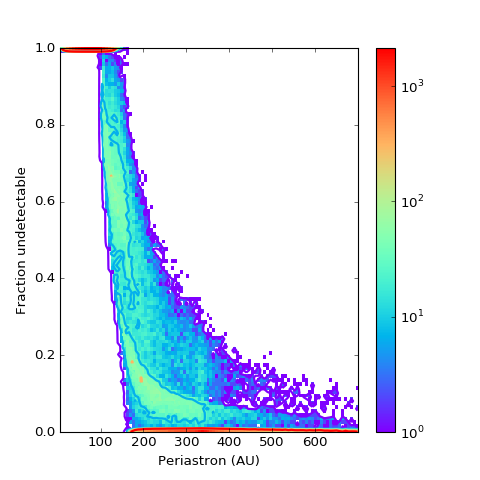

In [423]:
from matplotlib.colors import LogNorm
%matplotlib notebook
counts,xbins,ybins,image = plt.hist2d(periastron2,percent_undetectable2,bins=100,norm=LogNorm()\
                                      , cmap = plt.cm.rainbow)
plt.colorbar()
plt.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=2, cmap = plt.cm.rainbow, levels = [1,25,50,75,100])

#plt.scatter(periastron,percent_undetectable)
#plt.xlim(180,400)
plt.xlabel('Periastron (AU)')
plt.ylabel('Fraction undetectable')
plt.show()

### Fraction of all orbits for which the scatterer would have been detected

### ms = mc:

In [124]:
# Minimum distance for which an object of the companion's same magnitude would be detected (in mas): 

print 14.5*954.8e-6 #Convert Mjup to Msun

detectlim1 = 200. #mas 
# This detection limit is from Adam's pipeline for 2016 data, for which the companion had a contrast
# of 5.85 mags.  The pipeline is described in Kraus 2016 on KOI binaries paper.

0.0138446


In [125]:
detectlim1 = 200.
index = np.int_(np.linspace(0,a.shape[0]-1,a.shape[0]))
r = np.array([])
for i in index:
    # Generate a random orbital phase:
    phase = np.random.uniform(0,1)
    # Generate a random inclination for the scatterer to end up on:
    cosi = np.random.uniform(-1.0,1.0)  #Draws sin(i) from a uniform distribution.  
    scattereri = np.arccos(cosi) 
    # Compute separation of scatterer at that phase:
    M = 2.*np.pi*phase
    E = solve(eccentricity_anomaly, M, scatterere[i], 0.0001)
    A = scattererA_mas[i]*((cos(scattererO[i])*cos(scattererw[i]))-(sin(scattererO[i])*sin(scattererw[i])*\
                                                                    cos(scattereri)))
    B = scattererA_mas[i]*((sin(scattererO[i])*cos(scattererw[i]))+(cos(scattererO[i])*sin(scattererw[i])*\
                                                                    cos(scattereri)))
    F = scattererA_mas[i]*((-cos(scattererO[i])*sin(scattererw[i]))-(sin(scattererO[i])*cos(scattererw[i])*\
                                                                     cos(scattereri)))
    G = scattererA_mas[i]*((-sin(scattererO[i])*sin(scattererw[i]))+(cos(scattererO[i])*cos(scattererw[i])*\
                                                                     cos(scattereri)))
    xe = cos(E)-scatterere[i]
    ye = sqrt(1-scatterere[i]**2)*sin(E)
    X = A*xe + F*ye
    Y = B*xe + G*ye
    r1 = np.sqrt(X**2+Y**2)
    r=np.append(r,r1)
print r.shape

(97851,)


In [126]:
# Find which orbits the scatterer would have been detected:
# Compare separation of scatterer to detection limit:
found = np.where(r>=detectlim1) #<- list of indicies that were detected
# Find the companion periastron distance that corresponds to those orbits:
peri_found1 = periastron[found[0]] #<- periastron distances in AU in those indicies
print found[0].shape
print peri_found1.shape
#plt.rcParams.keys()

(66584,)
(66584,)


<IPython.core.display.Javascript object>


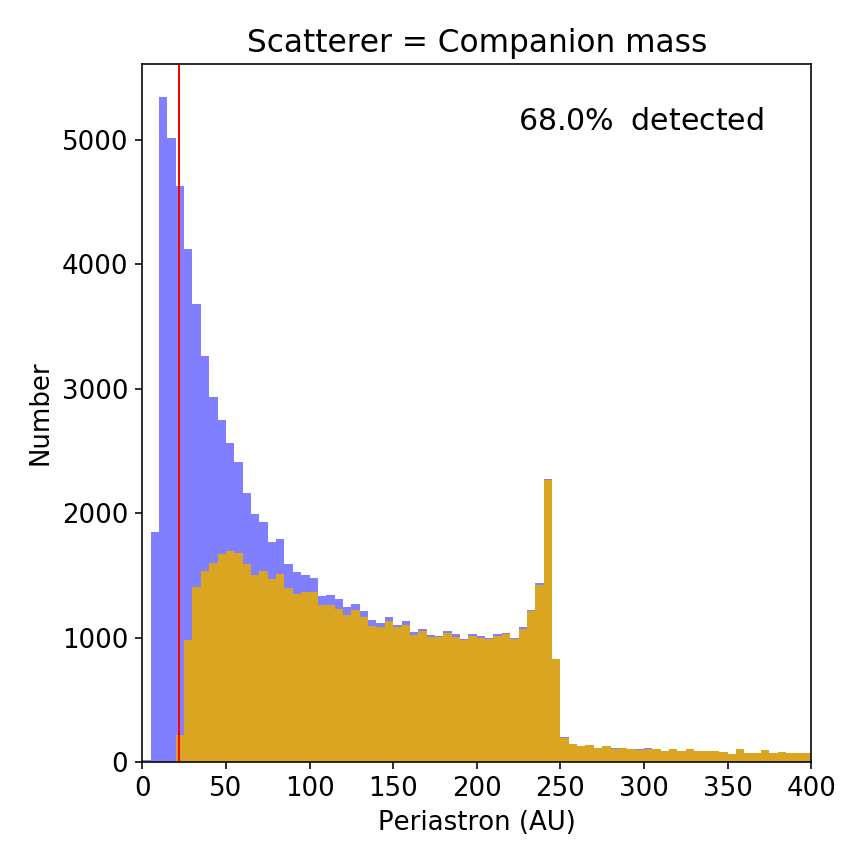

In [127]:
step = 5
percent1 = np.round((np.float(peri_found1.shape[0])/np.float(r.shape[0]))*100.,decimals=1)
bins=np.arange(0,1000,step)
%matplotlib notebook
fig1 = plt.figure
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.rcParams['font.size'] = 13
plt.hist(periastron,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(peri_found1,bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=(detectlim1/1000)*d, linewidth=1,color='red')
plt.title('Scatterer = Companion mass')
plt.xlabel('Periastron (AU)')
plt.ylabel('Number')
plt.xlim(0,400)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(650, 5700), xytext=(650, 5700))
plt.annotate(r"${0}\% \;$ detected".format(percent1),xy=(.60, 0.85), xycoords='figure fraction',fontsize=15)
#plt.legend()
plt.tight_layout()
plt.show()
#plt.savefig("detected_scatterers_equalmass.pdf", format='pdf')

<IPython.core.display.Javascript object>


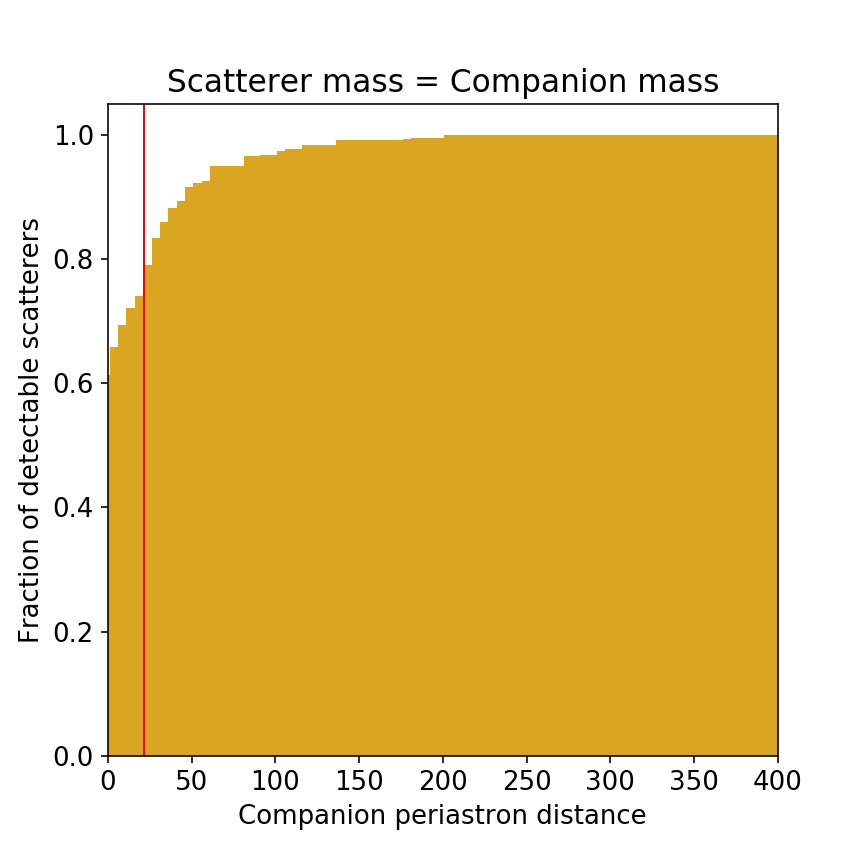

In [30]:
index = np.arange(0,1000,step)
percent = np.array([])
for plo,phi in zip(index[:-1],index[1:]):
    # Total number of orbits in a specific periastron range:
    binned = np.where((periastron <= phi) & (periastron >= plo))
    # Orbits in that periastron range that were detected:
    binned2 = np.where((peri_found1 <= phi) & (peri_found1 >= plo))
    if binned[0].shape[0] == 0:
        percents = 0.
    else:
        percents = float(binned2[0].shape[0])/float(binned[0].shape[0])
    percent = np.append(percent,percents)
#print percent

xaxis = index[:-1]+1

%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.bar(xaxis,percent,width = 100,color='goldenrod')
plt.axvline(x=(detectlim1/1000)*d, linewidth=1,color='red')
plt.xlim(0,400)
plt.ylim(0,1.05)
plt.xlabel('Companion periastron distance')
plt.ylabel('Fraction of detectable scatterers')
plt.title('Scatterer mass = Companion mass')
plt.show()
#plt.savefig("fraction_detected_scatterers_equalmass.jpg", format='png', dpi=100)

<IPython.core.display.Javascript object>


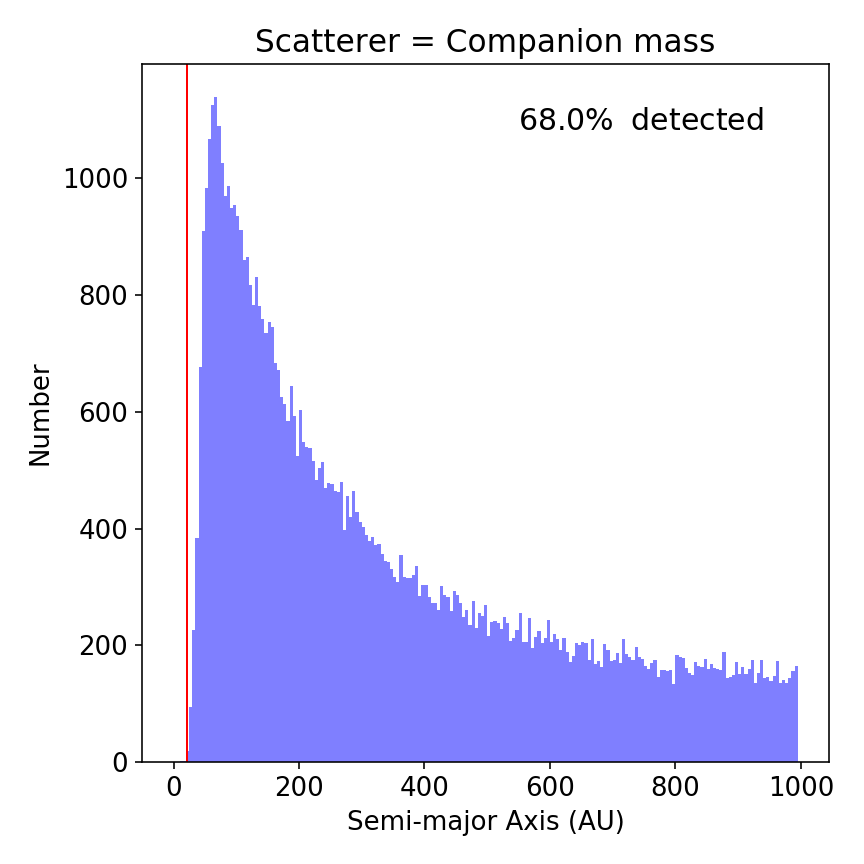

In [34]:
bins=np.arange(0,1000,step)
%matplotlib notebook
fig1 = plt.figure
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.rcParams['font.size'] = 13
plt.hist(scattererA_mas,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.axvline(x=(detectlim1/1000)*d, linewidth=1,color='red')
plt.title('Scatterer = Companion mass')
plt.xlabel('Semi-major Axis (AU)')
plt.ylabel('Number')
#plt.xlim(0,400)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(650, 5700), xytext=(650, 5700))
plt.annotate(r"${0}\% \;$ detected".format(percent1),xy=(.60, 0.85), xycoords='figure fraction',fontsize=15)
#plt.legend()
plt.tight_layout()
plt.show()
#plt.savefig("detected_scatterers_equalmass.pdf", format='pdf')

### ms = 1.5 mc

In [128]:
# Minimum distance for which an object of the companion's same magnitude would be detected (in mas): 
G,M,mc = 6.67e-8,(0.85*2e33),14.5
ms = mc
ms15 = 1.5*mc
ms2 = 2*mc
ms5 = 5*mc
ms10 = 10*mc
print ms15

print ms15*954.8e-6 #Convert Mjup to Msun
#30 Mjup = 0.021483 Msun
#print 30*954.8e-6

#detectlim2 = 150. #mas 
# This detection limit is extrapolated from Adam's pipeline for 2016 data detection limits.  At 10 MYr the abs mag for
# 25.5 Mjup is 8.275 in K band.  Abs mag for primary is 3.345 => contrast is 4.93 ~= 5. => 150 mas from his limits.
# The pipeline is described in Kraus 2016 on KOI binaries paper.

#detectlim = (85./d)*1000 # 85 AU converted to mas
# Detection limit from Ireland 2011 - lists limit of 24 Mjup as 75 AU.  Interpolation
# with other limits gives an approximate limit of 145 AU for 15 Mjup.

detectlim2 = 75. #mas
# From aperture masking limits in L band from 2011 pushes in the closest.

print (detectlim2/1000)*d

21.75
0.0207669
8.160492587174732


In [129]:
detectlim2 = 75.
index = np.int_(np.linspace(0,a.shape[0]-1,a.shape[0]))
r = np.array([])
for i in index:
    # Generate a random inclination for the scatterer to end up on:
    cosi = np.random.uniform(-1.0,1.0)  #Draws sin(i) from a uniform distribution.  
    scattereri = np.arccos(cosi) 
    # Generate a random orbital phase:
    phase = np.random.uniform(0,1)
    # Compute separation of scatterer at that phase:
    M = 2.*np.pi*phase
    E = solve(eccentricity_anomaly, M, scatterere15[i], 0.0001)
    A = scattererA_mas15[i]*((cos(scattererO[i])*cos(scattererw[i]))-(sin(scattererO[i])*sin(scattererw[i])*cos(scattereri)))
    B = scattererA_mas15[i]*((sin(scattererO[i])*cos(scattererw[i]))+(cos(scattererO[i])*sin(scattererw[i])*cos(scattereri)))
    F = scattererA_mas15[i]*((-cos(scattererO[i])*sin(scattererw[i]))-(sin(scattererO[i])*cos(scattererw[i])*cos(scattereri)))
    G = scattererA_mas15[i]*((-sin(scattererO[i])*sin(scattererw[i]))+(cos(scattererO[i])*cos(scattererw[i])*cos(scattereri)))
    xe = cos(E)-scatterere15[i]
    ye = sqrt(1-scatterere15[i]**2)*sin(E)
    X = A*xe + F*ye
    Y = B*xe + G*ye
    r1 = np.sqrt(X**2+Y**2)
    r=np.append(r,r1)
print r.shape

(97851,)


In [130]:
# Find which orbits the scatterer would have been detected:
# Compare separation of scatterer to detection limit:
found = np.where(r>=detectlim2) #<- list of indicies that were detected
# Find the companion periastron distance that corresponds to those orbits:
peri_found2 = periastron[found[0]] #<- periastron distances in AU in those indicies
print found[0].shape
print peri_found2.shape

(88021,)
(88021,)


<IPython.core.display.Javascript object>


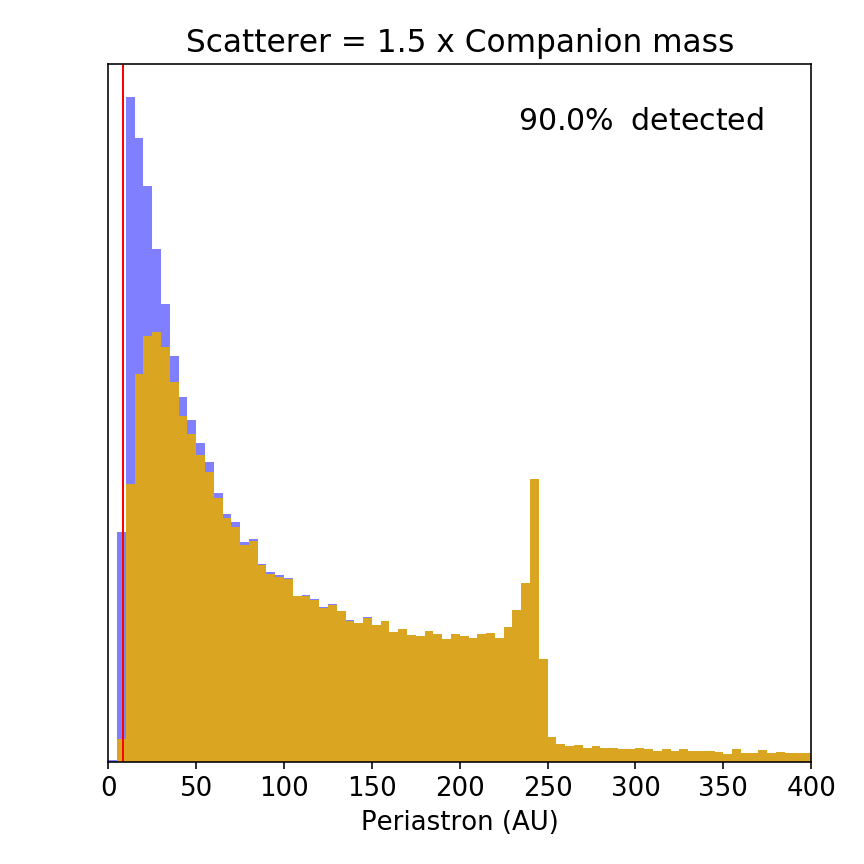

In [131]:
found = np.where(r>=detectlim2)
peri_found2 = periastron[found[0]]
step = 5
percent2 = np.round((np.float(peri_found2.shape[0])/np.float(r.shape[0]))*100.,decimals=1)
bins=np.arange(0,1000,step)
%matplotlib notebook
fig2=plt.figure()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.hist(periastron,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(peri_found2,bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=(detectlim2/1000)*d, linewidth=1,color='red')
plt.title('Scatterer = 1.5 x Companion mass')
plt.xlabel('Periastron (AU)')
#plt.ylabel('Number')
plt.xlim(0,400)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(650, 5700), xytext=(650, 5700))
plt.annotate(r"${0}\% \;$ detected".format(percent2),xy=(.60, 0.85), xycoords='figure fraction',fontsize=15)
plt.tight_layout()
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')
#plt.legend()
plt.show()
#plt.savefig("detected_scatterers_15mc.pdf", format='pdf')

In [39]:
index = np.arange(0,1000,step)
percent = np.array([])
for plo,phi in zip(index[:-1],index[1:]):
    # Total number of orbits in a specific periastron range:
    binned = np.where((periastron <= phi) & (periastron >= plo))
    # Orbits in that periastron range that were detected:
    binned2 = np.where((peri_found <= phi) & (peri_found >= plo))
    if binned[0].shape[0] == 0:
        percents = 0.
    else:
        percents = float(binned2[0].shape[0])/float(binned[0].shape[0])
    percent = np.append(percent,percents)
#print percent

xaxis = index[:-1]+1

%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.bar(xaxis,percent,width = 100,color='goldenrod')
plt.axvline(x=(detectlim/1000)*d, linewidth=1,color='red')
plt.xlim(0,400)
plt.ylim(0,1.05)
plt.xlabel('Companion periastron distance')
plt.ylabel('Fraction of detectable scatterers')
plt.title('Scatterer mass = 1.5 X Companion mass')
plt.show()
#plt.savefig("fraction_detected_scatterers_1point5mass.jpg", format='png', dpi=100)

NameError: name 'peri_found' is not defined

### ms = 2mc:

In [132]:
# Minimum distance for which an object of the companion's same magnitude would be detected (in mas): 
G,M,mc = 6.67e-8,(0.85*2e33),(14.5*1.898e30)
ms = mc
ms15 = 1.5*mc
ms2 = 2*mc
ms5 = 5*mc
ms10 = 10*mc


#detectlim = (55./d)*1000 # AU converted to mas
#detectlim3 = 75. #mas

# Detection limit from Kraus 2008 - lists ratio limit (ms/mp) at 80 mas for 0.046 (taking inner edge
# of range) and 40 mas for 0.06.  Interpolating gives about 75 mas for 0.048 ratio.

detectlim3 = 17. #mas
# From CH4s aperture masking from 2014 - got down to 4.42 mag contrast at 20 mas.  This companion would have 4.25
# contrast in H band

In [133]:
index = np.int_(np.linspace(0,a.shape[0]-1,a.shape[0]))
r = np.array([])
for i in index:
    # Generate a random inclination for the scatterer to end up on:
    cosi = np.random.uniform(-1.0,1.0)  #Draws sin(i) from a uniform distribution.  
    scattereri = np.arccos(cosi) 
    # Generate a random orbital phase:
    phase = np.random.uniform(0,1)
    # Compute separation of scatterer at that phase:
    M = 2.*np.pi*phase
    E = solve(eccentricity_anomaly, M, scatterere2[i], 0.0001)
    A = scattererA_mas2[i]*((cos(scattererO[i])*cos(scattererw[i]))-(sin(scattererO[i])*sin(scattererw[i])*cos(scattereri)))
    B = scattererA_mas2[i]*((sin(scattererO[i])*cos(scattererw[i]))+(cos(scattererO[i])*sin(scattererw[i])*cos(scattereri)))
    F = scattererA_mas2[i]*((-cos(scattererO[i])*sin(scattererw[i]))-(sin(scattererO[i])*cos(scattererw[i])*cos(scattereri)))
    G = scattererA_mas2[i]*((-sin(scattererO[i])*sin(scattererw[i]))+(cos(scattererO[i])*cos(scattererw[i])*cos(scattereri)))
    xe = cos(E)-scatterere2[i]
    ye = sqrt(1-scatterere2[i]**2)*sin(E)
    X = A*xe + F*ye
    Y = B*xe + G*ye
    r1 = np.sqrt(X**2+Y**2)
    r=np.append(r,r1)
print r.shape

(97851,)


In [134]:
# Find which orbits the scatterer would have been detected:
# Compare separation of scatterer to detection limit:
found = np.where(r>=detectlim3) #<- list of indicies that were detected
# Find the companion periastron distance that corresponds to those orbits:
peri_found3 = periastron[found[0]] #<- periastron distances in AU in those indicies
print found[0].shape
print peri_found3.shape


(97398,)
(97398,)


<IPython.core.display.Javascript object>


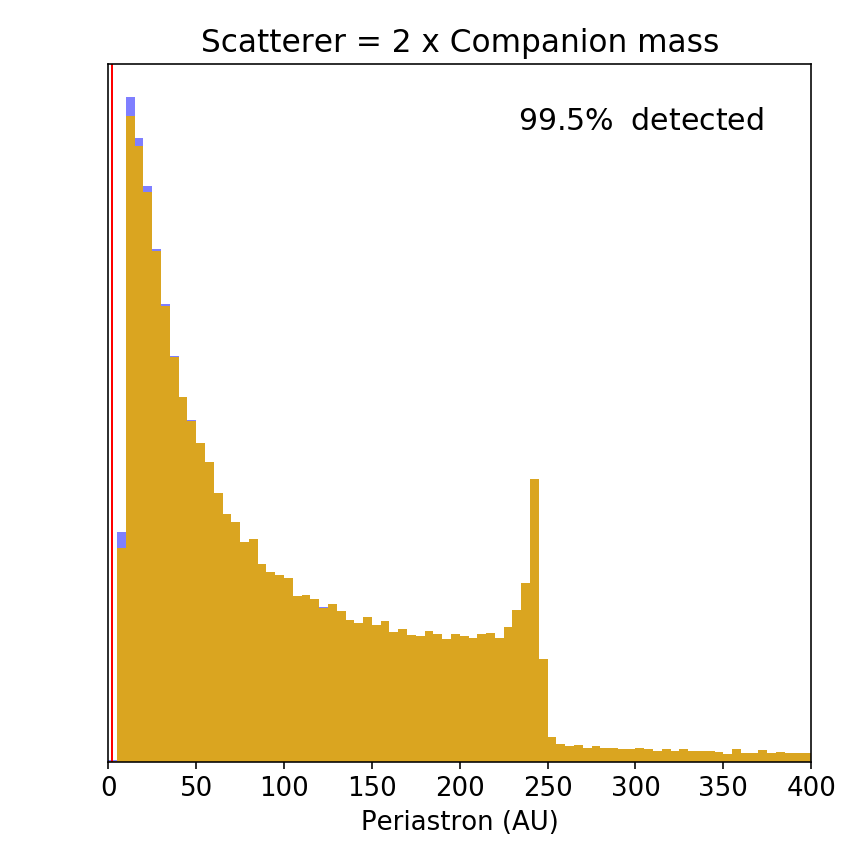

In [135]:
step = 5
percent3 = np.round((np.float(peri_found3.shape[0])/np.float(r.shape[0]))*100.,decimals=1)
bins=np.arange(0,1000,step)
%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.hist(periastron,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(peri_found3,bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=(detectlim3/1000)*d, linewidth=1,color='red')
plt.title('Scatterer = 2 x Companion mass')
plt.xlabel('Periastron (AU)')
#plt.ylabel('Number')
plt.xlim(0,400)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(650, 5700), xytext=(650, 5700))
plt.annotate(r"${0}\% \;$ detected".format(percent3),xy=(.60, 0.85), xycoords='figure fraction',fontsize=15)
plt.tight_layout()
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')
#plt.legend()
plt.show()
#plt.savefig("detected_scatterers_2mc.pdf", format='pdf')

<IPython.core.display.Javascript object>


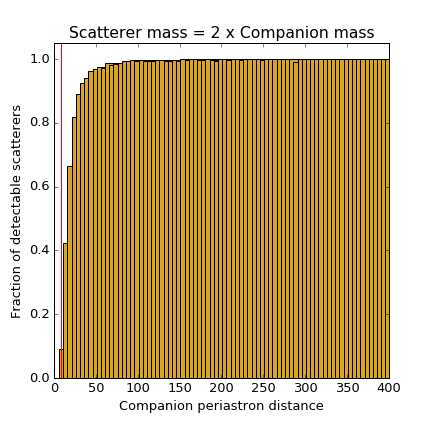

In [60]:
#index = np.linspace(0,1000,51)
#step = 20
index = np.arange(0,1000,step)
percent = np.array([])
for plo,phi in zip(index[:-1],index[1:]):
    # Total number of orbits in a specific periastron range:
    binned = np.where((periastron <= phi) & (periastron >= plo))
    # Orbits in that periastron range that were detected:
    binned2 = np.where((peri_found <= phi) & (peri_found >= plo))
    if binned[0].shape[0] == 0:
        percents = 0.
    else:
        percents = float(binned2[0].shape[0])/float(binned[0].shape[0])
    percent = np.append(percent,percents)
#print percent

xaxis = index[:-1]+1
minnn=periastron[np.where(periastron==np.min(periastron))[0]]
%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.bar(xaxis,percent,width = 100,color='goldenrod')
plt.axvline(x=(detectlim/1000)*d, linewidth=1,color='red')
#plt.axvline(x=minnn, linewidth=1, color='blue')
plt.xlim(0,400)
plt.ylim(0,1.05)
plt.xlabel('Companion periastron distance')
plt.ylabel('Fraction of detectable scatterers')
plt.title('Scatterer mass = 2 x Companion mass')
plt.show()
plt.savefig("fraction_detected_scatterers_2mc.jpg", format='png', dpi=100)

### ms=5mc:

In [136]:
# Minimum distance for which an object of the companion's same magnitude would be detected (in mas): 
G,M,mc = 6.67e-8,(0.85*2e33),(14.5*1.898e30)
ms = mc
ms2 = 2*mc
ms5 = 5*mc
ms10 = 10*mc
print ms5/M

#detectlim4 = 35. #mas
#print (detectlim4/1000)*d

# Detection limit from Kraus 2008 - lists limit of 20 mas for 0.25, 40 for 0.06. Interpolation
# gives approx 35 mas for 0.1186 ratio

detectlim4 = 16. #mas
# From CH4s in 2014, got to contrast of 1.89 at 10 mas and 4.42 at 20 mas -> 16 is interpolation

0.0809441176471


In [137]:
index = np.int_(np.linspace(0,a.shape[0]-1,a.shape[0]))
r = np.array([])
for i in index:
    # Generate a random orbital phase:
    phase = np.random.uniform(0,1)
    # Compute separation of scatterer at that phase:
    M = 2.*np.pi*phase
    # Generate a random inclination for the scatterer to end up on:
    cosi = np.random.uniform(-1.0,1.0)  #Draws sin(i) from a uniform distribution.  
    scattereri = np.arccos(cosi)
    E = solve(eccentricity_anomaly, M, scatterere5[i], 0.0001)
    A = scattererA_mas5[i]*((cos(scattererO[i])*cos(scattererw[i]))-(sin(scattererO[i])*sin(scattererw[i])*cos(scattereri)))
    B = scattererA_mas5[i]*((sin(scattererO[i])*cos(scattererw[i]))+(cos(scattererO[i])*sin(scattererw[i])*cos(scattereri)))
    F = scattererA_mas5[i]*((-cos(scattererO[i])*sin(scattererw[i]))-(sin(scattererO[i])*cos(scattererw[i])*cos(scattereri)))
    G = scattererA_mas5[i]*((-sin(scattererO[i])*sin(scattererw[i]))+(cos(scattererO[i])*cos(scattererw[i])*cos(scattereri)))
    xe = cos(E)-scatterere5[i]
    ye = sqrt(1-scatterere5[i]**2)*sin(E)
    X = A*xe + F*ye
    Y = B*xe + G*ye
    r1 = np.sqrt(X**2+Y**2)
    r=np.append(r,r1)
print r.shape

(97851,)


In [138]:
# Find which orbits the scatterer would have been detected:
# Compare separation of scatterer to detection limit:
found = np.where(r>=detectlim4) #<- list of indicies that were detected
# Find the companion periastron distance that corresponds to those orbits:
peri_found4 = periastron[found[0]] #<- periastron distances in AU in those indicies
print found[0].shape
print peri_found4.shape

(97613,)
(97613,)


In [139]:
#index = np.linspace(0,5000,51)
index = np.arange(0,1000,step)
percent = np.array([])
for plo,phi in zip(index[:-1],index[1:]):
    # Total number of orbits in a specific periastron range:
    binned = np.where((periastron <= phi) & (periastron >= plo))
    # Orbits in that periastron range that were detected:
    binned2 = np.where((peri_found <= phi) & (peri_found >= plo))
    if binned[0].shape[0] == 0:
        percents = 0.
    else:
        percents = float(binned2[0].shape[0])/float(binned[0].shape[0])
    percent = np.append(percent,percents)
#print percent

xaxis = index[:-1]+1

%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.bar(xaxis,percent,width = 100,color='goldenrod')
plt.axvline(x=(detectlim/1000)*d, linewidth=1,color='red')
plt.xlim(0,400)
plt.ylim(0,1.05)
plt.xlabel('Companion periastron distance')
plt.ylabel('Fraction of detectable scatterers')
plt.title('Scatterer mass = 5 x Companion mass')
plt.show()
#plt.savefig("fraction_detected_scatterers_5mc.jpg", format='png', dpi=100)

NameError: name 'peri_found' is not defined

<IPython.core.display.Javascript object>


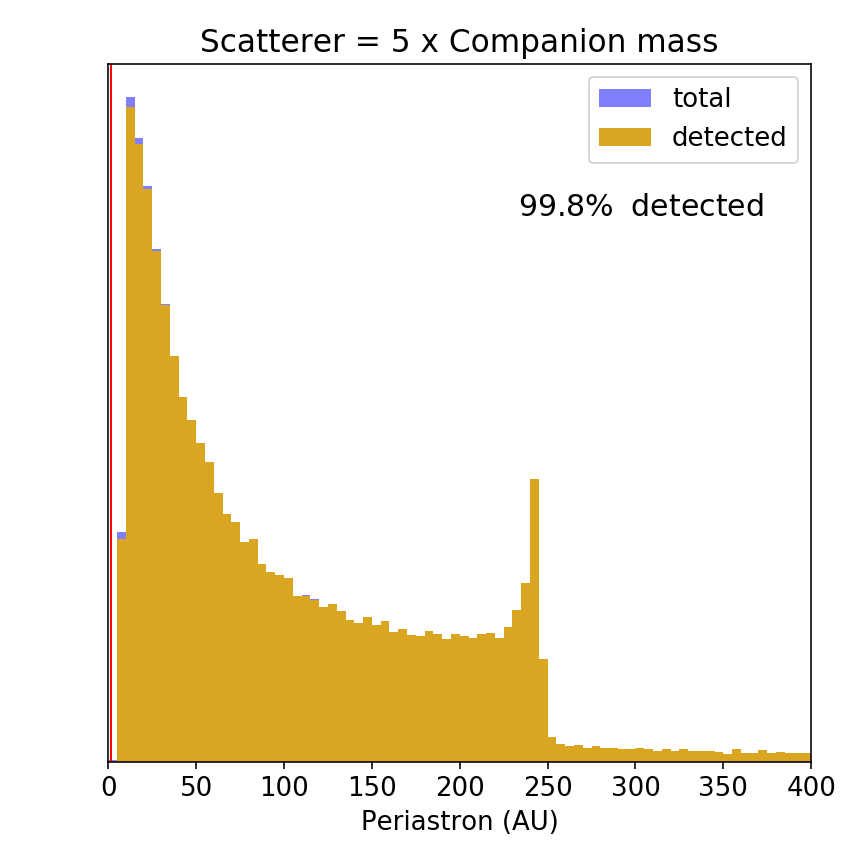

In [140]:
step = 5
percent4 = np.round((np.float(peri_found4.shape[0])/np.float(r.shape[0]))*100.,decimals=1)
bins=np.arange(0,1000,step)
%matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.hist(periastron,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(peri_found4,bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=(detectlim4/1000)*d, linewidth=1,color='red')
plt.title('Scatterer = 5 x Companion mass')
plt.xlabel('Periastron (AU)')
#plt.ylabel('Number')
plt.xlim(0,400)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate(r"${0}\% \;$ detected".format(percent4),xy=(.60, 0.75), xycoords='figure fraction',fontsize=15)
plt.tight_layout()
#plt.xlim(0,1250)
#plt.ylim(0,9700)
plt.legend()
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')
plt.show()
#plt.savefig("detected_scatterers_5mc.pdf", format='pdf')

<IPython.core.display.Javascript object>


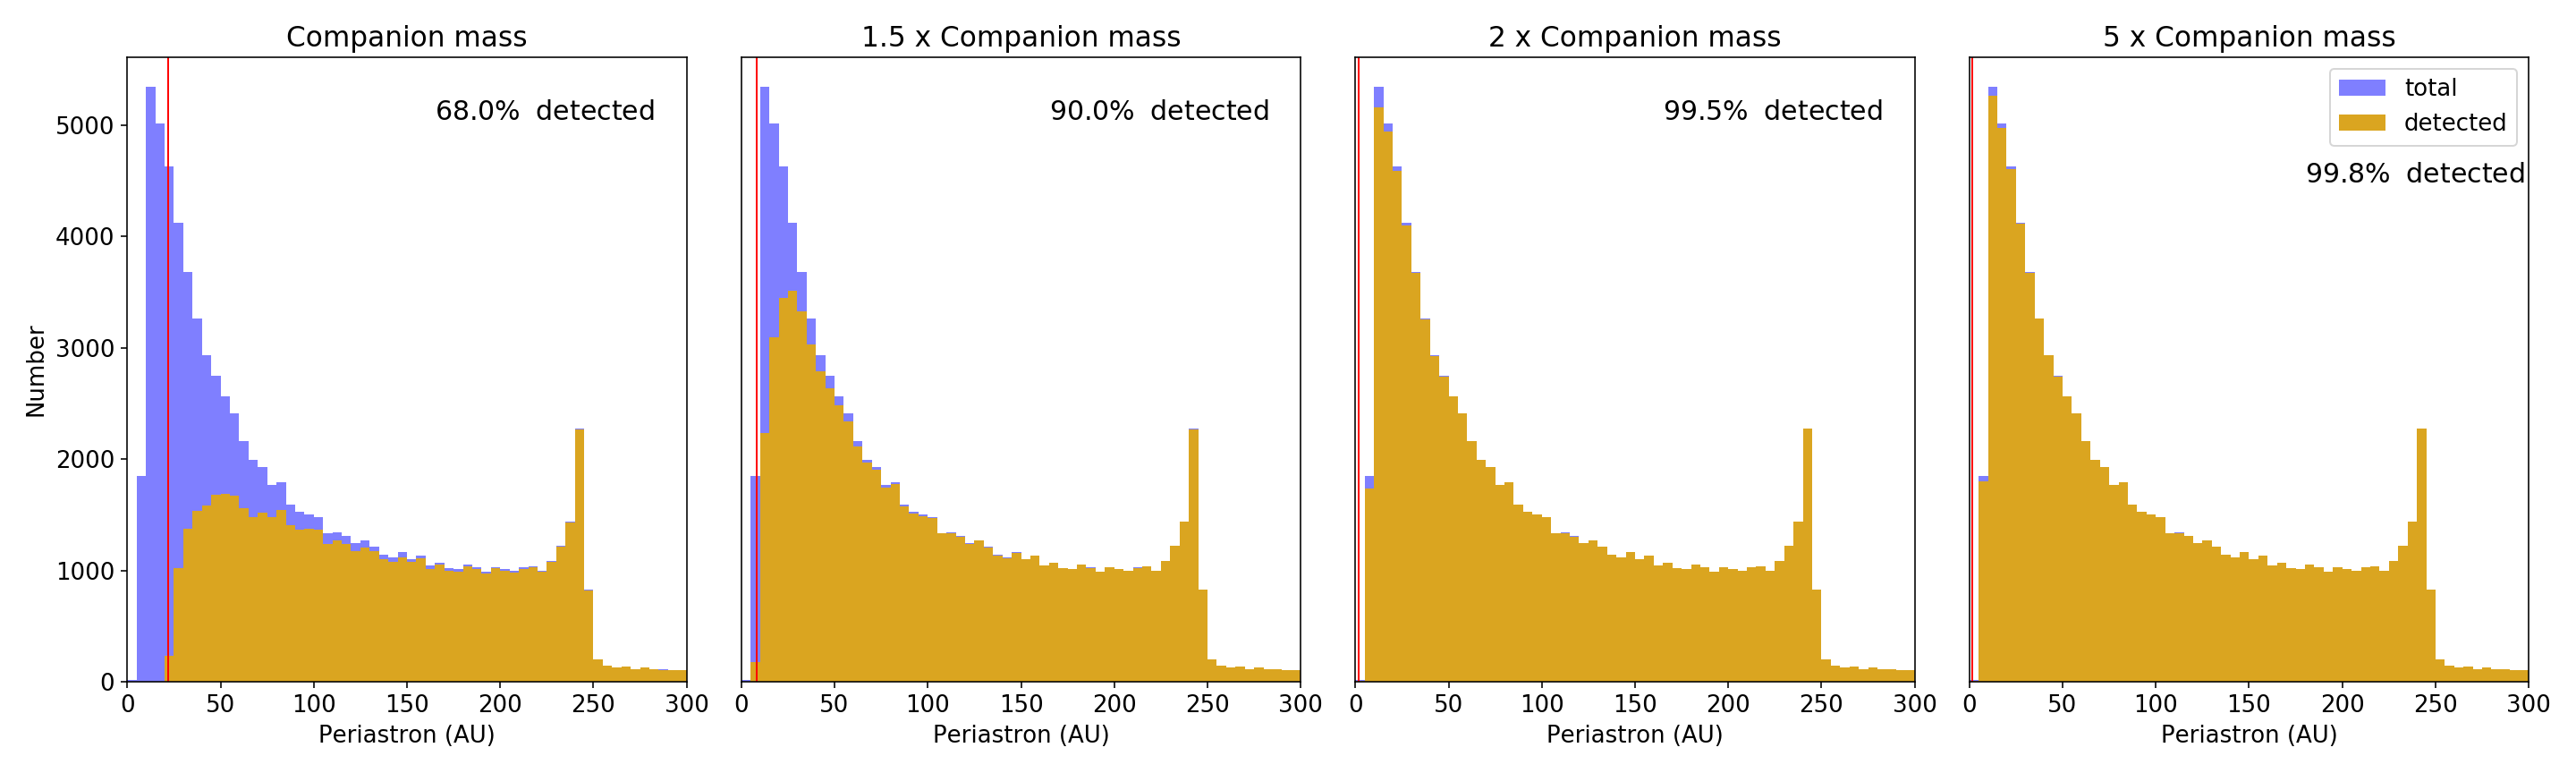

In [48]:
step = 5
bins=np.arange(0,1000,step)
%matplotlib notebook
plt.figure(figsize=(20, 6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.025, hspace=0.025)

# 1:
ax7 = plt.subplot2grid((1,4), (0,0))
plt.hist(periastron,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(peri_found1,bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=(detectlim1/1000)*d, linewidth=1,color='red')
plt.title('Companion mass')
plt.xlabel('Periastron (AU)')
plt.ylabel('Number')
plt.xlim(0,300)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate(r"${0}\% \;$ detected".format(percent1),xy=(.55, 0.9), xycoords='axes fraction',fontsize=15)


# 2:
ax8 = plt.subplot2grid((1,4), (0,1),sharey=ax7)
plt.hist(periastron,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(peri_found2,bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=(detectlim2/1000)*d, linewidth=1,color='red')
plt.title('1.5 x Companion mass')
plt.xlabel('Periastron (AU)')
plt.xlim(0,300)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate(r"${0}\% \;$ detected".format(percent2),xy=(.55, 0.9), xycoords='axes fraction',fontsize=15)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')

# 3:
ax9 = plt.subplot2grid((1,4), (0,2),sharey=ax7)
plt.hist(periastron,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(peri_found3,bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=(detectlim3/1000)*d, linewidth=1,color='red')
plt.title('2 x Companion mass')
plt.xlabel('Periastron (AU)')
plt.xlim(0,300)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate(r"${0}\% \;$ detected".format(percent3),xy=(.55, 0.9), xycoords='axes fraction',fontsize=15)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')

# 4:
ax8 = plt.subplot2grid((1,4), (0,3),sharey=ax7)
plt.hist(periastron,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(peri_found4,bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=(detectlim4/1000)*d, linewidth=1,color='red')
plt.title('5 x Companion mass')
plt.xlabel('Periastron (AU)')
plt.xlim(0,300)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate(r"${0}\% \;$ detected".format(percent4),xy=(.6, 0.8), xycoords='axes fraction',fontsize=15)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')
plt.legend()

plt.tight_layout()

plt.show()
#plt.savefig('detected_scatterers_all.pdf', format='pdf')

### Plotting this on log plot:

<IPython.core.display.Javascript object>


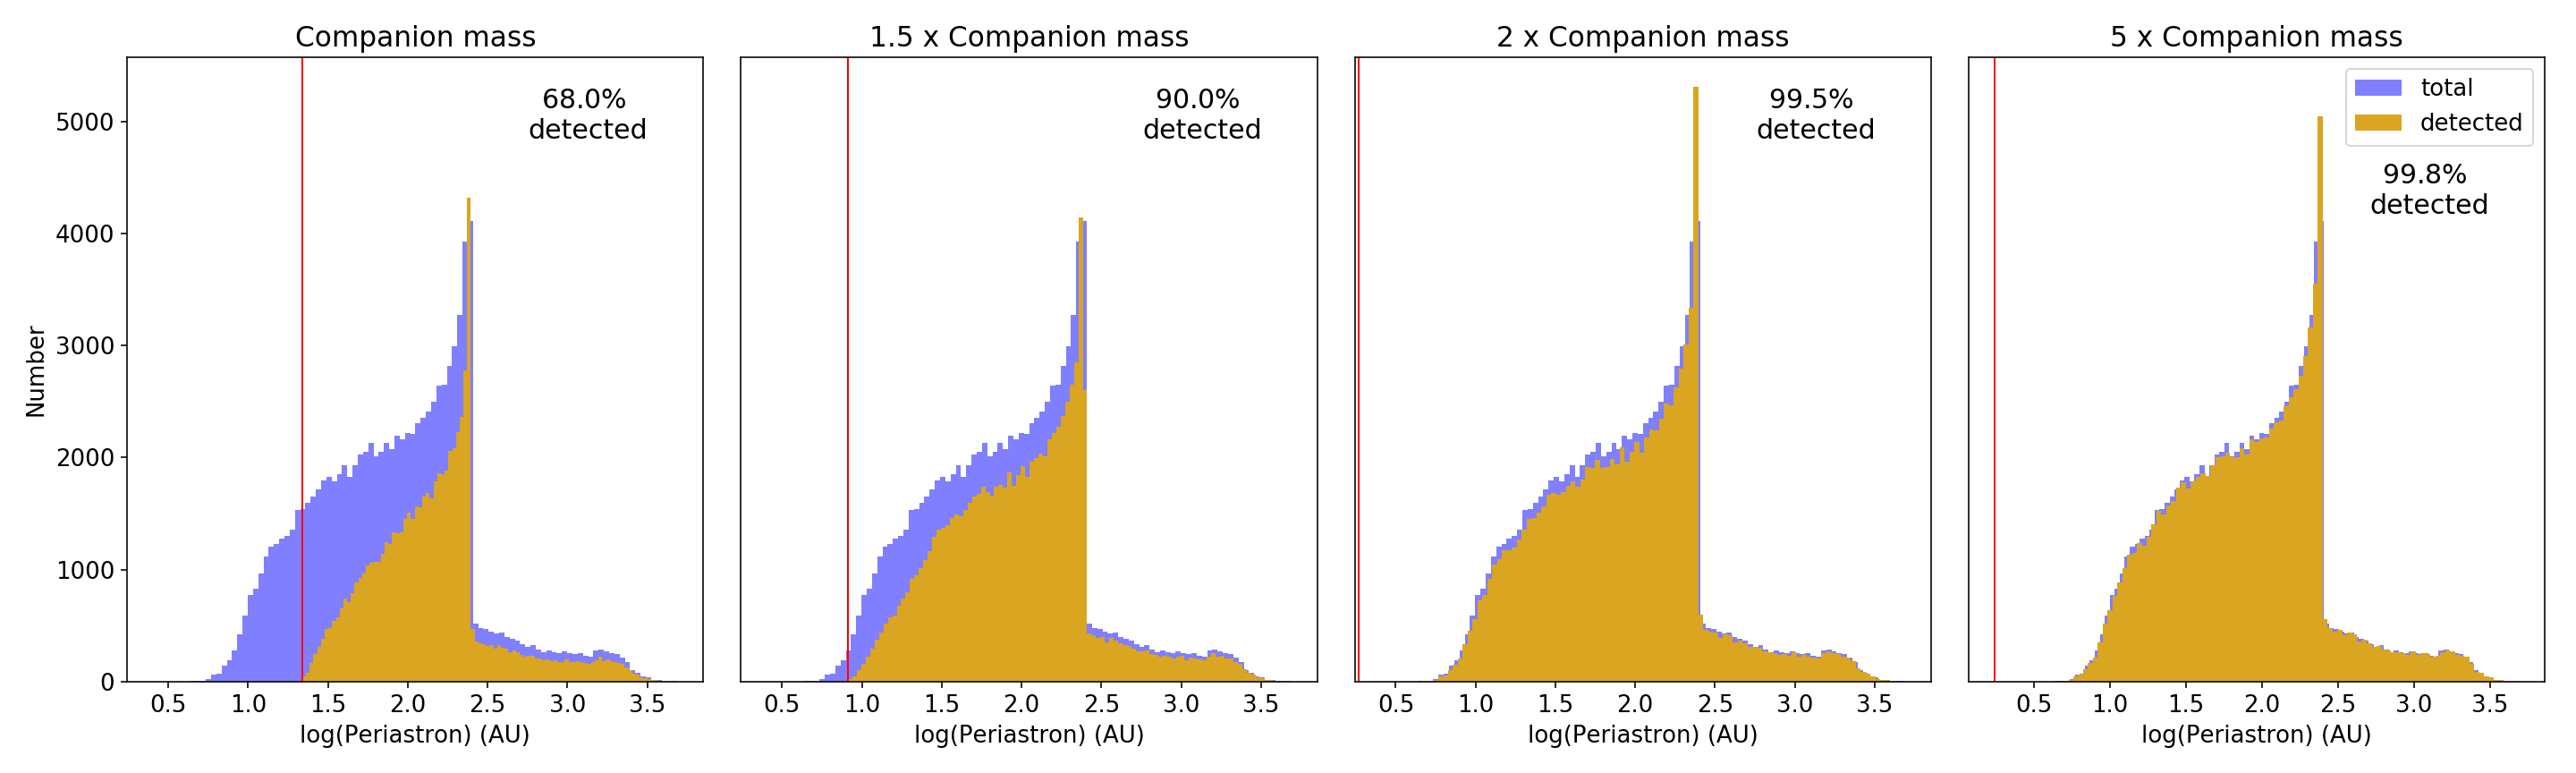

In [142]:
step = 5
bins=np.arange(0,1000,step)
%matplotlib notebook
plt.figure(figsize=(20, 6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.025, hspace=0.025)
bins=100

# 1:
ax7 = plt.subplot2grid((1,4), (0,0))
plt.hist(np.log10(periastron),bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(np.log10(peri_found1),bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=np.log10((detectlim1/1000)*d), linewidth=1,color='red')
plt.title('Companion mass')
plt.xlabel('log(Periastron) (AU)')
plt.ylabel('Number')
#plt.xlim(0,300)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate("${0}\% \; $ \ndetected".format(percent1),xy=(.8, 0.87), xycoords='axes fraction',fontsize=15,\
            horizontalalignment='center')

# 2:
ax8 = plt.subplot2grid((1,4), (0,1),sharey=ax7)
plt.hist(np.log10(periastron),bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(np.log10(peri_found2),bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=np.log10((detectlim2/1000)*d), linewidth=1,color='red')
plt.title('1.5 x Companion mass')
plt.xlabel('log(Periastron) (AU)')
#plt.xlim(0,300)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate("${0}\% \; $ \ndetected".format(percent2),xy=(.8, 0.87), xycoords='axes fraction',fontsize=15,\
            horizontalalignment='center')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')

# 3:
ax9 = plt.subplot2grid((1,4), (0,2),sharey=ax7)
plt.hist(np.log10(periastron),bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(np.log10(peri_found3),bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=np.log10((detectlim3/1000)*d), linewidth=1,color='red')
plt.title('2 x Companion mass')
plt.xlabel('log(Periastron) (AU)')
#plt.xlim(0,300)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate("${0}\% \; $ \ndetected".format(percent3),xy=(.8, 0.87), xycoords='axes fraction',fontsize=15,\
            horizontalalignment='center')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')

# 4:
ax8 = plt.subplot2grid((1,4), (0,3),sharey=ax7)
plt.hist(np.log10(periastron),bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(np.log10(peri_found4),bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=np.log10((detectlim4/1000)*d), linewidth=1,color='red')
plt.title('5 x Companion mass')
plt.xlabel('log(Periastron) (AU)')
#plt.xlim(0,300)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate("${0}\% \; $ \ndetected".format(percent4),xy=(.8, 0.75), xycoords='axes fraction',fontsize=15,\
            horizontalalignment='center')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')
plt.legend()

plt.tight_layout()

plt.show()
plt.savefig('detected_scatterers_all_logscale.pdf', format='pdf')

#plt.xticks([1,2],[r'$10^{1}$',r'$10^{2}$'])

### Scatterer's new periastron

In [65]:
# Peri and apastron in the plane of the orbit (not projected onto the sky plane)
scatterer_apastron = scattererA_au*(1+scatterere)
scatterer_periastron = scattererA_au*(1-scatterere)
scatterer_apastron15 = scattererA_au15*(1+scatterere15)
scatterer_periastron15 = scattererA_au15*(1-scatterere15)
scatterer_apastron2 = scattererA_au2*(1+scatterere2)
scatterer_periastron2 = scattererA_au2*(1-scatterere2)
scatterer_apastron5 = scattererA_au5*(1+scatterere5)
scatterer_periastron5 = scattererA_au5*(1-scatterere5)

<IPython.core.display.Javascript object>


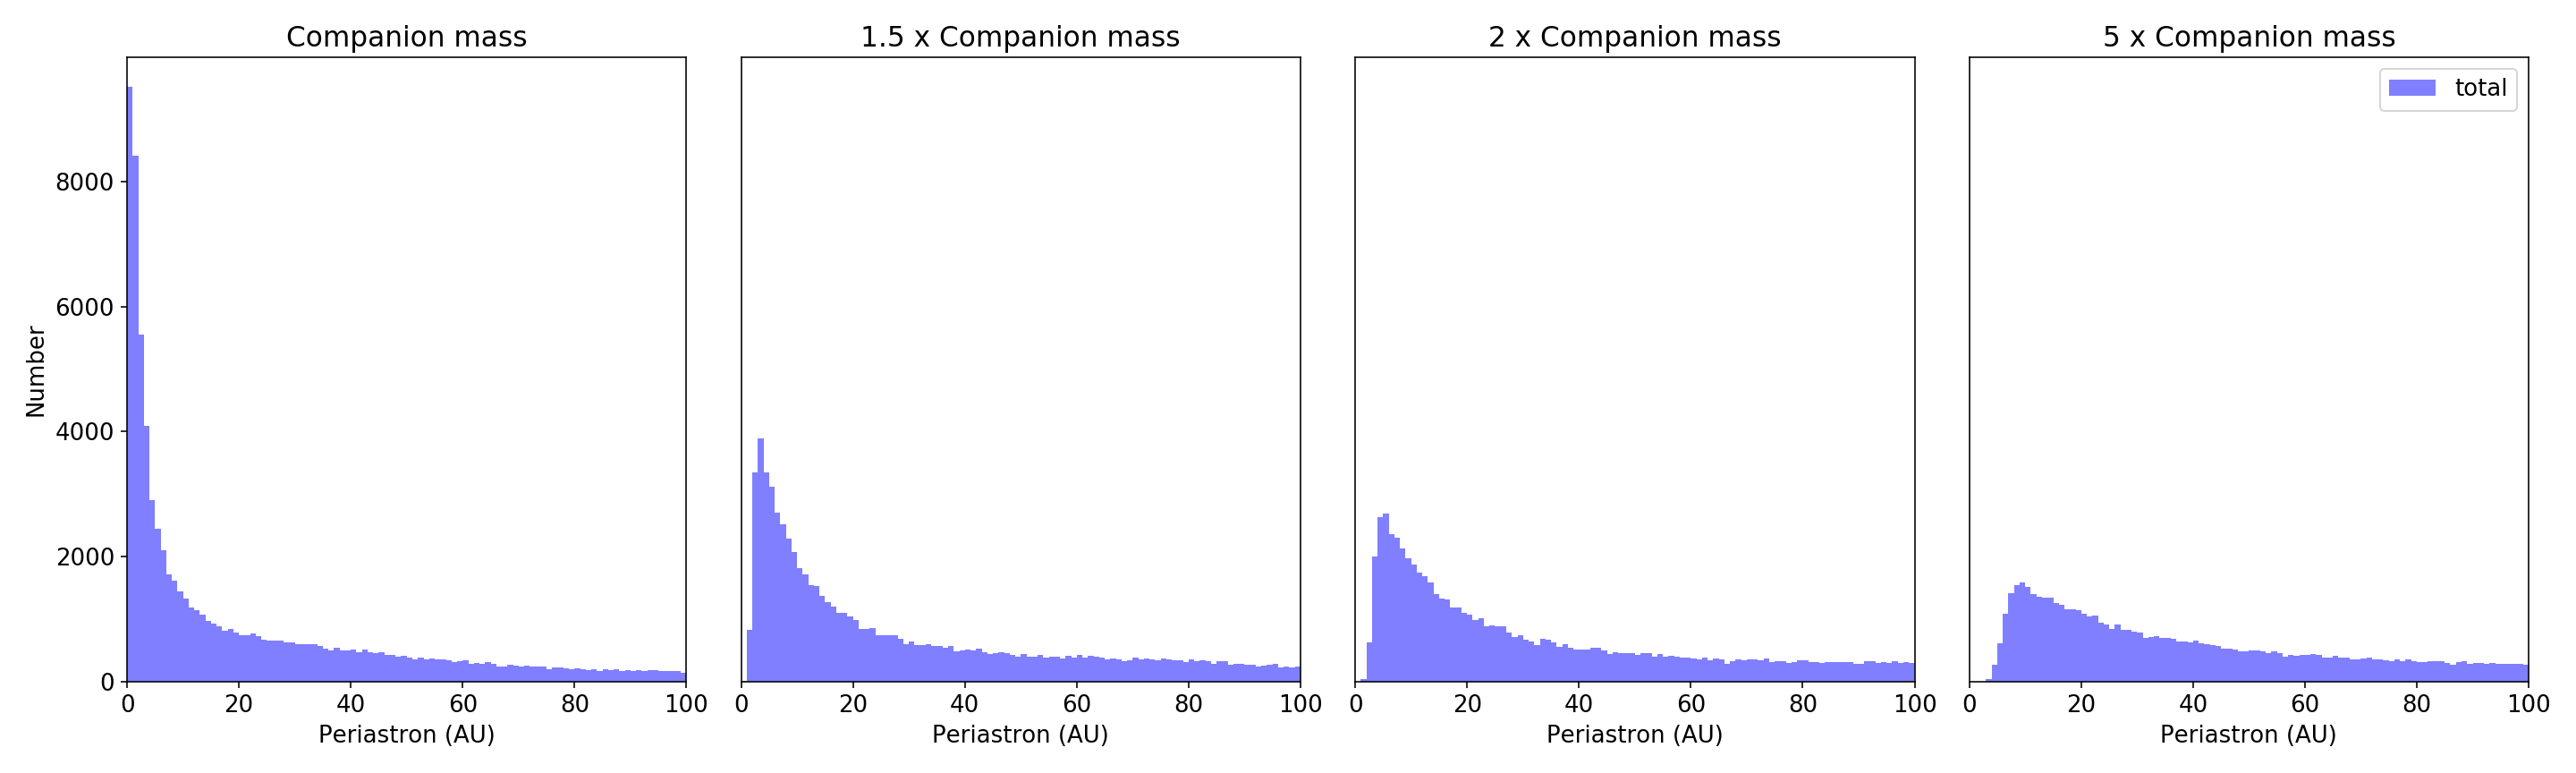

In [70]:
step = 1
bins=np.arange(0,1000,step)
%matplotlib notebook
plt.figure(figsize=(20, 6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.025, hspace=0.025)

# 1:
ax7 = plt.subplot2grid((1,4), (0,0))
plt.hist(scatterer_periastron,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.title('Companion mass')
plt.xlabel('Periastron (AU)')
plt.ylabel('Number')
plt.xlim(0,100)
#plt.ylim(0,7200)


# 2:
ax8 = plt.subplot2grid((1,4), (0,1),sharey=ax7)
plt.hist(scatterer_periastron15,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.title('1.5 x Companion mass')
plt.xlabel('Periastron (AU)')
plt.xlim(0,100)
#plt.ylim(0,7200)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')

# 3:
ax9 = plt.subplot2grid((1,4), (0,2),sharey=ax7)
plt.hist(scatterer_periastron2,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.title('2 x Companion mass')
plt.xlabel('Periastron (AU)')
plt.xlim(0,100)
#plt.ylim(0,7200)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')

# 4:
ax8 = plt.subplot2grid((1,4), (0,3),sharey=ax7)
plt.hist(scatterer_periastron5,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.title('5 x Companion mass')
plt.xlabel('Periastron (AU)')
plt.xlim(0,100)
#plt.ylim(0,7200)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')
plt.legend()

plt.tight_layout()

plt.show()
#plt.savefig('detected_scatterers_all.pdf', format='pdf')

### Projecting periastron to on-sky separation


(97851,)


<IPython.core.display.Javascript object>


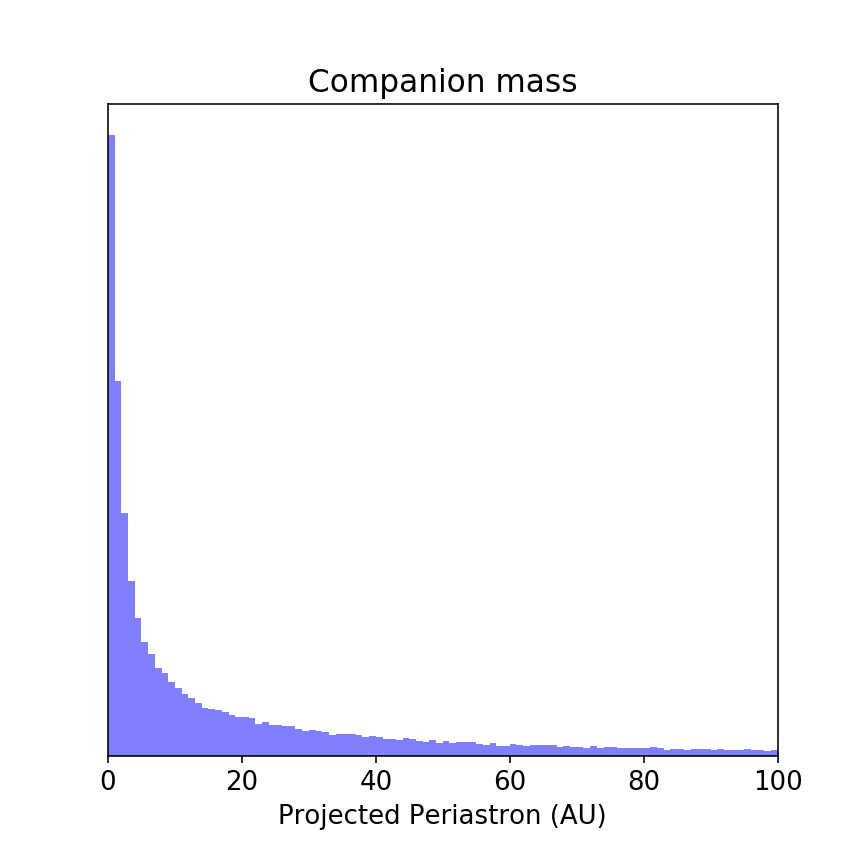

In [76]:
index = np.int_(np.linspace(0,a.shape[0]-1,a.shape[0]))
r = np.array([])
for i in index:
    # at periastron true anomaly f will be zero because it is defined as a line through foci and goes 
    # through periastron
    true_anom = 0
    cosi = np.random.uniform(-1.0,1.0)  #Draws cos(i) from a uniform distribution.  
    scattereri = np.arccos(cosi)
    X1=scatterer_periastron[i]*((cos(scattererO[i])*cos(scattererw[i]+true_anom))-(sin(scattererO[i])*\
                                                                                   sin(scattererw[i]+true_anom)*\
                                                                                   cos(scattereri)))
    Y1=scatterer_periastron[i]*((sin(scattererO[i])*cos(scattererw[i]+true_anom))+(cos(scattererO[i])*\
                                                                                   sin(scattererw[i]+true_anom)*\
                                                                                   cos(scattereri)))
    r1 = np.sqrt((X1**2)+(Y1**2))
    r = np.append(r,r1)
print r.shape
periastron_projected = r

%matplotlib notebook
plt.hist(periastron_projected,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.title('Companion mass')
plt.xlabel('Projected Periastron (AU)')
#plt.ylabel('Number')
plt.xlim(0,100)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')
plt.show()

2132.290670839838


<IPython.core.display.Javascript object>


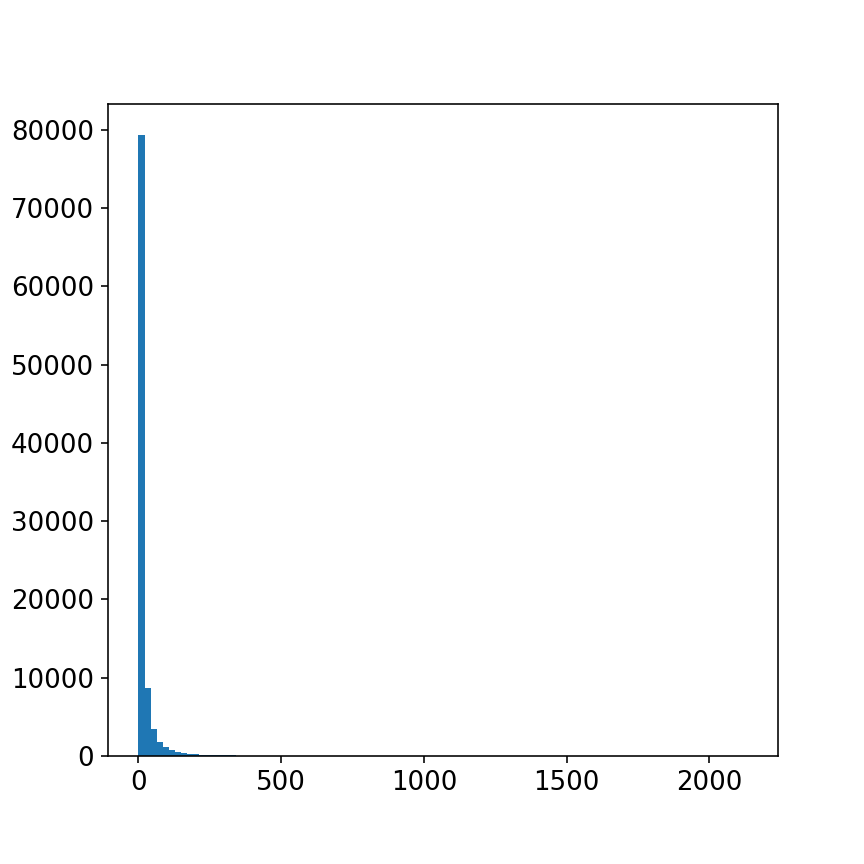

In [78]:
diff = scatterer_periastron - periastron_projected 
print np.max(diff)
%matplotlib notebook
plt.hist(diff,bins=100)
plt.show()

In [79]:
print scatterer_periastron[np.where(diff == np.max(diff))], periastron_projected[np.where(diff == np.max(diff))]

[2693.18952471] [560.89885387]


In [80]:
print np.min(scatterer_periastron)
print np.min(periastron_projected)

0.026342198240122655
0.0027276537089493177


### Scatterer's sma:

<IPython.core.display.Javascript object>


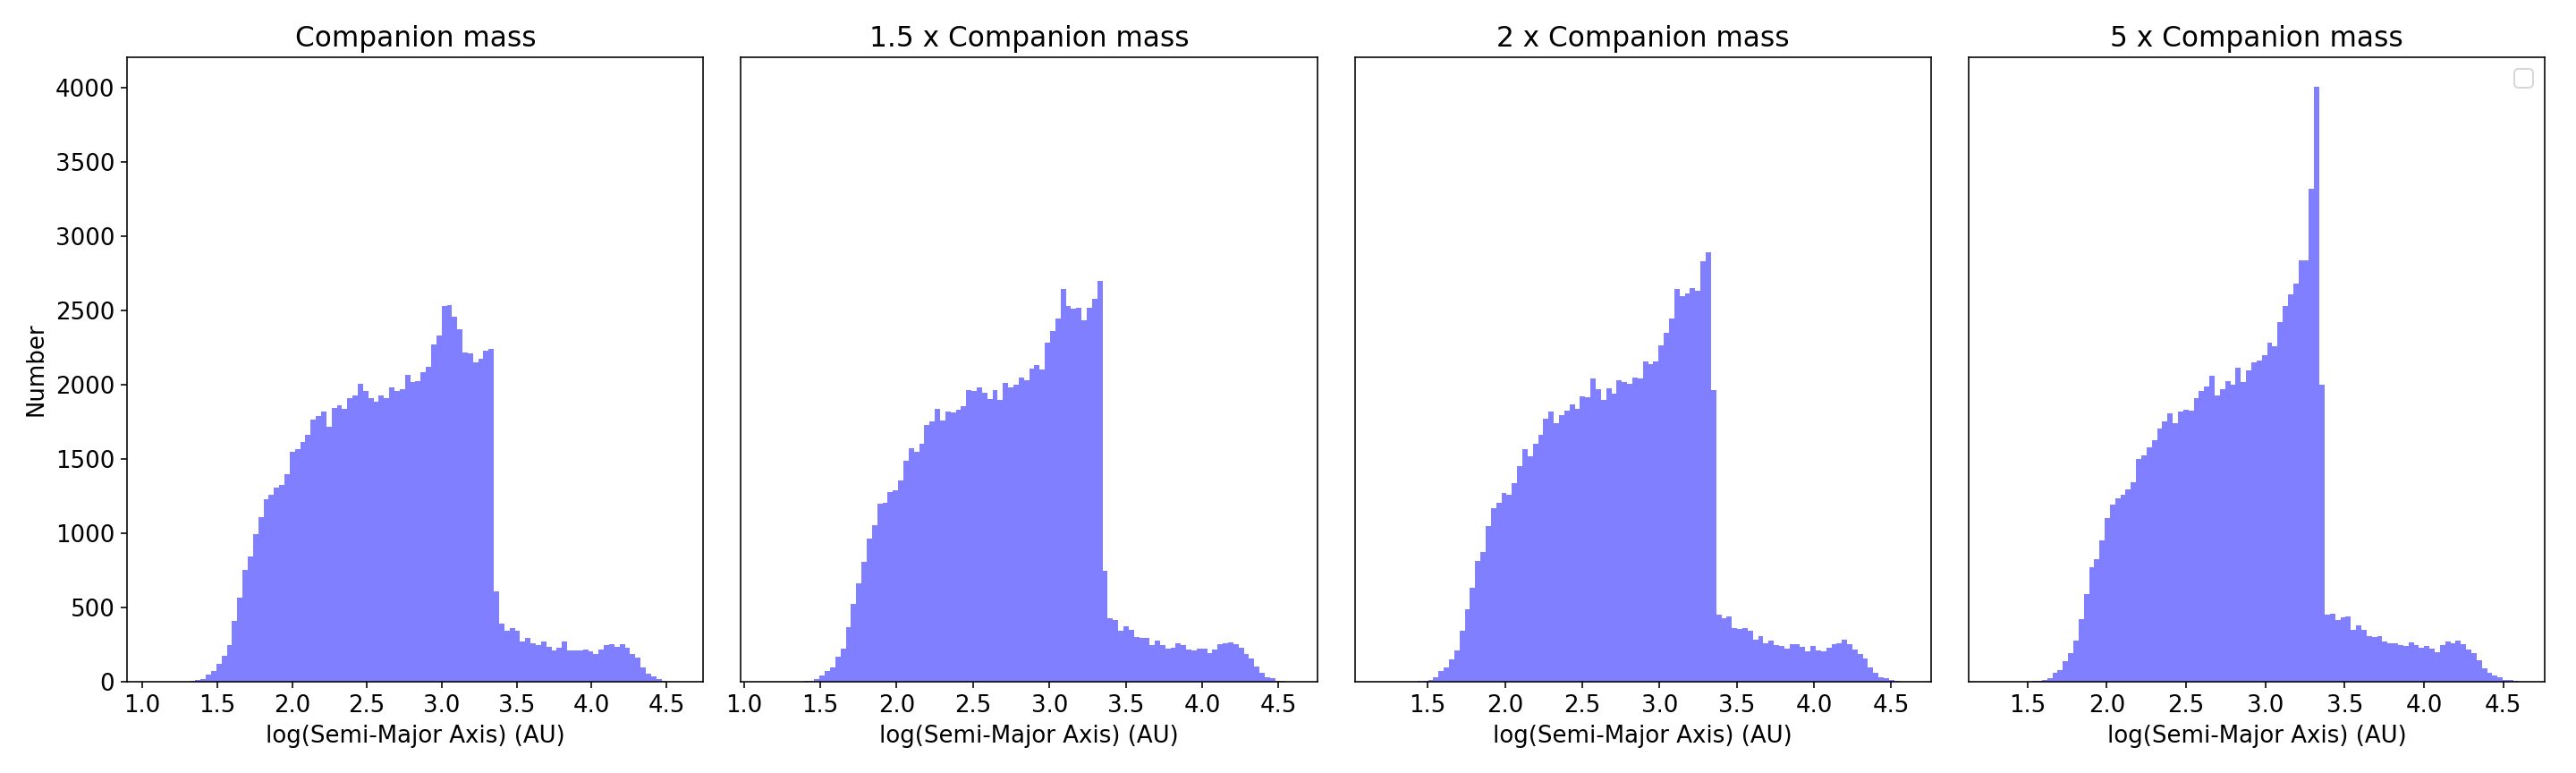

In [56]:
step = 5
#bins=np.arange(0,1000,step)
bins=100
xlim = 500
%matplotlib notebook
plt.figure(figsize=(20, 6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.025, hspace=0.025)

# 1:
ax7 = plt.subplot2grid((1,4), (0,0))
plt.hist(np.log10(scattererA_mas),bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.title('Companion mass')
plt.xlabel('log(Semi-Major Axis) (AU)')
plt.ylabel('Number')
#plt.xlim(0,xlim)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
#plt.annotate(r"${0}\% \;$ detected".format(percent1),xy=(.55, 0.9), xycoords='axes fraction',fontsize=15)


# 2:
ax8 = plt.subplot2grid((1,4), (0,1),sharey=ax7)
plt.hist(np.log10(scattererA_mas15),bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.title('1.5 x Companion mass')
plt.xlabel('log(Semi-Major Axis) (AU)')
#plt.xlim(0,xlim)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
#plt.annotate(r"${0}\% \;$ detected".format(percent2),xy=(.55, 0.9), xycoords='axes fraction',fontsize=15)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')

# 3:
ax9 = plt.subplot2grid((1,4), (0,2),sharey=ax7)
plt.hist(np.log10(scattererA_mas2),bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.title('2 x Companion mass')
plt.xlabel('log(Semi-Major Axis) (AU)')
#plt.xlim(0,xlim)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
#plt.annotate(r"${0}\% \;$ detected".format(percent3),xy=(.55, 0.9), xycoords='axes fraction',fontsize=15)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')

# 4:
ax8 = plt.subplot2grid((1,4), (0,3),sharey=ax7)
plt.hist(np.log10(scattererA_mas5),bins,color='blue',alpha=0.5,edgecolor='none')
plt.title('5 x Companion mass')
plt.xlabel('log(Semi-Major Axis) (AU)')
#plt.xlim(0,xlim)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
#plt.annotate(r"${0}\% \;$ detected".format(percent4),xy=(.6, 0.8), xycoords='axes fraction',fontsize=15)
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')
plt.legend()

plt.tight_layout()

plt.show()
plt.savefig('scatterers_sma.pdf', format='pdf')

### What if scatterer was initially on the lowest energy orbit, with apastron initially at companion's current periastron, and sma = 1/2 r:

In [79]:
# Going back to assuming that new periastron for companion is apastron for scatterer:
r = periastron # initial starting circular radius in AU
r_cm = r*1.496e13
print 'r [AU]',r[0]
print 'Scatterer initial sma [AU]:',r[0]/2
a_au=a*d
a_cm = a_au*1.496e13
print np.shape(r),np.shape(a_au)
# G, Mstar, Mplanet, Mscatterer (in cgs):
G,M,mc = 6.67e-8,(0.85*2e33),(14.5*1.898e30)
ms = mc
ms15 = 1.5*mc
ms2 = 2*mc
ms5 = 5*mc
ms10 = 10*mc

# Initial energy of companion
Eci = -G*M*mc/(2*r_cm)
print 'Eci',Eci[0]
# Final energy of companion:
Ecf = -G*M*mc/(2*a_cm)
print 'Ecf',Ecf[0]
# Change in energy:
deltaE = Ecf - Eci
print 'DeltaE',deltaE[0]

# Scatter initial energy:
# Only change from the above calc: remove the 2 from Esi eqn
Esi = -G*M*ms/(r_cm)
Esi15 = -G*M*ms15/(r_cm)
Esi2 = -G*M*ms2/(r_cm)
Esi5 = -G*M*ms5/(r_cm)
Esi10 = -G*M*ms10/(r_cm)
print 'Esi',Esi[0]
# Scatterer final energy is initial minus the energy it gave to companion:
Esf = Esi - deltaE
Esf15 = Esi15 - deltaE
Esf2 = Esi2 - deltaE
Esf5 = Esi5 - deltaE
Esf10 = Esi10 - deltaE
print 'Esf',Esf[0]

# Use this number to determine resulting semi-major axis of resulting orbit:
scattererA = -G*M*ms/(2*Esf) # in cm
scattererA15 = -G*M*ms15/(2*Esf15) # in cm
scattererA2 = -G*M*ms2/(2*Esf2) # in cm
scattererA5 = -G*M*ms5/(2*Esf5) # in cm
scattererA10 = -G*M*ms10/(2*Esf10) # in cm

scattererA_au = scattererA/1.496e13 #convert to AU
scattererA_au15 = scattererA15/1.496e13 #convert to AU
scattererA_au2 = scattererA2/1.496e13 #convert to AU
scattererA_au5 = scattererA5/1.496e13 #convert to AU
scattererA_au10 = scattererA10/1.496e13 #convert to AU
print 'ScattererA [AU]',scattererA_au[0]

scattererA_mas = (scattererA_au/d)*1000 #convert to mas
scattererA_mas15 = (scattererA_au15/d)*1000 #convert to mas
scattererA_mas2 = (scattererA_au2/d)*1000 #convert to mas
scattererA_mas5 = (scattererA_au5/d)*1000 #convert to mas
scattererA_mas10 = (scattererA_au10/d)*1000 #convert to mas
print 'ScattererA [mas]',scattererA_mas[0]

scatterer_apastron = r_cm
scatterere = (scatterer_apastron/scattererA)-1.
scatterere15 = (scatterer_apastron/scattererA15)-1.
scatterere2 = (scatterer_apastron/scattererA2)-1.
scatterere5 = (scatterer_apastron/scattererA5)-1.
scatterere10 = (scatterer_apastron/scattererA10)-1.
print e[0]
print 'Scatterere',scatterere[0],scatterere15[0],scatterere2[0],scatterere5[0],scatterere10[0]

# Assuming w and O are offset by pi:
scattererw,scattererO = (w+np.pi)%(2*np.pi),(O+np.pi)%(2*np.pi)

# Actual ap/periastron for new scatterer's orbit (in AU, not projected onto sky plane):
scatterer_apastron = scattererA_au*(1+scatterere)
scatterer_periastron = scattererA_au*(1-scatterere)
scatterer_apastron2 = scattererA_au2*(1+scatterere2)
scatterer_periastron2 = scattererA_au2*(1-scatterere2)
scatterer_apastron5 = scattererA_au5*(1+scatterere5)
scatterer_periastron5 = scattererA_au5*(1-scatterere5)
scatterer_apastron10 = scattererA_au10*(1+scatterere10)
scatterer_periastron10 = scattererA_au10*(1-scatterere10)

print scatterer_apastron[0],scatterer_periastron[0]

r [AU] 166.88964935234765
Scatterer initial sma [AU]: 83.44482467617382
(97851,) (97851,)
Eci -6.249538879854178e+41
Ecf -3.6260997843845134e+41
DeltaE 2.6234390954696647e+41
Esi -1.2499077759708356e+42
Esf -1.512251685517802e+42
ScattererA [AU] 68.96889996955797
ScattererA [mas] 633.8670665354641
0.419781226408
Scatterere 1.4197812264079999 1.2798541509386667 1.2098906132039997 1.0839562452816 1.0419781226408
166.88964935234765 -28.95184941323171


These initial orbits are not physical - they would not have ben capable of producing the system we observe.
<br><br>
Alternate formulation of the problem: The minimum possible initial orbit for the scatterer is the one that results in a final orbit with ecc = 1 and sma = 1/2 r.  Any initial orbit lower than that would not have produced our system.  Of course, if ecc = 1 for real the scatterer would fall into the sun and not be detectable.  But that is the limiting case.  So we can test detectability of these resulting orbits with ecc = 1, and sma derived from apastron being the companion's current periastron.

### ms==mc

In [93]:
scatterer_apastron = r_cm
scatterere = np.array([1.]*r.shape[0])
scattererA = 0.5*r_cm # in cm
scattererA_au = scattererA/1.496e13 #convert to AU
print 'ScattererA [AU]',scattererA_au[0]
scattererA_mas = (scattererA_au/d)*1000 #convert to mas
print 'ScattererA [mas]',scattererA_mas[0]
print scatterere
# Assuming w and O are offset by pi:
scattererw,scattererO = (w+np.pi)%(2*np.pi),(O+np.pi)%(2*np.pi)

ScattererA [AU] 83.44482467617382
ScattererA [mas] 766.9098138204132
[1. 1. 1. ... 1. 1. 1.]


[ 719.15073523  485.13344719  486.88978505 ... 2728.35600338  155.05816589
  589.9309628 ]


/Users/loganpearce/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater_equal


<IPython.core.display.Javascript object>


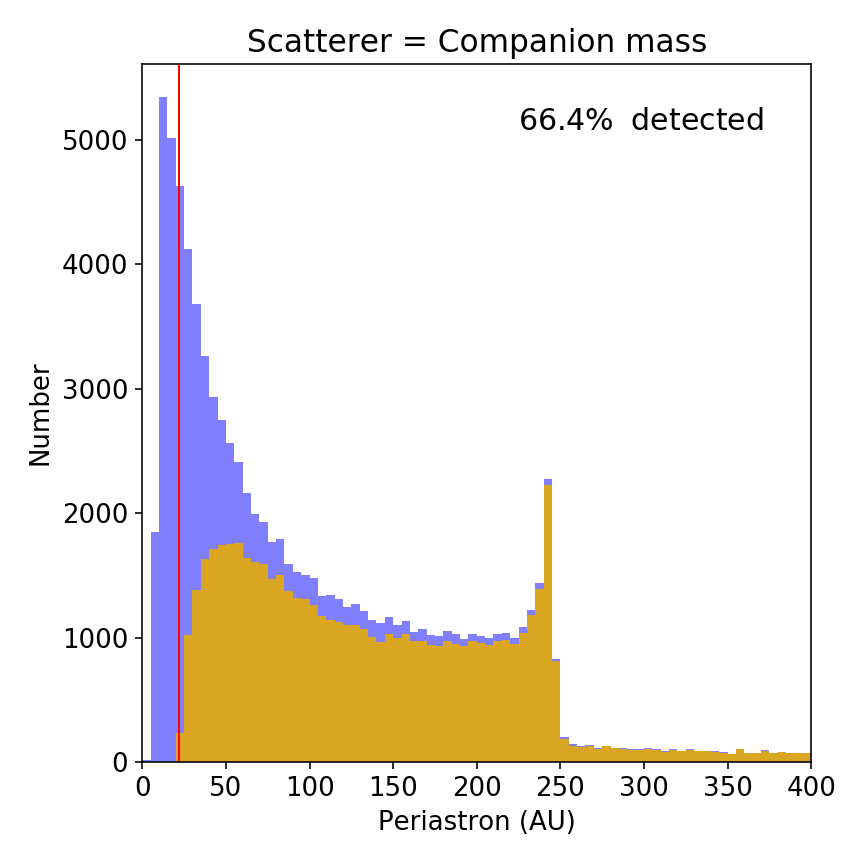

In [94]:
detectlim1 = 200.
index = np.int_(np.linspace(0,a.shape[0]-1,a.shape[0]))
r = np.array([])
for i in index:
    # Generate a random orbital phase:
    phase = np.random.uniform(0,1)
    # Generate a random inclination for the scatterer to end up on:
    cosi = np.random.uniform(-1.0,1.0)  #Draws sin(i) from a uniform distribution.  
    scattereri = np.arccos(cosi) 
    # Compute separation of scatterer at that phase:
    M = 2.*np.pi*phase
    E = solve(eccentricity_anomaly, M, scatterere[i], 0.0001)
    A = scattererA_mas[i]*((cos(scattererO[i])*cos(scattererw[i]))-(sin(scattererO[i])*sin(scattererw[i])*\
                                                                    cos(scattereri)))
    B = scattererA_mas[i]*((sin(scattererO[i])*cos(scattererw[i]))+(cos(scattererO[i])*sin(scattererw[i])*\
                                                                    cos(scattereri)))
    F = scattererA_mas[i]*((-cos(scattererO[i])*sin(scattererw[i]))-(sin(scattererO[i])*cos(scattererw[i])*\
                                                                     cos(scattereri)))
    G = scattererA_mas[i]*((-sin(scattererO[i])*sin(scattererw[i]))+(cos(scattererO[i])*cos(scattererw[i])*\
                                                                     cos(scattereri)))
    xe = cos(E)-scatterere[i]
    ye = sqrt(1-scatterere[i]**2)*sin(E)
    X = A*xe + F*ye
    Y = B*xe + G*ye
    r1 = np.sqrt(X**2+Y**2)
    r=np.append(r,r1)

print r
found = np.where(r>=detectlim1)
peri_found1 = periastron[found[0]]
step = 5
percent1 = np.round((np.float(peri_found1.shape[0])/np.float(r.shape[0]))*100.,decimals=1)
bins=np.arange(0,1000,step)
%matplotlib notebook
fig1 = plt.figure
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.rcParams['font.size'] = 13
plt.hist(periastron,bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(peri_found1,bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=(detectlim1/1000)*d, linewidth=1,color='red')
plt.title('Scatterer = Companion mass')
plt.xlabel('Periastron (AU)')
plt.ylabel('Number')
plt.xlim(0,400)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(650, 5700), xytext=(650, 5700))
plt.annotate(r"${0}\% \;$ detected".format(percent1),xy=(.60, 0.85), xycoords='figure fraction',fontsize=15)
#plt.legend()
plt.tight_layout()
plt.show()
#plt.savefig("detected_scatterers_equalmass.pdf", format='pdf')

### All of them:

/Users/loganpearce/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
/Users/loganpearce/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater_equal
  
/Users/loganpearce/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater_equal
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


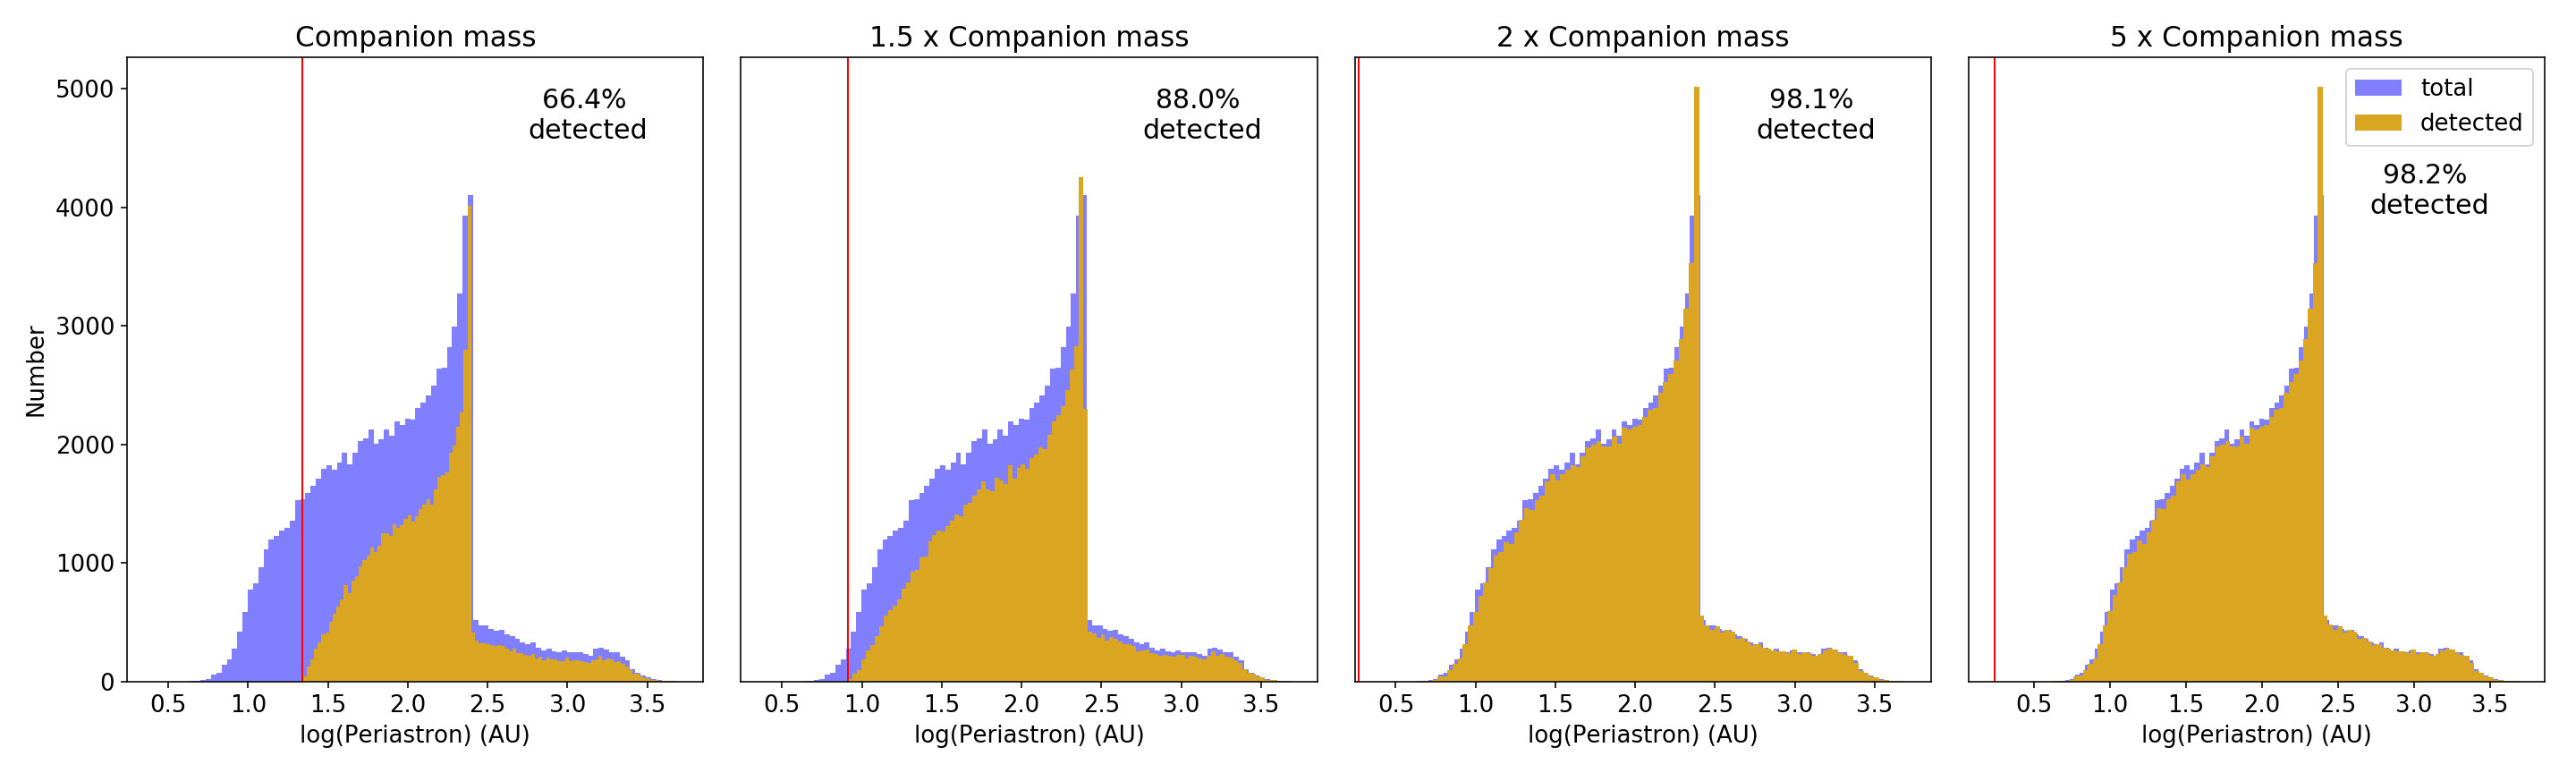

In [121]:
detectlim2 = 75.
detectlim3 = 17.
detectlim4 = 16.
found2 = np.where(r>=detectlim2)
peri_found2 = periastron[found2[0]]
percent2 = np.round((np.float(peri_found2.shape[0])/np.float(r.shape[0]))*100.,decimals=1)

found3 = np.where(r>=detectlim3)
peri_found3 = periastron[found3[0]]
percent3 = np.round((np.float(peri_found3.shape[0])/np.float(r.shape[0]))*100.,decimals=1)

found4 = np.where(r>=detectlim4)
peri_found4 = periastron[found4[0]]
percent4 = np.round((np.float(peri_found4.shape[0])/np.float(r.shape[0]))*100.,decimals=1)

step = 5
bins=np.arange(0,1000,step)
%matplotlib notebook
plt.figure(figsize=(20, 6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.025, hspace=0.025)
bins=100

# 1:
ax7 = plt.subplot2grid((1,4), (0,0))
plt.hist(np.log10(periastron),bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(np.log10(peri_found1),bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=np.log10((detectlim1/1000)*d), linewidth=1,color='red')
plt.title('Companion mass')
plt.xlabel('log(Periastron) (AU)')
plt.ylabel('Number')
#plt.xlim(0,300)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate("${0}\% \; $ \ndetected".format(percent1),xy=(.8, 0.87), xycoords='axes fraction',fontsize=15,\
            horizontalalignment='center')


# 2:
ax8 = plt.subplot2grid((1,4), (0,1),sharey=ax7)
plt.hist(np.log10(periastron),bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(np.log10(peri_found2),bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=np.log10((detectlim2/1000)*d), linewidth=1,color='red')
plt.title('1.5 x Companion mass')
plt.xlabel('log(Periastron) (AU)')
#plt.xlim(0,300)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate("${0}\% \; $ \ndetected".format(percent2),xy=(.8, 0.87), xycoords='axes fraction',fontsize=15,\
            horizontalalignment='center')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')

# 3:
ax9 = plt.subplot2grid((1,4), (0,2),sharey=ax7)
plt.hist(np.log10(periastron),bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(np.log10(peri_found3),bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=np.log10((detectlim3/1000)*d), linewidth=1,color='red')
plt.title('2 x Companion mass')
plt.xlabel('log(Periastron) (AU)')
#plt.xlim(0,300)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate("${0}\% \; $ \ndetected".format(percent3),xy=(.8, 0.87), xycoords='axes fraction',fontsize=15,\
            horizontalalignment='center')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')

# 4:
ax8 = plt.subplot2grid((1,4), (0,3),sharey=ax7)
plt.hist(np.log10(periastron),bins,color='blue',alpha=0.5,edgecolor='none',label='total')
plt.hist(np.log10(peri_found4),bins,color='goldenrod',edgecolor='none',label='detected')
plt.axvline(x=np.log10((detectlim4/1000)*d), linewidth=1,color='red')
plt.title('5 x Companion mass')
plt.xlabel('log(Periastron) (AU)')
#plt.xlim(0,300)
#plt.ylim(0,7200)
#plt.annotate(r"$Bin \; Size: \; {0} \; AU$".format(step), xy=(.67, 0.76), xycoords='figure fraction',fontsize=15)
plt.annotate("${0}\% \; $ \ndetected".format(percent4),xy=(.8, 0.75), xycoords='axes fraction',fontsize=15,\
            horizontalalignment='center')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='on', \
                labelleft='off', labeltop='off', labelright='off', labelbottom='on')
plt.legend()

plt.tight_layout()

plt.show()
plt.savefig('detected_scatterers_all_minenergy.pdf', format='pdf')


In [143]:
print np.log10((detectlim4/1000)*d)
print np.log10((detectlim3/1000)*d)

0.24077509388023158
0.26710403260258075
